# This code reproduces several figure panels in Figures 2, 3, 4, and 5, and corresponding supplemental figures.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import glob as glob
import scipy.stats as sp

import matplotlib
from matplotlib import rc
font = {'size'   : 16}
matplotlib.rc('font', **font)
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

# change font
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_style("whitegrid")

# MCC / AUC of binary classification

In [2]:
def calculate_stats(df):
    for col in df.columns:
        if col == 'scr':
            continue
        vals = df[col]
        orig = list(vals[df['scr'] == 'Original'])
        scr = list(vals[df['scr'] == 'Scrambled'])
        print(col)
        print(sp.ttest_ind(orig, scr))

def calc_mcc(folder, seq, val_name):
    folds = ['outputs/autokeras/binary_classification/', 'outputs/deepswarm/binary_classification/', 'outputs/tpot/binary_classification/']
    mcc = pd.DataFrame()
    file_name = 'all_results.txt'
    for fold in folds:
        name = fold.split('outputs/')[1].split('/binary_classification')[0]
        name = name.replace('deepswarm', 'DeepSwarm')
        name = name.replace('autokeras', 'AutoKeras')
        name = name.replace('tpot', 'TPOT')

        df = pd.read_csv(folder + seq + fold + file_name, sep = '\t', header = None)
        vals = df.values
        for i in range(len(vals)):
            val = vals[i]
            if val_name in val[0]:
                new = val[0].split(": ")[1]
                new = new.strip("[")
                new = new.strip("]")

                new = [s for s in new.split(' ')]
                new = [s for s in new if s != '']
                new = [0 if s == '0.' else s for s in new]
                new = [float(s) for s in new]
                mcc[name] = new
    mcc['scr'] = ['Original'] * len(mcc)
    
    file_name = 'all_scrambled_control_results.txt'
    scr_mcc = pd.DataFrame()
    for fold in folds:
        name = fold.split('outputs/')[1].split('/binary_classification')[0]
        name = name.replace('deepswarm', 'DeepSwarm')
        name = name.replace('autokeras', 'AutoKeras')
        name = name.replace('tpot', 'TPOT')
        df = pd.read_csv(folder + seq + fold + 'scrambled/' + file_name, sep = '\t', header = None)
        vals = df.values
        for i in range(len(vals)):
            val = vals[i]
            if val_name in val[0]:
                new = val[0].split(": ")[1]
                new = new.strip("[")
                new = new.strip("]")

                new = [s for s in new.split(' ')]
                new = [s for s in new if s != '']
                new = [0 if s == '0.' else s for s in new]
                new = [float(s) for s in new]
                scr_mcc[name] = new
    scr_mcc['scr'] = ['Scrambled'] * len(scr_mcc)
    mcc = pd.concat([mcc, scr_mcc])
    
    print('Running statistics now...')
    calculate_stats(mcc)

    return(mcc)

In [3]:
def reshape(df):
    new = pd.DataFrame()
    new['model_type'] = []
    index = 0
    for name, col in df.iteritems():
        if 'scr' in name:
            continue
        new_pd = pd.DataFrame(col)
        new_pd.columns = ['values']
        new_pd['scr'] = list(df['scr'])
        new_pd['model_type'] = [name] * len(new_pd)
        new = pd.concat([new, new_pd])
        index = index + 1
    return(new)

def plot_barplot(mcc, savepath, yaxis):
    mcc = reshape(mcc)  

    plt.figure(figsize=(3,4), dpi=300)
    my_pal = {"Original": "cornflowerblue", "Scrambled": "lightgrey"}
    ax = sns.barplot(x = 'model_type', y = 'values', hue = 'scr', data=mcc, edgecolor='black', alpha = 1, linewidth = 1, palette = my_pal, ci = 'sd', errcolor = 'black', errwidth = 1.5, capsize = 0.2, saturation = 0.6)
    sns.swarmplot(x = 'model_type', y = 'values', hue = 'scr', data=mcc, dodge = True, edgecolor='black', alpha = 1, linewidth = 1, s = 4, palette = my_pal)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[2:4], labels[2:4], title='Data')
    # Define some hatches
    #hatches = ['//', '']

    # Loop over the bars
    #for i,thisbar in enumerate(ax.patches):
    #    # Set a different hatch for each bar
    #    thisbar.set_hatch(hatches[i % len(hatches)])
    plt.xlabel('')
    plt.xticks(rotation = 80)
    plt.ylabel(yaxis)
    plt.ylim([0, 1.1])
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tight_layout()
    plt.savefig(savepath)
    plt.show()

Running statistics now...
AutoKeras
Ttest_indResult(statistic=64.46742811736766, pvalue=3.468115450906961e-07)
DeepSwarm
Ttest_indResult(statistic=15.508016170104671, pvalue=0.00010092121143505399)
TPOT
Ttest_indResult(statistic=17.346231552806753, pvalue=6.482896274855516e-05)


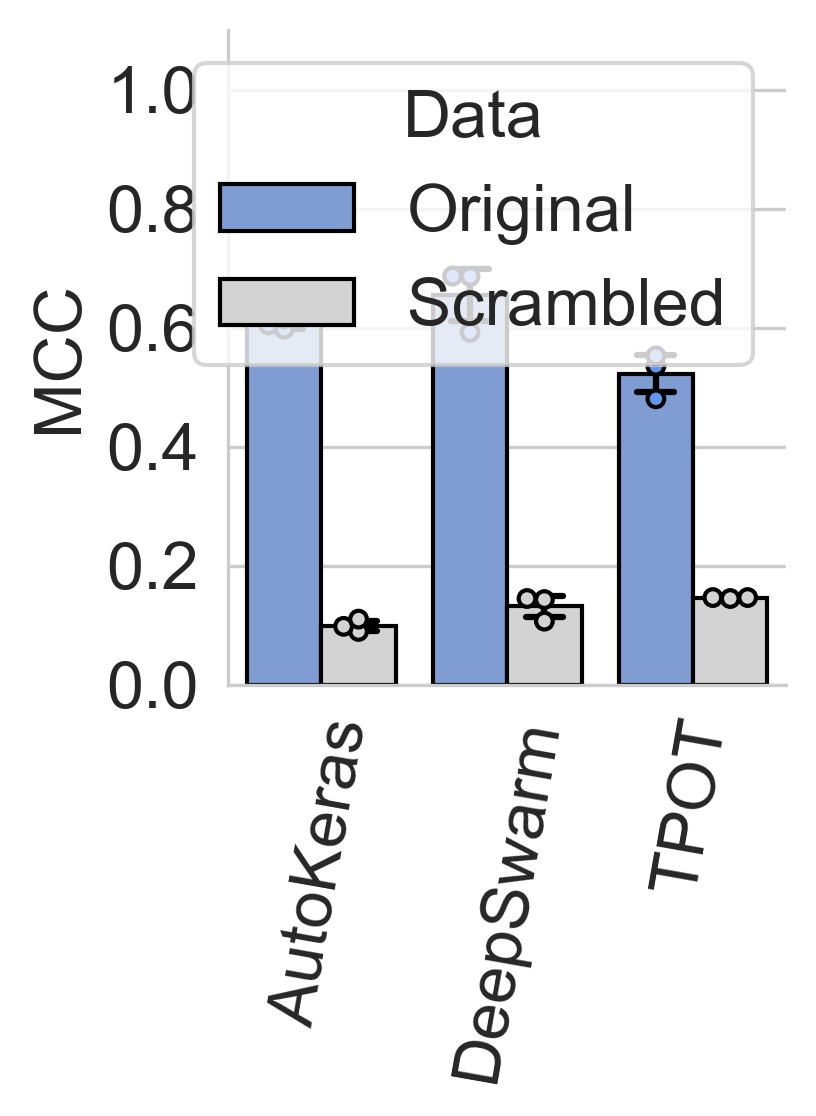

Running statistics now...
AutoKeras
Ttest_indResult(statistic=76.53318840630301, pvalue=1.7468591233464668e-07)
DeepSwarm
Ttest_indResult(statistic=21.2761529863216, pvalue=2.8854249444444103e-05)
TPOT
Ttest_indResult(statistic=6.668525161134676, pvalue=0.0026276988912021797)


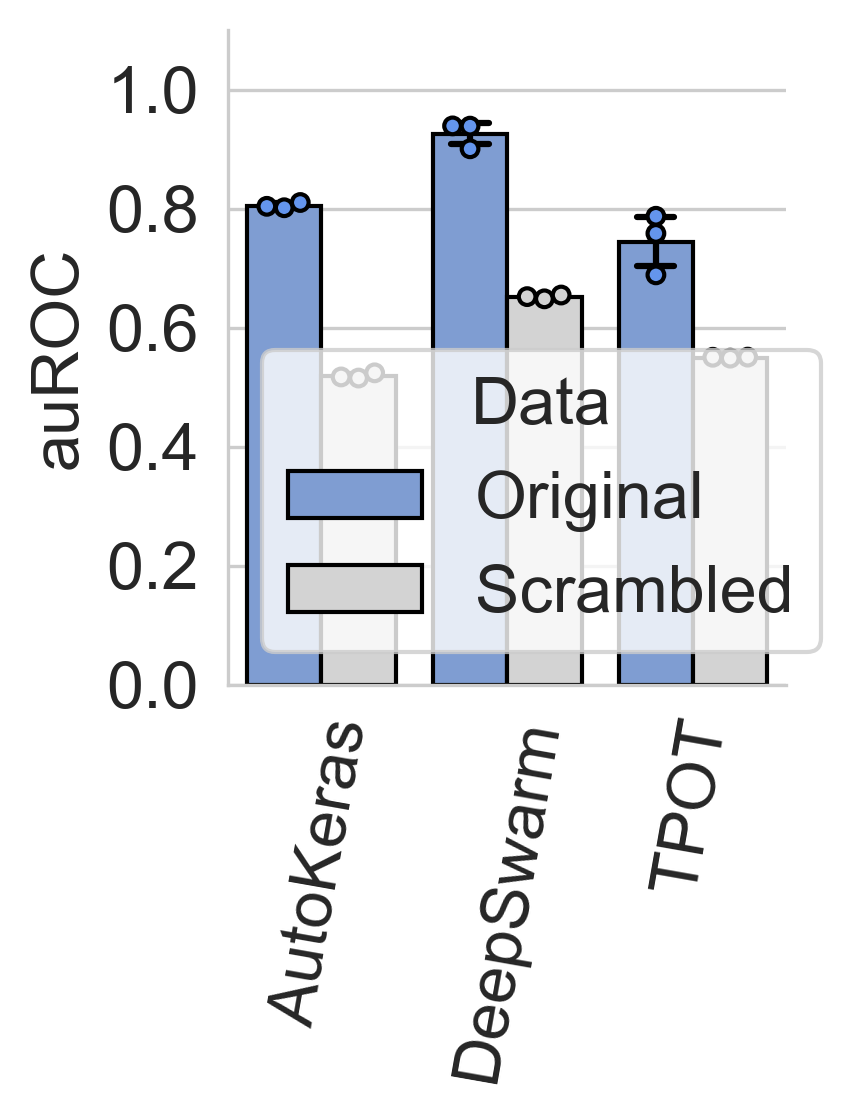

In [4]:
# load in toeholds
data_path = '../exemplars/'
seq_type = 'toeholds/'
df = calc_mcc(data_path, seq_type, 'all values of MCC Class 0')
plot_barplot(df, '../clean_figs/toeholds_mcc.svg', 'MCC') 

df = calc_mcc(data_path, seq_type, 'all values of auROC Macro ')
plot_barplot(df, '../clean_figs/toeholds_auc.svg', 'auROC') 

Running statistics now...
AutoKeras
Ttest_indResult(statistic=0.34400925033266117, pvalue=0.748162601203509)
DeepSwarm
Ttest_indResult(statistic=-0.5936964486244561, pvalue=0.584660773975987)
TPOT
Ttest_indResult(statistic=nan, pvalue=nan)


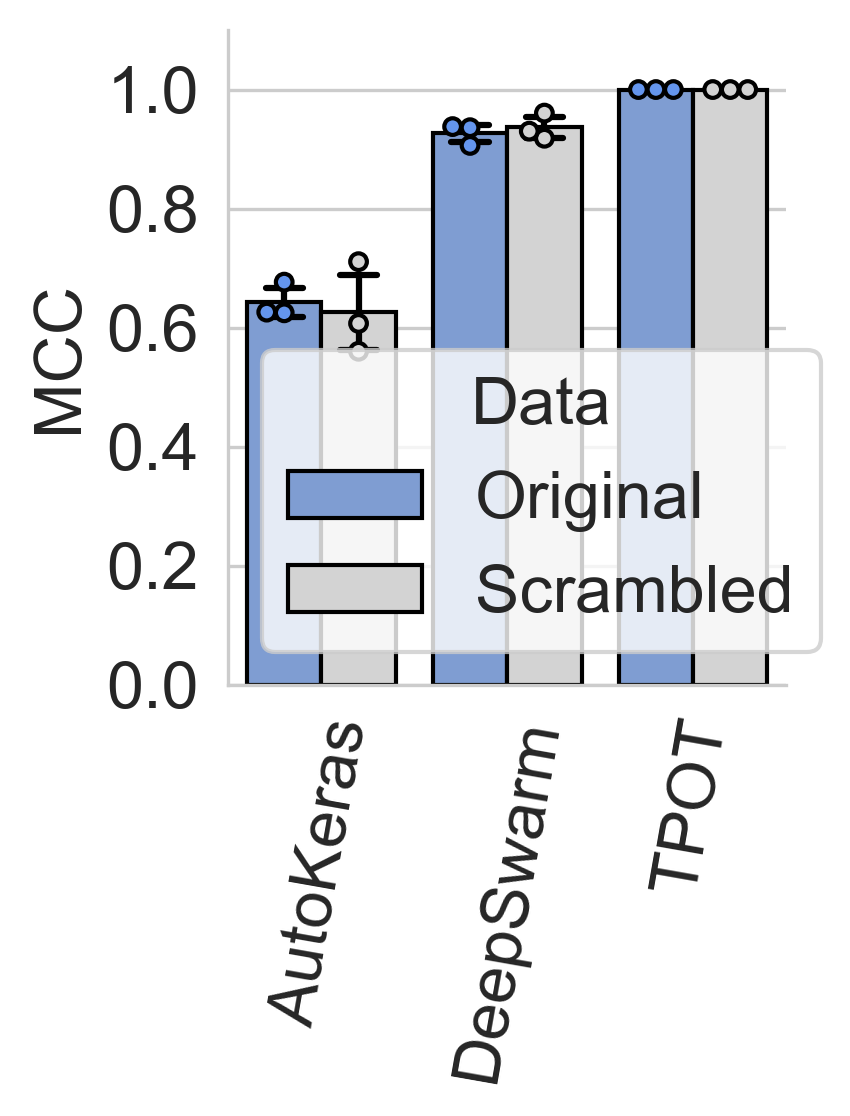

Running statistics now...
AutoKeras
Ttest_indResult(statistic=0.6582066379287257, pvalue=0.5463609145754098)
DeepSwarm
Ttest_indResult(statistic=-2.38816932301657, pvalue=0.07531740731474634)
TPOT
Ttest_indResult(statistic=nan, pvalue=nan)


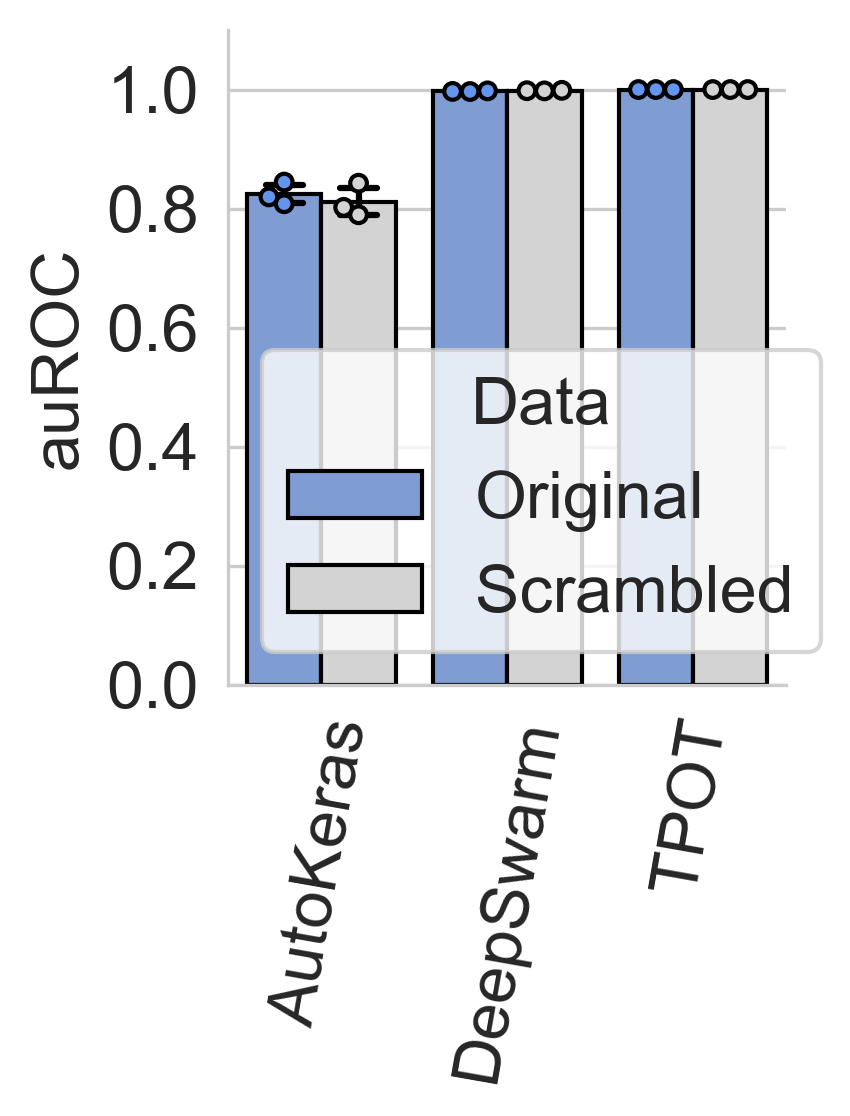

In [5]:
# load in synthetic nas
seq_type = 'small_synthetic_nucleic_acids/'
df = calc_mcc(data_path, seq_type, 'all values of MCC Class 0')
plot_barplot(df, '../clean_figs/small_synthetic_mcc.svg', 'MCC') 

df = calc_mcc(data_path, seq_type, 'all values of auROC Macro ')
plot_barplot(df, '../clean_figs/small_synthetic_auc.svg', 'auROC') 

Running statistics now...
AutoKeras
Ttest_indResult(statistic=nan, pvalue=nan)
DeepSwarm
Ttest_indResult(statistic=nan, pvalue=nan)
TPOT
Ttest_indResult(statistic=nan, pvalue=nan)


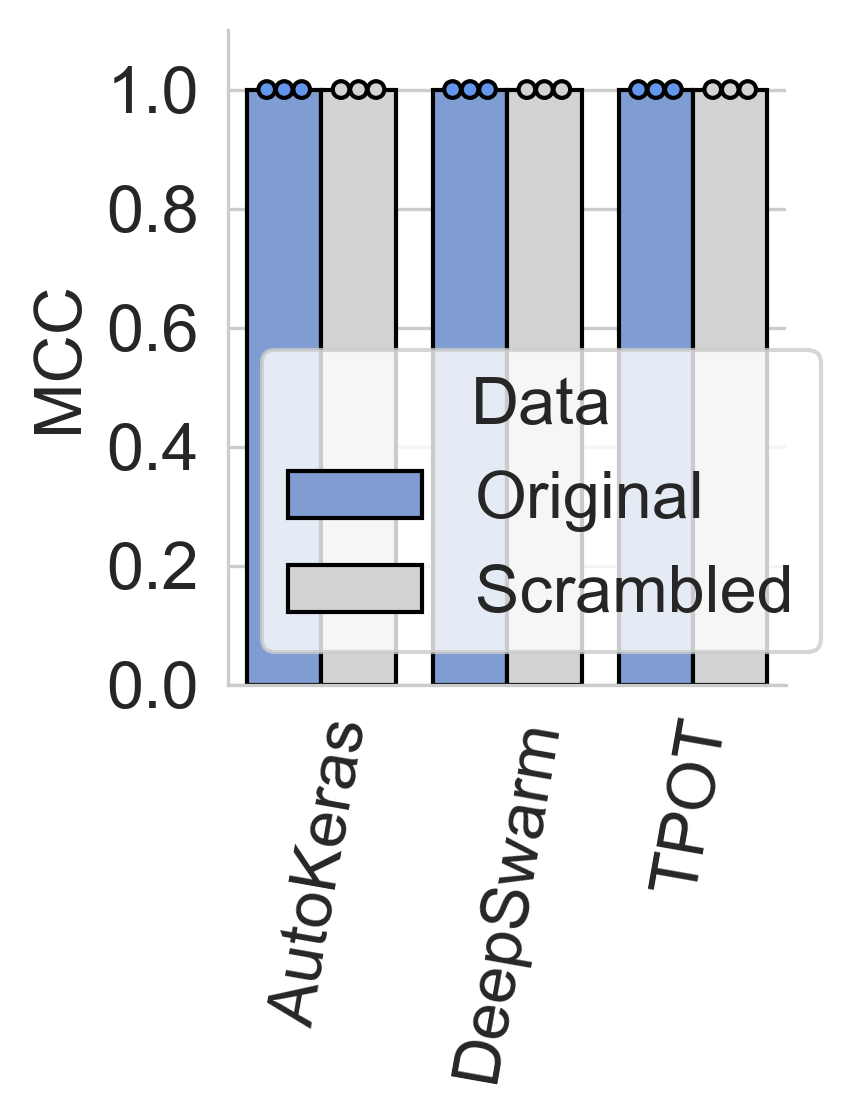

Running statistics now...
AutoKeras
Ttest_indResult(statistic=nan, pvalue=nan)
DeepSwarm
Ttest_indResult(statistic=nan, pvalue=nan)
TPOT
Ttest_indResult(statistic=nan, pvalue=nan)


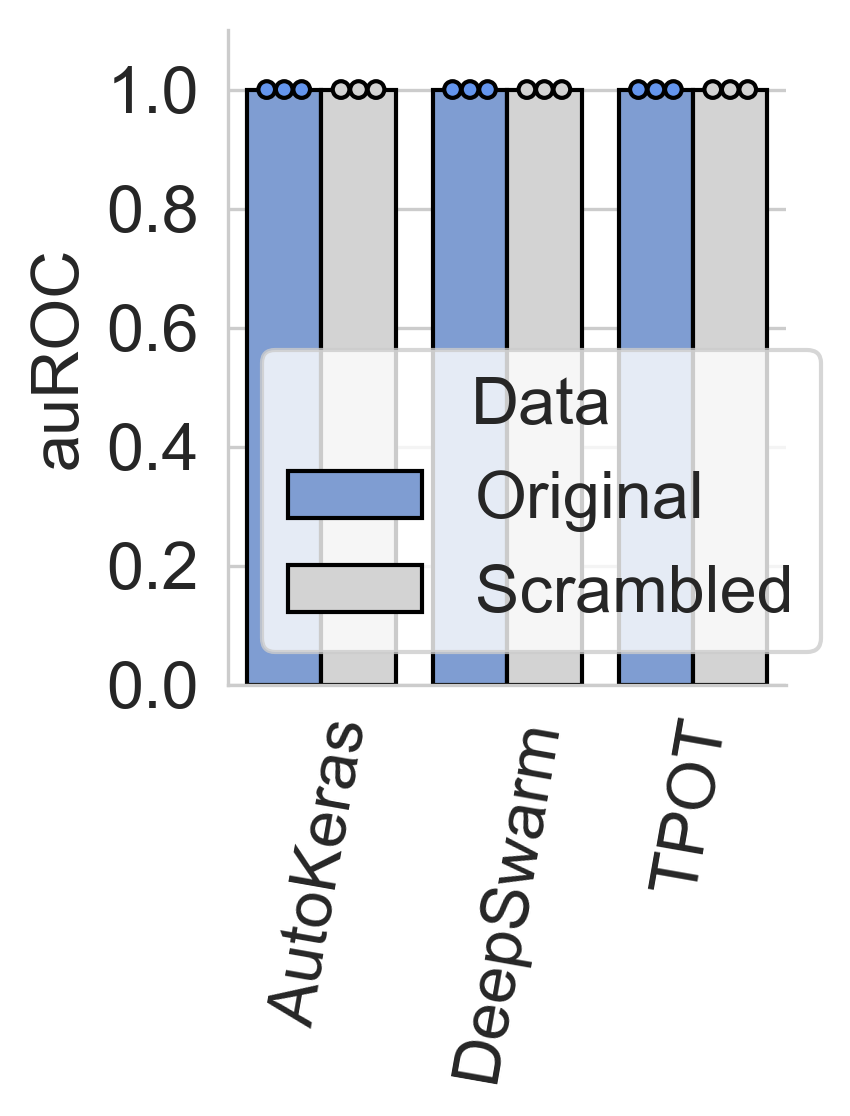

In [6]:
# load in synthetic nas
seq_type = 'large_synthetic_nucleic_acids/'
df = calc_mcc(data_path, seq_type, 'all values of MCC Class 0')
plot_barplot(df, '../clean_figs/large_synthetic_mcc.svg', 'MCC') 

df = calc_mcc(data_path, seq_type, 'all values of auROC Macro ')
plot_barplot(df, '../clean_figs/large_synthetic_auc.svg', 'auROC') 

Running statistics now...
AutoKeras
Ttest_indResult(statistic=120.05261961432419, pvalue=2.8871132966530575e-08)
DeepSwarm
Ttest_indResult(statistic=29.736954328179632, pvalue=7.615496474416509e-06)
TPOT
Ttest_indResult(statistic=219.53404959579893, pvalue=2.582757456024309e-09)


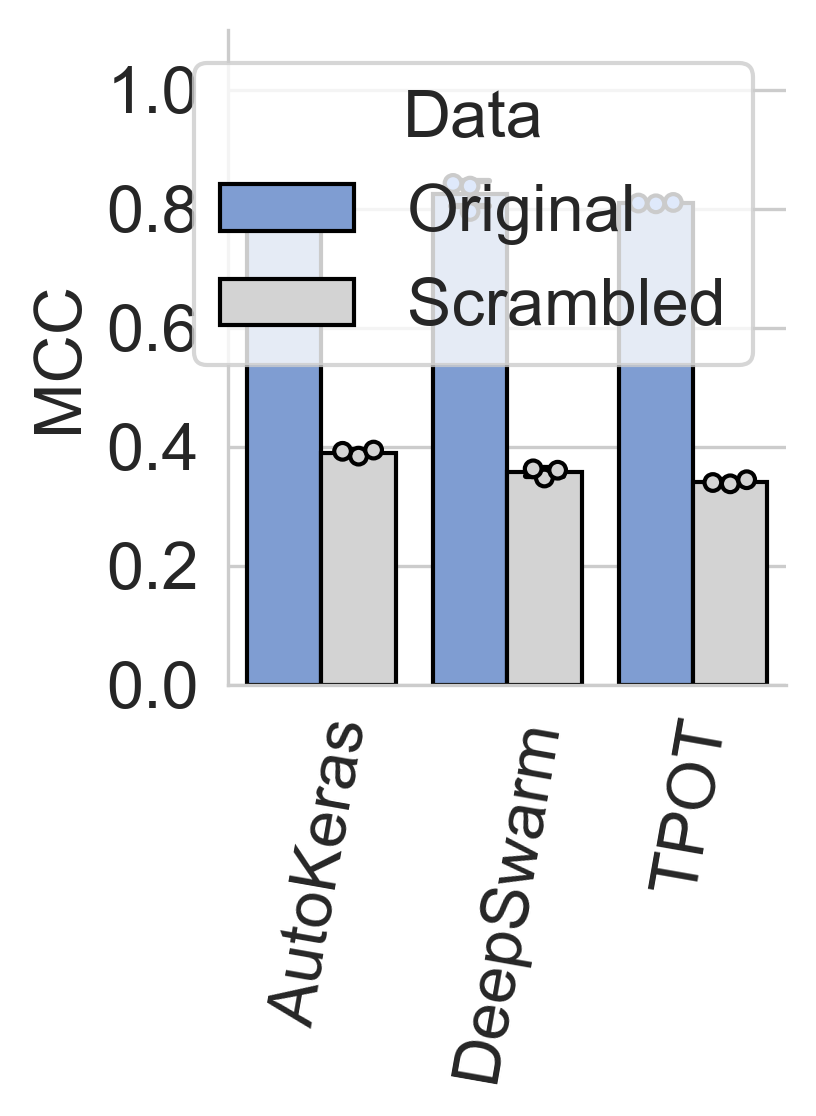

Running statistics now...
AutoKeras
Ttest_indResult(statistic=86.32721511623924, pvalue=1.0793739204748873e-07)
DeepSwarm
Ttest_indResult(statistic=34.44548431844793, pvalue=4.2382423284647845e-06)
TPOT
Ttest_indResult(statistic=227.41507197421097, pvalue=2.2429432876017586e-09)


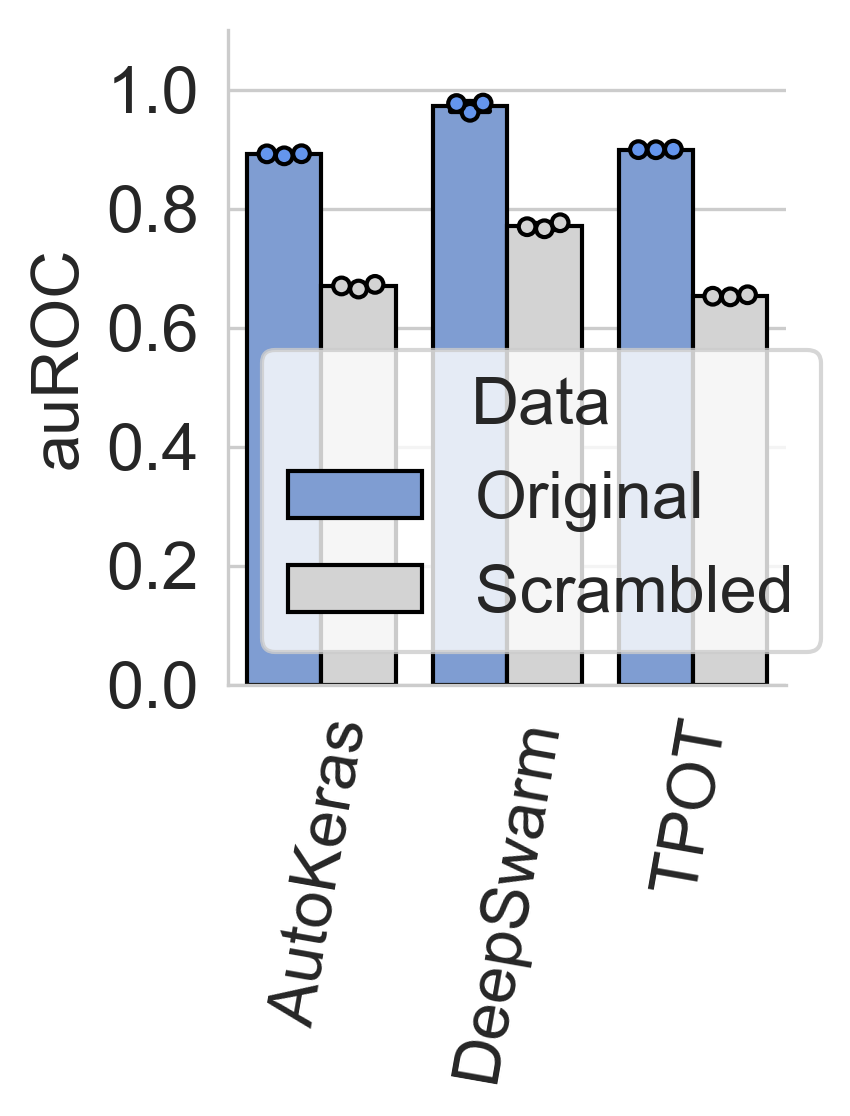

In [7]:
# load in rbs
seq_type = 'rbs/'
df = calc_mcc(data_path, seq_type, 'all values of MCC Class 0')
plot_barplot(df, '../clean_figs/rbs_mcc.svg', 'MCC') 

df = calc_mcc(data_path, seq_type, 'all values of auROC Macro ')
plot_barplot(df, '../clean_figs/rbs_auc.svg', 'auROC') 

Running statistics now...
AutoKeras
Ttest_indResult(statistic=26.027549917672737, pvalue=1.2946614689964205e-05)
DeepSwarm
Ttest_indResult(statistic=25.43926779297766, pvalue=1.4179866565218984e-05)
TPOT
Ttest_indResult(statistic=77.58468814521227, pvalue=1.6541174100550313e-07)


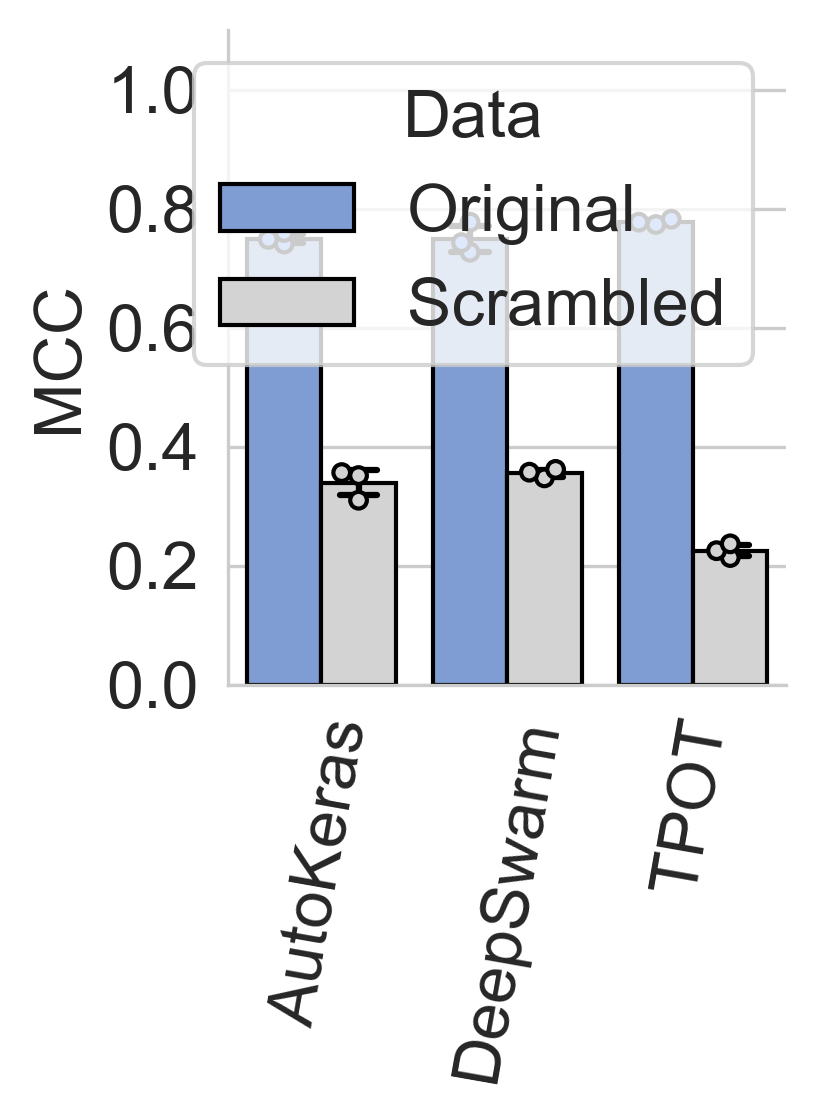

Running statistics now...
AutoKeras
Ttest_indResult(statistic=26.798536464796776, pvalue=1.1526199295604653e-05)
DeepSwarm
Ttest_indResult(statistic=16.532215506790564, pvalue=7.839842010264868e-05)
TPOT
Ttest_indResult(statistic=105.92633006884172, pvalue=4.7629667721512895e-08)


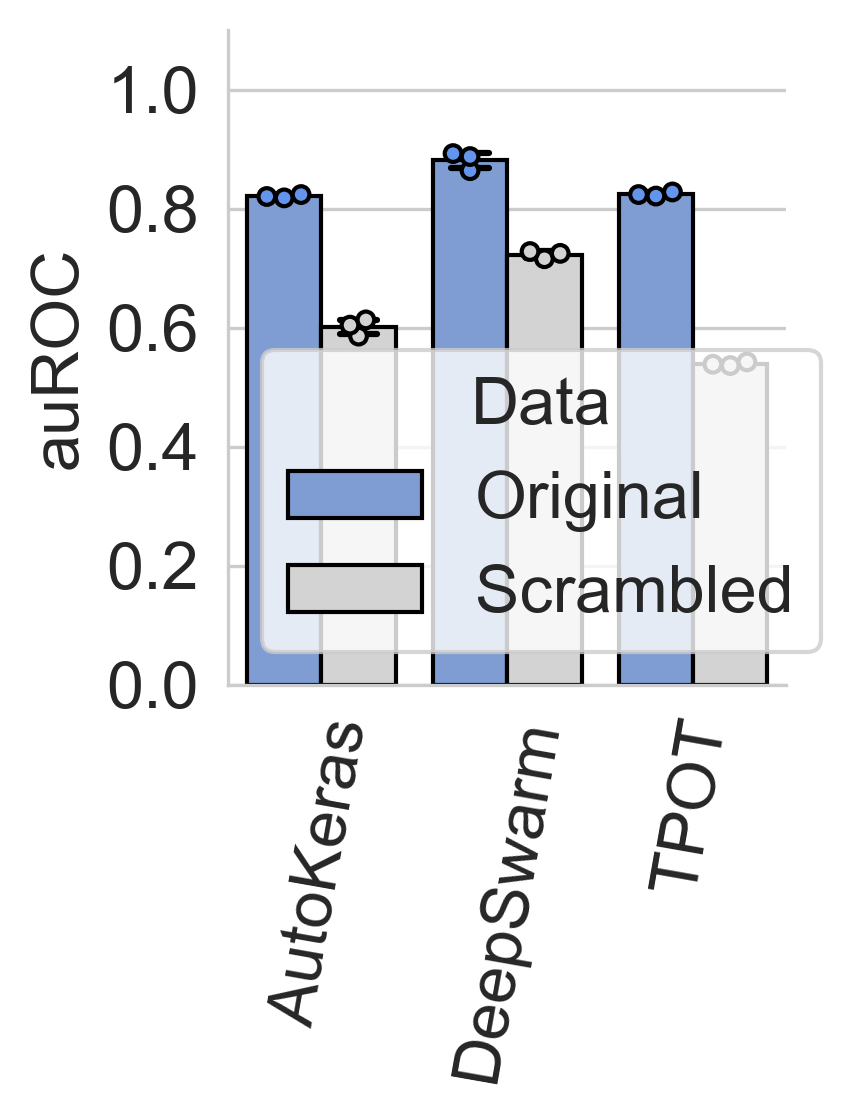

In [8]:
# load in peptides
seq_type = 'peptides/'
df = calc_mcc(data_path, seq_type, 'all values of MCC Class 0')
plot_barplot(df, '../clean_figs/peptides_mcc.svg', 'MCC') 

df = calc_mcc(data_path, seq_type, 'all values of auROC Macro ')
plot_barplot(df, '../clean_figs/peptides_auc.svg', 'auROC') 

Running statistics now...
AutoKeras
Ttest_indResult(statistic=12.54391690675869, pvalue=0.00023240136536977084)
DeepSwarm
Ttest_indResult(statistic=4.224231438641576, pvalue=0.013431960194993127)
TPOT
Ttest_indResult(statistic=25.601074780943975, pvalue=1.3826549845659036e-05)


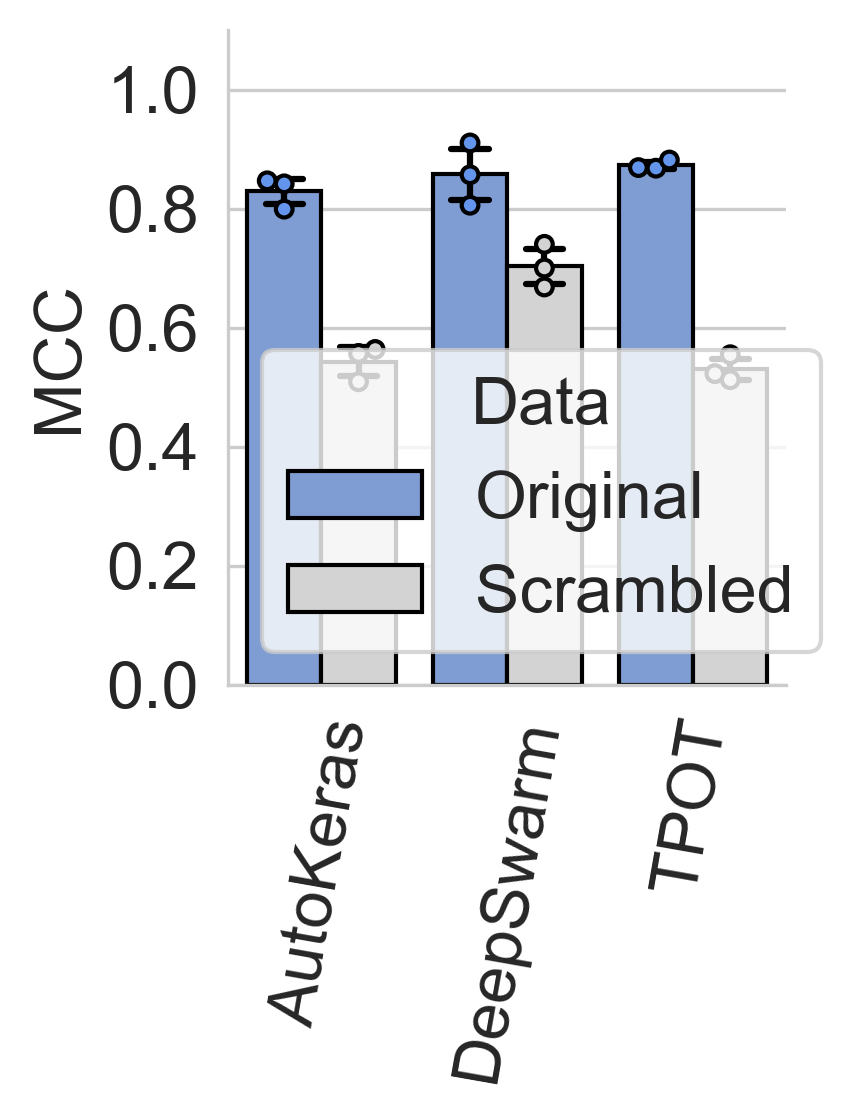

Running statistics now...
AutoKeras
Ttest_indResult(statistic=12.738633738925438, pvalue=0.00021878880361023235)
DeepSwarm
Ttest_indResult(statistic=10.609317822512791, pvalue=0.00044679336288641614)
TPOT
Ttest_indResult(statistic=25.015594703713546, pvalue=1.5159865001103057e-05)


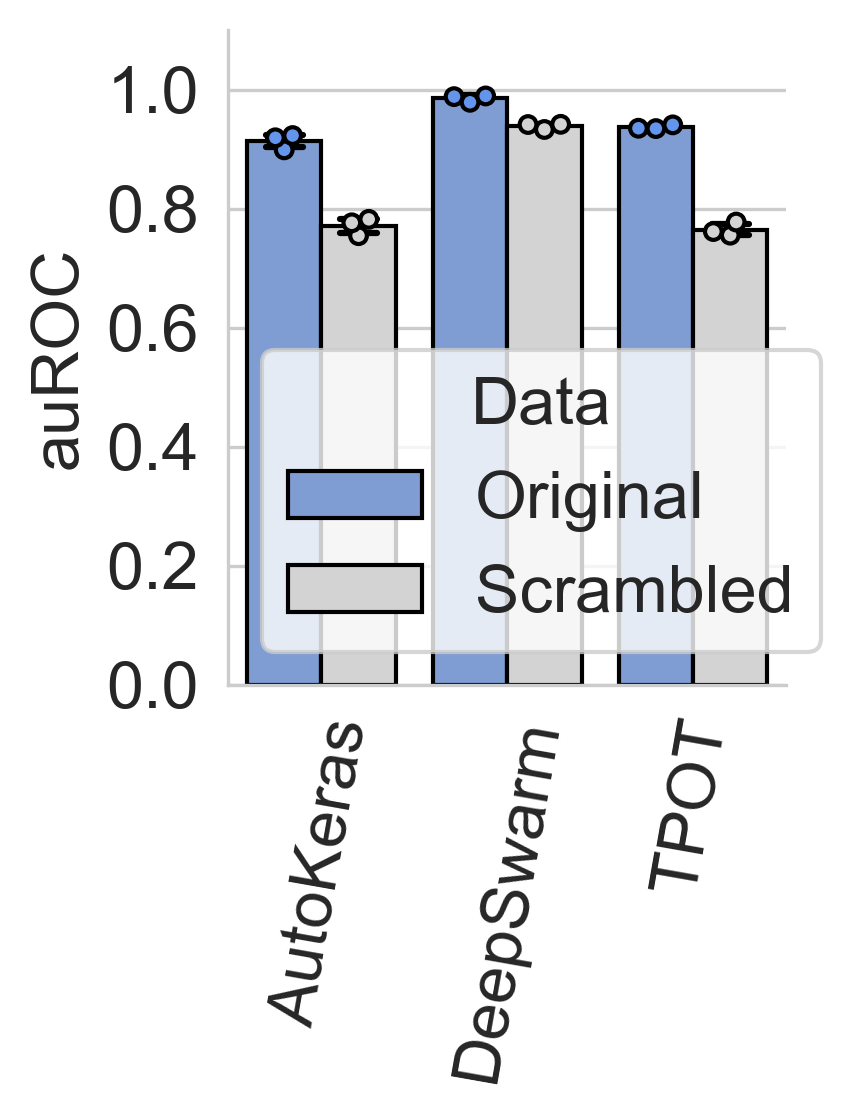

In [9]:
# load in glycans
seq_type = 'glycans_immunogenic/'
df = calc_mcc(data_path, seq_type, 'all values of MCC Class 0')
plot_barplot(df, '../clean_figs/glycans_mcc.svg', 'MCC') 

df = calc_mcc(data_path, seq_type, 'all values of auROC Macro ')
plot_barplot(df, '../clean_figs/glycans_auc.svg', 'auROC') 

# Glycans length tests

Running statistics now...
AutoKeras
Ttest_indResult(statistic=12.54391690675869, pvalue=0.00023240136536977084)
DeepSwarm
Ttest_indResult(statistic=4.224231438641576, pvalue=0.013431960194993127)
TPOT
Ttest_indResult(statistic=25.601074780943975, pvalue=1.3826549845659036e-05)


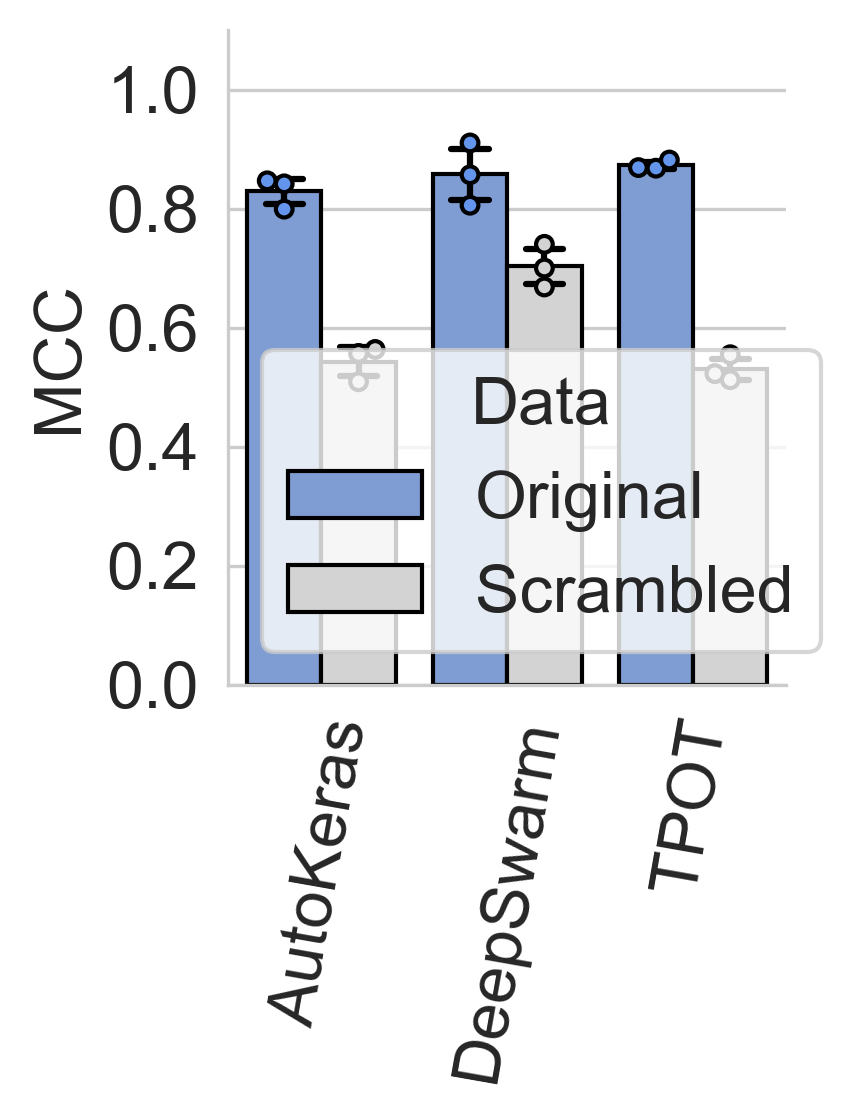

Running statistics now...
AutoKeras
Ttest_indResult(statistic=11.710686143116552, pvalue=0.0003040881402418823)
DeepSwarm
Ttest_indResult(statistic=6.080964721121922, pvalue=0.0036962063614693593)
TPOT
Ttest_indResult(statistic=12.383881099195113, pvalue=0.00024438645427829887)


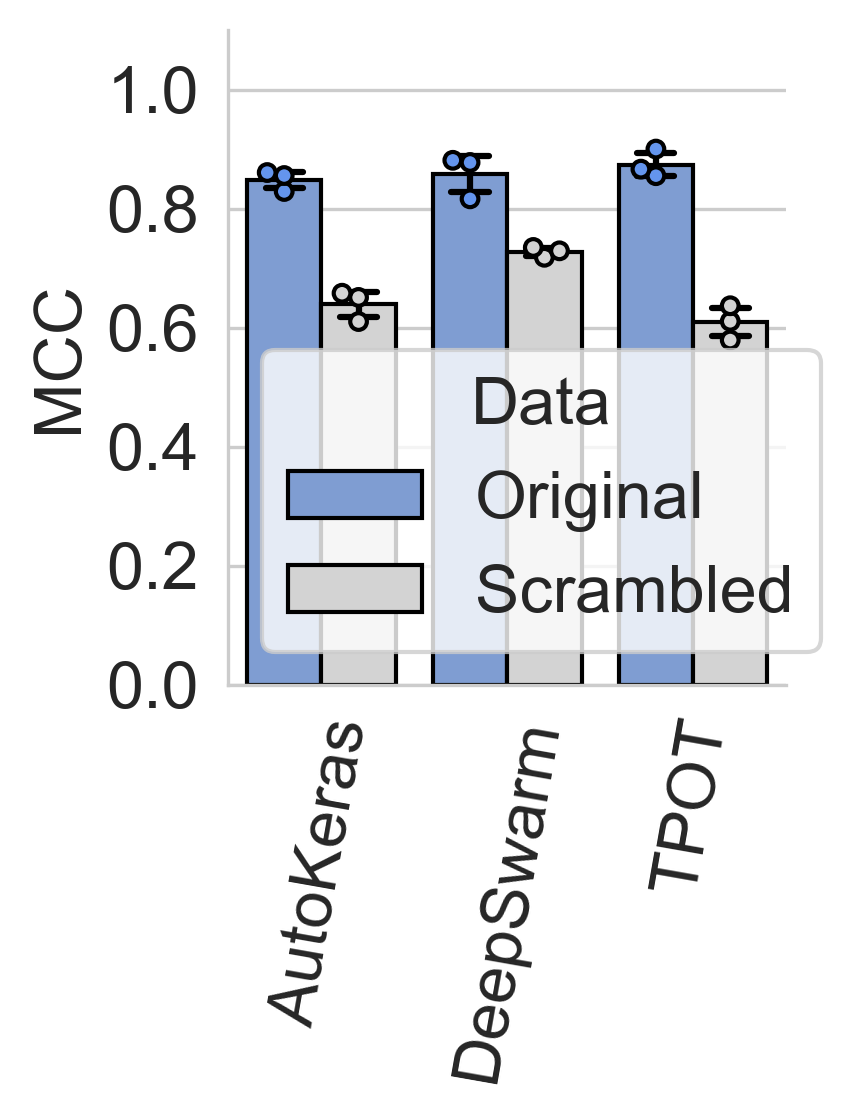

Running statistics now...
AutoKeras
Ttest_indResult(statistic=9.06428808495545, pvalue=0.0008210584525042646)
DeepSwarm
Ttest_indResult(statistic=2.3033506073659926, pvalue=0.0826339701276007)
TPOT
Ttest_indResult(statistic=11.911083533065858, pvalue=0.0002845832625083158)


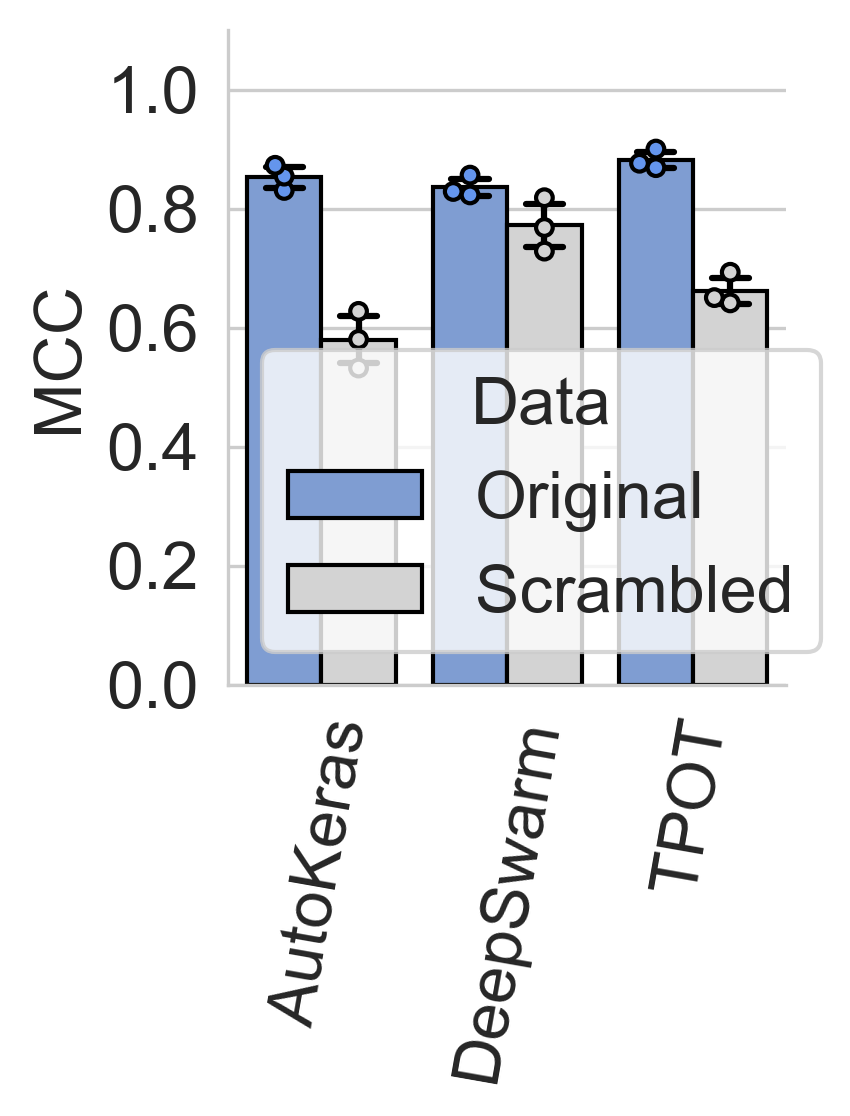

In [10]:
# load in glycans
all_lengths = pd.DataFrame()

seq_type = 'glycans_immunogenic/' # baseline was with max
df = calc_mcc(data_path, seq_type, 'all values of MCC Class 0')
plot_barplot(df, '../clean_figs/lenth_tests_immunogenic_glycans_max.svg', 'MCC') 
df['Length'] = ['Maximum'] * len(df)
all_lengths = pd.concat([all_lengths, df])
                        
seq_type = 'length_tests/immunogenic_glycans_min/'
df = calc_mcc(data_path, seq_type, 'all values of MCC Class 0')
plot_barplot(df, '../clean_figs/lenth_tests_immunogenic_glycans_min.svg', 'MCC') 
df['Length'] = ['Minimum'] * len(df)
all_lengths = pd.concat([all_lengths, df])

seq_type = 'length_tests/immunogenic_glycans_avg/'
df = calc_mcc(data_path, seq_type, 'all values of MCC Class 0')
plot_barplot(df, '../clean_figs/lenth_tests_immunogenic_glycans_avg.svg', 'MCC') 
df['Length'] = ['Average'] * len(df)
all_lengths = pd.concat([all_lengths, df])

/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


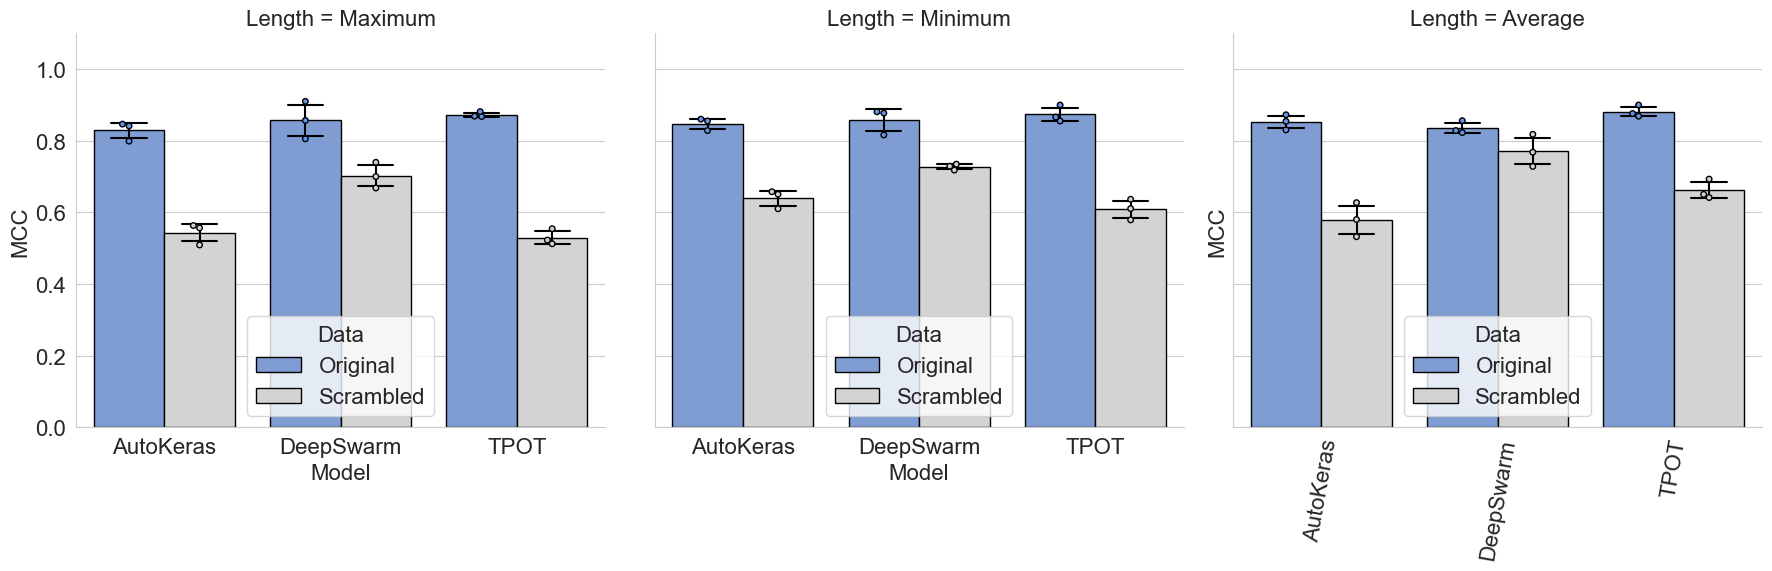

In [11]:
def reshape_lengths(df):
    new = pd.DataFrame()
    new['model_type'] = []
    new
    index = 0
    for name, col in df.iteritems():
        if 'scr' in name or 'Length' in name:
            continue
        new_pd = pd.DataFrame(col)
        new_pd.columns = ['values']
        new_pd['scr'] = list(df['scr'])
        new_pd['model_type'] = [name] * len(new_pd)
        new_pd['Length'] = list(df['Length'])
        new = pd.concat([new, new_pd])
        index = index + 1
    new.columns = ['Model', 'MCC', 'Data', 'Length']
    return(new)

def plot_lengths(mcc, savepath, yaxis):
    mcc = reshape_lengths(mcc)  
    my_pal = {"Original": "cornflowerblue", "Scrambled": "lightgrey"}

    g = sns.FacetGrid(mcc, col="Length", height=6, aspect=1, margin_titles=True)
    g.map(sns.barplot, 'Model', 'MCC', 'Data', edgecolor='black', alpha = 1, linewidth = 1, palette = my_pal, ci = 'sd', errcolor = 'black', errwidth = 1.5, capsize = 0.2, saturation = 0.6)
    g.map(sns.swarmplot, 'Model', 'MCC', 'Data', dodge = True, edgecolor='black', alpha = 1, linewidth = 1, s = 4, palette = my_pal)

    for ax in g.axes_dict.values():
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles[2:4], labels[2:4], title='Data')#

        plt.xlabel('')
        plt.xticks(rotation = 80)
        plt.ylabel(yaxis)
        plt.ylim([0, 1.1])
        plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    plt.tight_layout()
    plt.savefig(savepath)
    plt.show()
    
plot_lengths(all_lengths, '../clean_figs/length_tests_immunogenic_glycans.svg', 'MCC')


In [12]:
def calc_length_stats(df):
    # compare original to each other at every point
    print('Comparing Original Model to Scrambled Model...')
    for lengthtype in ['Maximum', 'Minimum', 'Average']:
        print(lengthtype)
        curr = df[df['Length'] == lengthtype]
        orig = curr[curr['scr'] == 'Original']
        scr = curr[curr['scr'] == 'Scrambled']
        for modeltype in ['AutoKeras', 'DeepSwarm', 'TPOT']:
            print(modeltype)
            print(sp.ttest_ind(list(orig[modeltype]), list(scr[modeltype])))
        print('\n')

calc_length_stats(all_lengths)


Comparing Original Model to Scrambled Model...
Maximum
AutoKeras
Ttest_indResult(statistic=12.54391690675869, pvalue=0.00023240136536977084)
DeepSwarm
Ttest_indResult(statistic=4.224231438641576, pvalue=0.013431960194993127)
TPOT
Ttest_indResult(statistic=25.601074780943975, pvalue=1.3826549845659036e-05)


Minimum
AutoKeras
Ttest_indResult(statistic=11.710686143116552, pvalue=0.0003040881402418823)
DeepSwarm
Ttest_indResult(statistic=6.080964721121922, pvalue=0.0036962063614693593)
TPOT
Ttest_indResult(statistic=12.383881099195113, pvalue=0.00024438645427829887)


Average
AutoKeras
Ttest_indResult(statistic=9.06428808495545, pvalue=0.0008210584525042646)
DeepSwarm
Ttest_indResult(statistic=2.3033506073659926, pvalue=0.0826339701276007)
TPOT
Ttest_indResult(statistic=11.911083533065858, pvalue=0.0002845832625083158)




# Robustness Test

In [13]:
def calc_robustness(folder, seq, val_name, maxlen):
    folds = ['outputs/autokeras/binary_classification/', 'outputs/deepswarm/binary_classification/', 'outputs/tpot/binary_classification/']
    columns = ['$\it{Model}$', 'datasize', 'fold', 'value', '$\it{Data}$']
    mcc = pd.DataFrame(columns = columns)
    
    file_name = 'results.txt'
    for fold in folds:
        name = fold.split('outputs/')[1].split('/binary_classification')[0] 
        name = name.replace('deepswarm', 'DeepSwarm')
        name = name.replace('autokeras', 'AutoKeras')
        name = name.replace('tpot', 'TPOT')
        
        # initialize it with the full dataset mccc
        for filename in glob.glob(folder + seq + fold + '*' +  file_name):
            scrambled = 'Original'
            size = maxlen
            df = pd.read_csv(filename, sep = '\t', header = None)
            vals = df.values
            for i in range(len(vals)):
                val = vals[i]
                if val_name in val[0]:
                    new = val[0].split(": ")[1]
                    new = new.strip("[")
                    new = new.strip("]")

                    new = [s for s in new.split(' ')]
                    new = [s for s in new if s != '']
                    new = [0 if s == '0.' else s for s in new]
                    new = [float(s) for s in new]
                    index = 0
                    for n in new:
                        entire_new_row = [name, int(size), int(index), n, scrambled]
                        entire_new_row = pd.DataFrame(entire_new_row).transpose()
                        entire_new_row.columns = columns  
                        mcc = pd.concat([mcc, entire_new_row])
                        index = index + 1
        
        # add on it the scrambled dataset mccc
        file_name = 'all_scrambled_control_results.txt'
        for filename in glob.glob(folder + seq + fold + 'scrambled/' +  file_name):
            scrambled = 'Scrambled'
            size = maxlen
            df = pd.read_csv(filename, sep = '\t', header = None)
            vals = df.values
            for i in range(len(vals)):
                val = vals[i]
                if val_name in val[0]:
                    new = val[0].split(": ")[1]
                    new = new.strip("[")
                    new = new.strip("]")

                    new = [s for s in new.split(' ')]
                    new = [s for s in new if s != '']
                    new = [0 if s == '0.' else s for s in new]
                    new = [float(s) for s in new]
                    index = 0
                    for n in new:
                        entire_new_row = [name, int(size), int(index), n, scrambled]
                        entire_new_row = pd.DataFrame(entire_new_row).transpose()
                        entire_new_row.columns = columns  
                        mcc = pd.concat([mcc, entire_new_row])
                        index = index + 1
        
        file_name = 'results.txt'
        # now do the rest!
        for filename in glob.glob(folder + seq + fold + 'robustness/*' +  file_name):
            if 'scrambled' in filename:
                scrambled = 'Scrambled'
            else:
                scrambled = 'Original'
            size = filename.split("robustness/")[1].split("_")[0]
            df = pd.read_csv(filename, sep = '\t', header = None)
            vals = df.values
            for i in range(len(vals)):
                val = vals[i]
                if val_name in val[0]:
                    new = val[0].split(": ")[1]
                    new = new.strip("[")
                    new = new.strip("]")

                    new = [s for s in new.split(' ')]
                    new = [s for s in new if s != '']
                    new = [0 if s == '0.' else s for s in new]
                    new = [float(s) for s in new]
                    index = 0
                    for n in new:
                        entire_new_row = [name, int(size), int(index), n, scrambled]
                        entire_new_row = pd.DataFrame(entire_new_row).transpose()
                        entire_new_row.columns = columns  
                        mcc = pd.concat([mcc, entire_new_row])
                        index = index + 1
    return(mcc)

def plot_lineplot(mcc, savepath, yaxis):
    #mcc = reshape(mcc)  
    mcc.datasize = df.datasize.astype(float)
    mcc.value = df.value.astype(float)
    plt.figure(figsize=(7,4), dpi=300)
    my_pal = {"AutoKeras": "cornflowerblue", "DeepSwarm": "sandybrown", "TPOT": "grey"}
    ax = sns.lineplot(x = 'datasize', y = 'value', hue = '$\it{Model}$', style = '$\it{Data}$', data=mcc,  alpha = 1, linewidth = 2,  ci = 'sd', palette = my_pal)
    sns.scatterplot(x = 'datasize', y = 'value', hue = '$\it{Model}$', data=mcc, edgecolor='black', alpha = 1, linewidth = 0.4, s = 10, palette = my_pal)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:7], labels[:7], bbox_to_anchor=(1.01, 1), borderaxespad=0)
    plt.xlabel('Dataset Size')
    plt.xticks(rotation = 60)
    plt.ylabel(yaxis)
    ax.set_xscale('log')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tight_layout()
    plt.savefig(savepath)
    plt.show()

def calc_robustness_stats(df):
    # compare original to each other at every point
    print('Comparing Original Model to Original Model...')
    print('\n')
    orig = df[df['$\it{Data}$'] == 'Original']
    for size in sorted(list(set(list(orig['datasize'])))):
        sized = orig[orig['datasize'] == size]
        print('dataset size: ' + str(size))
        ak = list(sized[sized['$\it{Model}$'] == 'AutoKeras']['value'])
        ds = list(sized[sized['$\it{Model}$'] == 'DeepSwarm']['value'])
        tpot = list(sized[sized['$\it{Model}$'] == 'TPOT']['value'])
        print('Comparing DeepSwarm with AK')
        print(sp.ttest_ind(ds, ak))
        print('Comparing DeepSwarm with TPOT')
        print(sp.ttest_ind(ds, tpot))
        print('Comparing AK with TPOT')
        print(sp.ttest_ind(ak, tpot))
        print('\n')
    
    print('Comparing Original Model to Scrambled Model...')
    print('\n')
    scr = df[df['$\it{Data}$'] == 'Scrambled']
    for size in sorted(list(set(list(orig['datasize'])))):
        sized_orig = orig[orig['datasize'] == size]
        sized_scr = scr[scr['datasize'] == size]
        print('dataset size: ' + str(size))
        ak_orig = list(sized_orig[sized_orig['$\it{Model}$'] == 'AutoKeras']['value'])
        ds_orig = list(sized_orig[sized_orig['$\it{Model}$'] == 'DeepSwarm']['value'])
        tpot_orig = list(sized_orig[sized_orig['$\it{Model}$'] == 'TPOT']['value'])
        ak_scr = list(sized_scr[sized_scr['$\it{Model}$'] == 'AutoKeras']['value'])
        ds_scr = list(sized_scr[sized_scr['$\it{Model}$'] == 'DeepSwarm']['value'])
        tpot_scr = list(sized_scr[sized_scr['$\it{Model}$'] == 'TPOT']['value'])
        print('Comparing DeepSwarm')
        print(sp.ttest_ind(ds_orig, ds_scr))
        print('Comparing TPOT')
        print(sp.ttest_ind(tpot_orig, tpot_scr))
        print('Comparing AK')
        print(sp.ttest_ind(ak_orig, ak_scr))
        print('\n')
        

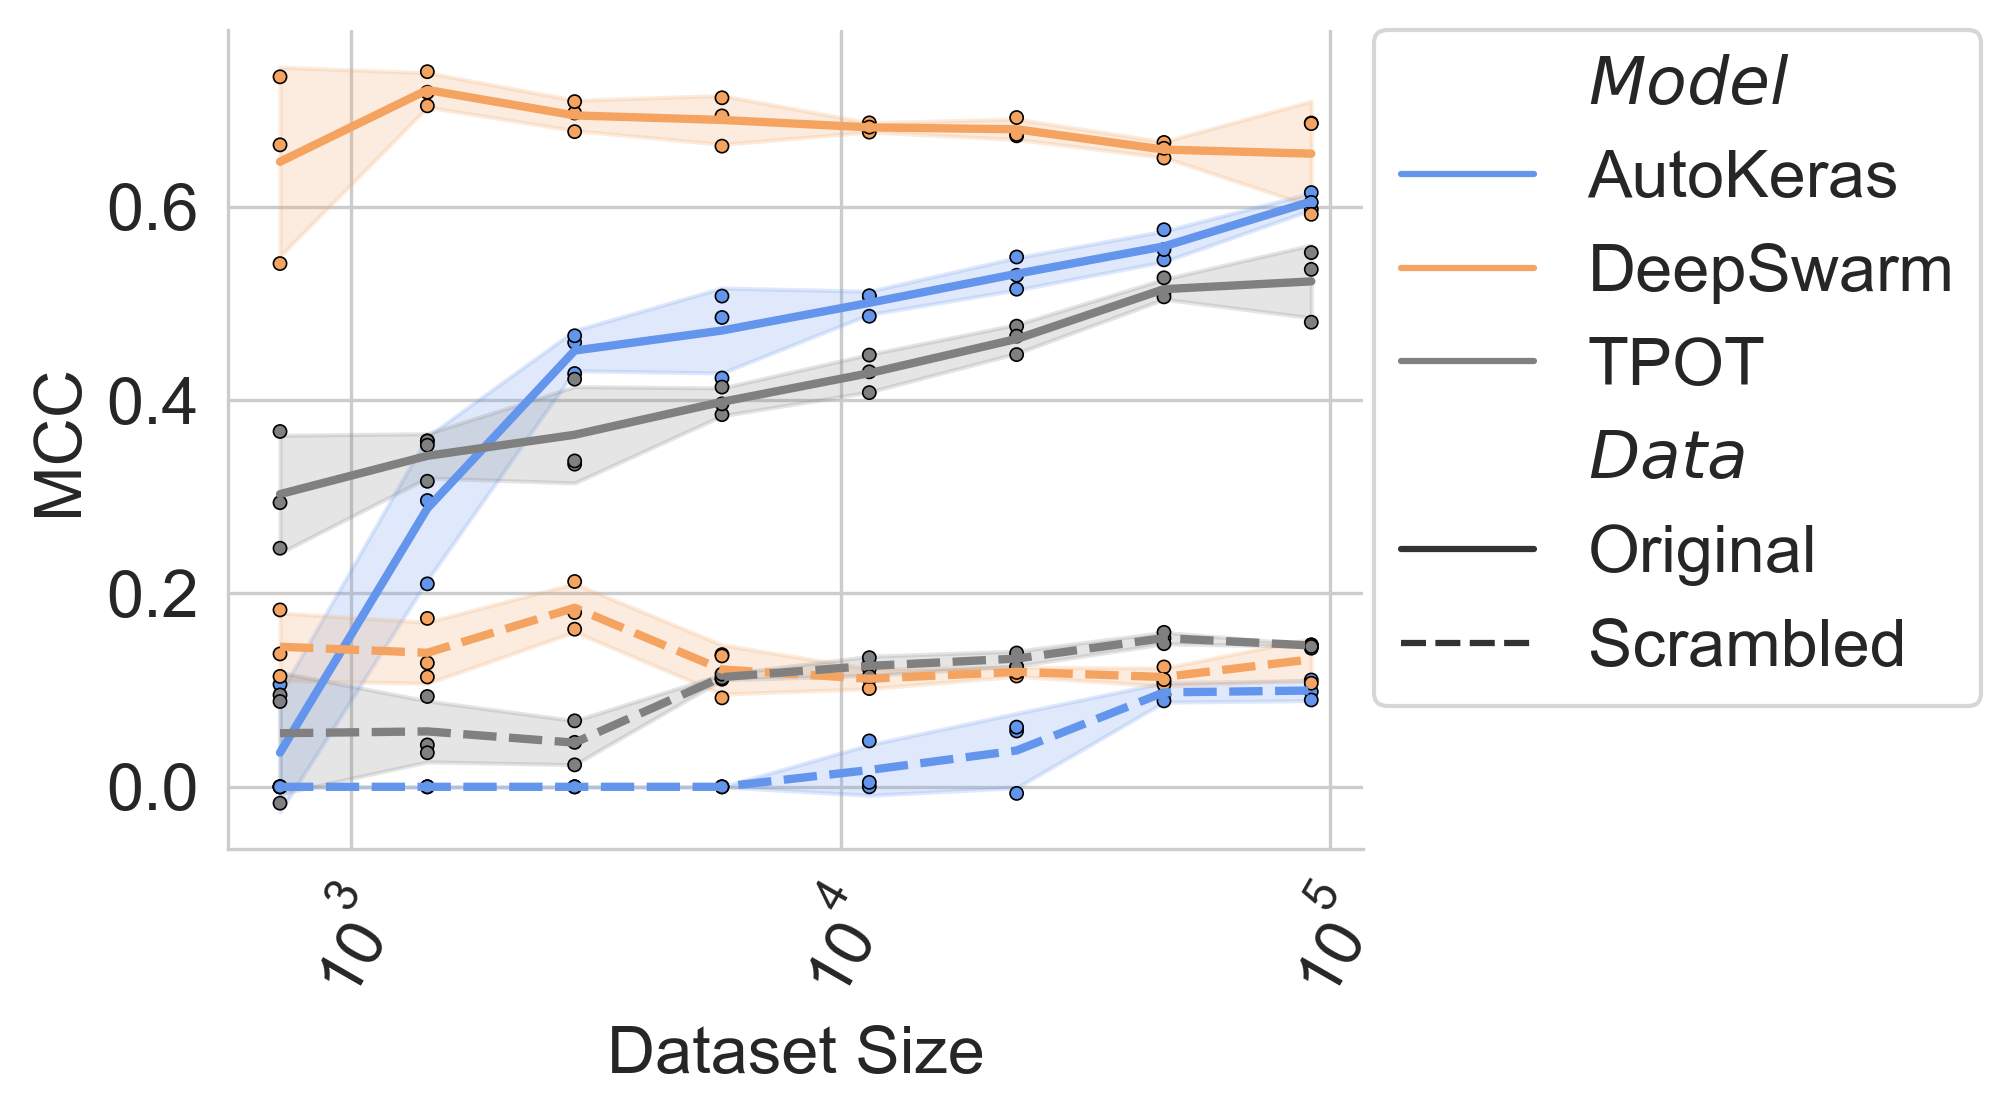

Comparing Original Model to Original Model...


dataset size: 715.0
Comparing DeepSwarm with AK
Ttest_indResult(statistic=9.179989078335506, pvalue=0.0007819591508362099)
Comparing DeepSwarm with TPOT
Ttest_indResult(statistic=5.170932051260319, pvalue=0.006647706796071752)
Comparing AK with TPOT
Ttest_indResult(statistic=-5.367129236850573, pvalue=0.00581848200328442)


dataset size: 1430.0
Comparing DeepSwarm with AK
Ttest_indResult(statistic=9.810924596884957, pvalue=0.0006050830520619681)
Comparing DeepSwarm with TPOT
Ttest_indResult(statistic=22.6196787174841, pvalue=2.2623920524945826e-05)
Comparing AK with TPOT
Ttest_indResult(statistic=-1.2109369892450434, pvalue=0.29257139783923947)


dataset size: 2860.0
Comparing DeepSwarm with AK
Ttest_indResult(statistic=16.14683231921755, pvalue=8.605532349858777e-05)
Comparing DeepSwarm with TPOT
Ttest_indResult(statistic=10.948869947117496, pvalue=0.00039527551853575307)
Comparing AK with TPOT
Ttest_indResult(statistic=2.791244529967644

In [14]:
data_path = '../exemplars/'
seq_type = 'toeholds/'
df = calc_robustness(data_path, seq_type, 'all values of MCC Class 0', 91534)
plot_lineplot(df, '../clean_figs/toeholds_robustness.svg', 'MCC')
calc_robustness_stats(df)

In [15]:
def calc_regression_robustness(folder, seq, val_name, maxlen):
    folds = ['outputs/autokeras/regression/', 'outputs/deepswarm/regression/', 'outputs/tpot/regression/']
    columns = ['$\it{Model}$', 'datasize', 'fold', 'value', '$\it{Data}$']
    mcc = pd.DataFrame(columns = columns)
    
    file_name = 'results.txt'
    for fold in folds:
        name = fold.split('outputs/')[1].split('/regression')[0] 
        name = name.replace('deepswarm', 'DeepSwarm')
        name = name.replace('autokeras', 'AutoKeras')
        name = name.replace('tpot', 'TPOT')
        
        # initialize it with the full dataset mccc
        for filename in glob.glob(folder + seq + fold + '*' +  file_name):
            scrambled = 'Original'
            size = maxlen
            df = pd.read_csv(filename, sep = '\t', header = None)
            vals = df.values
            for i in range(len(vals)):
                val = vals[i]
                if val_name in val[0]:
                    new = val[0].split(": ")[1]
                    new = new.strip("[")
                    new = new.strip("]")

                    new = [s for s in new.split(' ')]
                    new = [s for s in new if s != '']
                    new = [0 if s == '0.' else s for s in new]
                    new = [float(s) for s in new]
                    index = 0
                    for n in new:
                        entire_new_row = [name, int(size), int(index), n, scrambled]
                        entire_new_row = pd.DataFrame(entire_new_row).transpose()
                        entire_new_row.columns = columns  
                        mcc = pd.concat([mcc, entire_new_row])
                        index = index + 1
        
        # add on it the scrambled dataset mccc
        file_name = 'all_scrambled_control_results.txt'
        for filename in glob.glob(folder + seq + fold + 'scrambled/' +  file_name):
            scrambled = 'Scrambled'
            size = maxlen
            df = pd.read_csv(filename, sep = '\t', header = None)
            vals = df.values
            for i in range(len(vals)):
                val = vals[i]
                if val_name in val[0]:
                    new = val[0].split(": ")[1]
                    new = new.strip("[")
                    new = new.strip("]")

                    new = [s for s in new.split(' ')]
                    new = [s for s in new if s != '']
                    new = [0 if s == '0.' else s for s in new]
                    new = [float(s) for s in new]
                    index = 0
                    for n in new:
                        entire_new_row = [name, int(size), int(index), n, scrambled]
                        entire_new_row = pd.DataFrame(entire_new_row).transpose()
                        entire_new_row.columns = columns  
                        mcc = pd.concat([mcc, entire_new_row])
                        index = index + 1
        
        file_name = 'results.txt'
        # now do the rest!
        for filename in glob.glob(folder + seq + fold + 'robustness/*' +  file_name):
            if 'scrambled' in filename:
                scrambled = 'Scrambled'
            else:
                scrambled = 'Original'
            size = filename.split("robustness/")[1].split("_")[0]
            df = pd.read_csv(filename, sep = '\t', header = None)
            vals = df.values
            for i in range(len(vals)):
                val = vals[i]
                if val_name in val[0]:
                    new = val[0].split(": ")[1]
                    new = new.strip("[")
                    new = new.strip("]")

                    new = [s for s in new.split(' ')]
                    new = [s for s in new if s != '']
                    new = [0 if s == '0.' else s for s in new]
                    new = [float(s) for s in new]
                    index = 0
                    for n in new:
                        entire_new_row = [name, int(size), int(index), n, scrambled]
                        entire_new_row = pd.DataFrame(entire_new_row).transpose()
                        entire_new_row.columns = columns  
                        mcc = pd.concat([mcc, entire_new_row])
                        index = index + 1
    return(mcc)
        

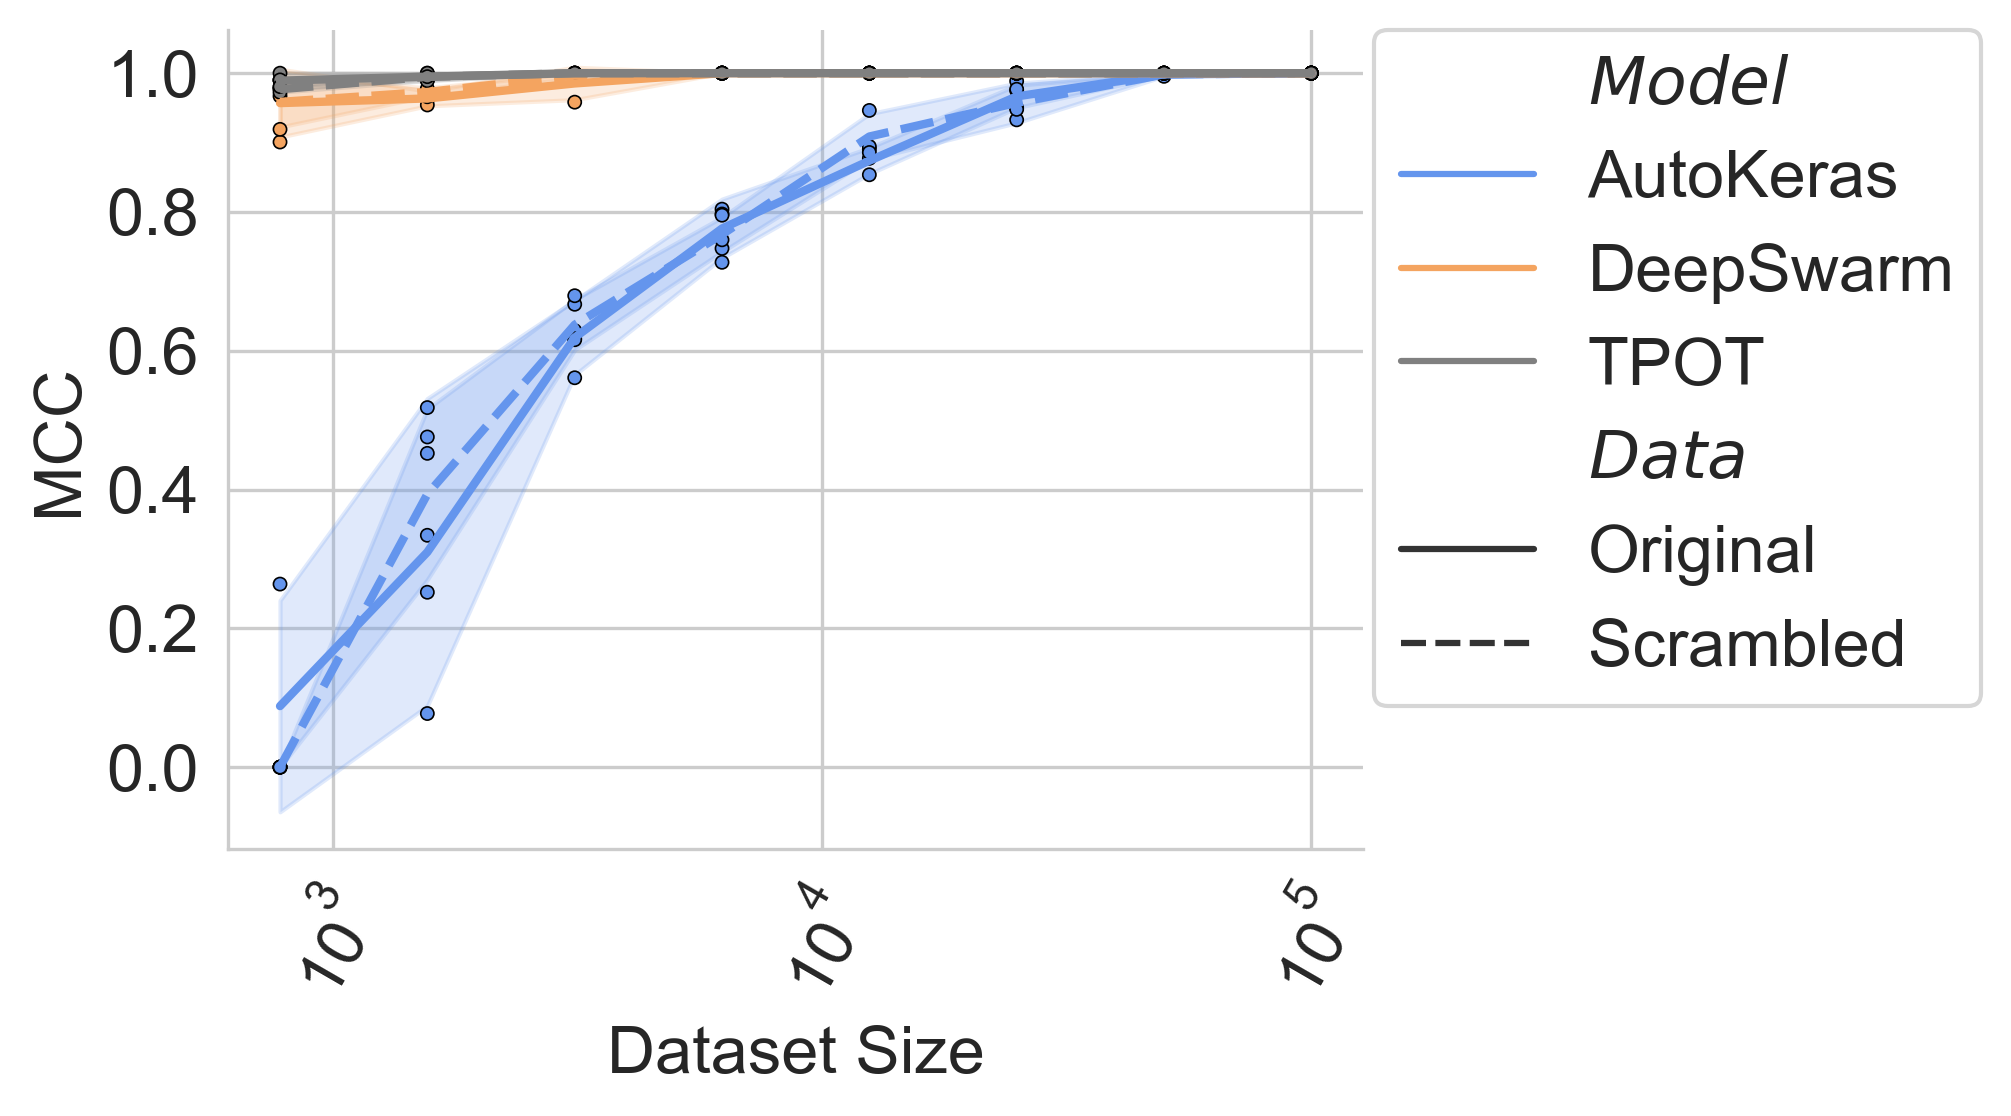

Comparing Original Model to Original Model...


dataset size: 781.0
Comparing DeepSwarm with AK
Ttest_indResult(statistic=9.410324750957864, pvalue=0.0007107633747268827)
Comparing DeepSwarm with TPOT
Ttest_indResult(statistic=-1.1193601696380555, pvalue=0.3256606082523637)
Comparing AK with TPOT
Ttest_indResult(statistic=-10.222552044574476, pvalue=0.0005160641412963252)


dataset size: 1562.0
Comparing DeepSwarm with AK
Ttest_indResult(statistic=5.107820680456885, pvalue=0.0069446846912034265)
Comparing DeepSwarm with TPOT
Ttest_indResult(statistic=-4.631386157749356, pvalue=0.009797027233664811)
Comparing AK with TPOT
Ttest_indResult(statistic=-5.357918140851145, pvalue=0.0058544796999742636)


dataset size: 3125.0
Comparing DeepSwarm with AK
Ttest_indResult(statistic=10.836022586665097, pvalue=0.0004115358291103034)
Comparing DeepSwarm with TPOT
Ttest_indResult(statistic=-1.096124901938703, pvalue=0.33458778752932594)
Comparing AK with TPOT
Ttest_indResult(statistic=-12.29849974560

In [16]:
seq_type = 'large_synthetic_nucleic_acids/'
df = calc_robustness(data_path, seq_type, 'all values of MCC Class 0', 100000)
plot_lineplot(df, '../clean_figs/large_synthetic_nucleic_acids_robustness.svg', 'MCC')
calc_robustness_stats(df)

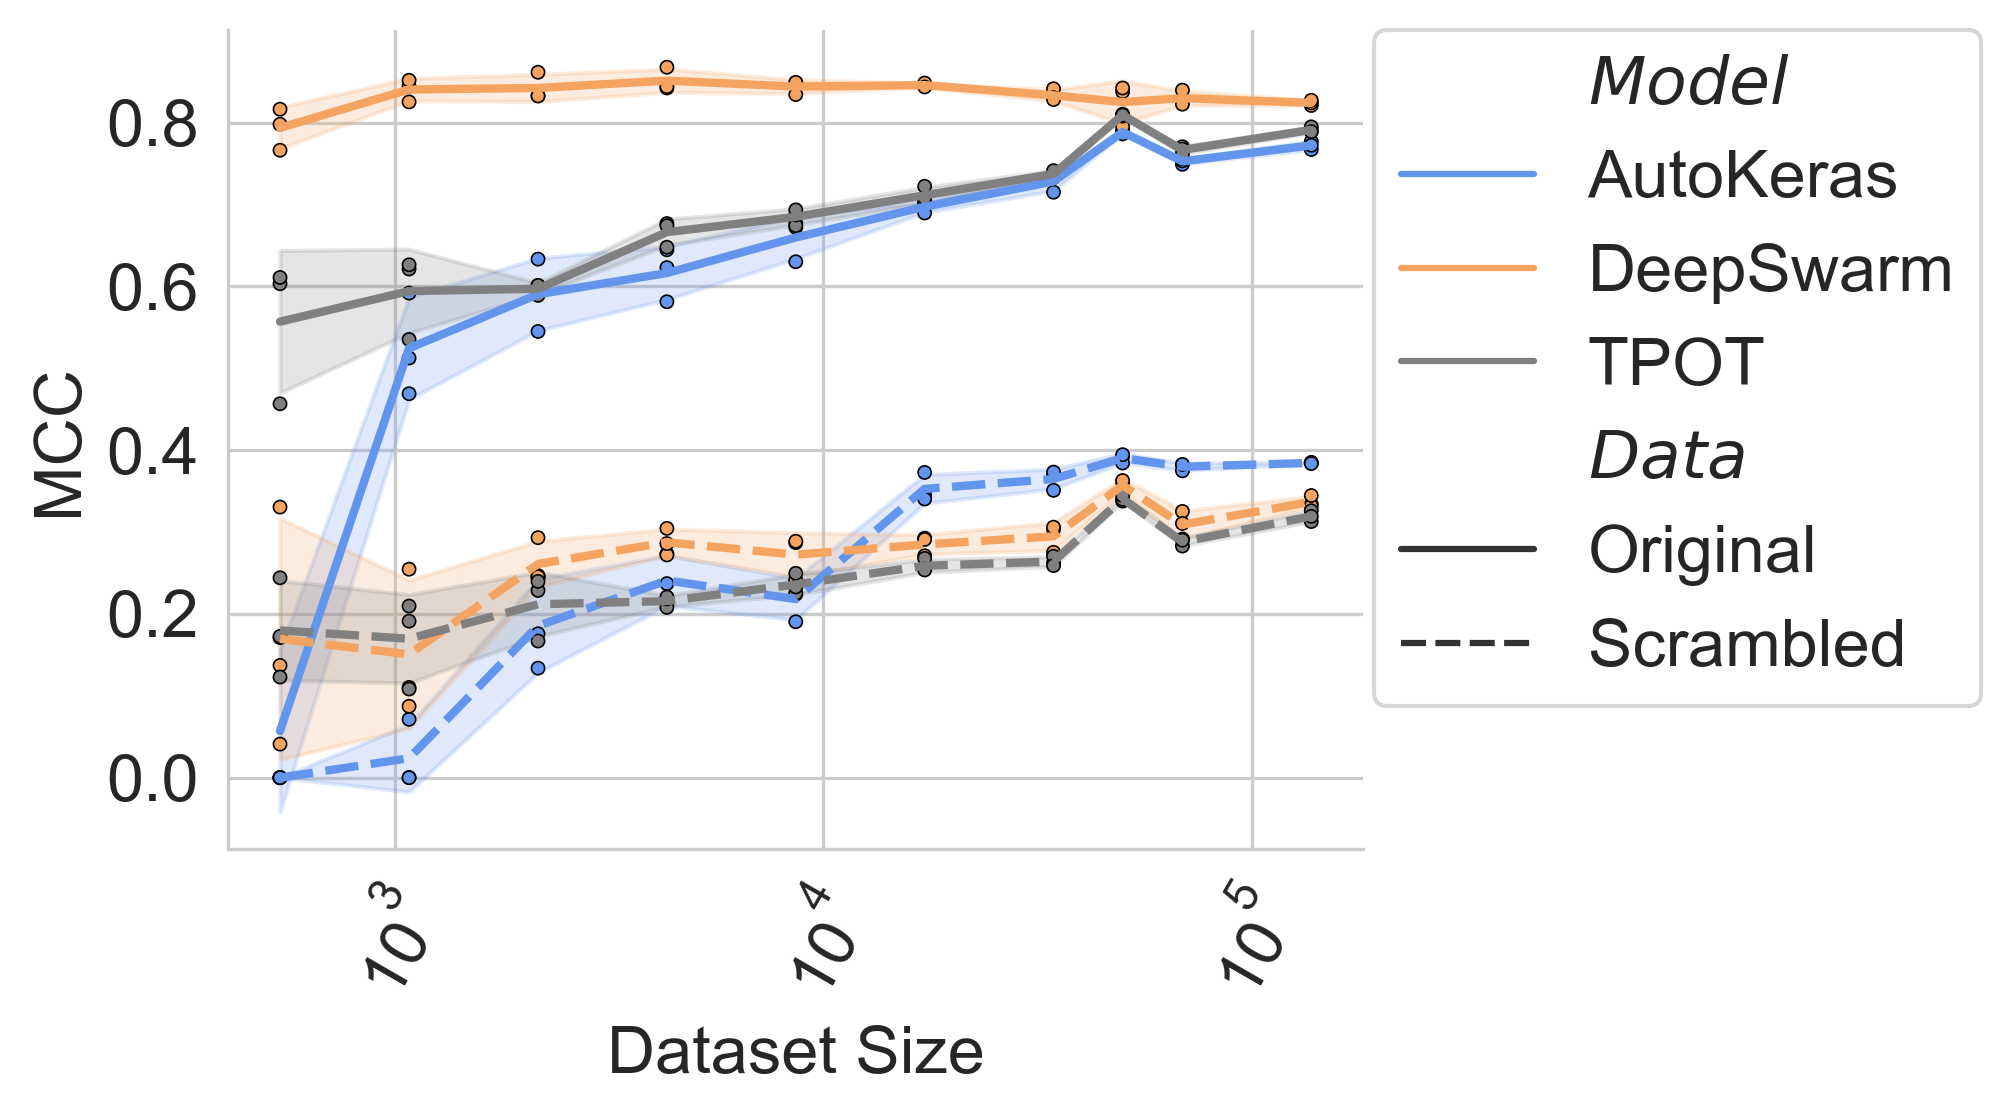

Comparing Original Model to Original Model...


dataset size: 538.0
Comparing DeepSwarm with AK
Ttest_indResult(statistic=12.515323985063219, pvalue=0.00023448809334464935)
Comparing DeepSwarm with TPOT
Ttest_indResult(statistic=4.5259076556425075, pvalue=0.010610393480801778)
Comparing AK with TPOT
Ttest_indResult(statistic=-6.5813177191420715, pvalue=0.0027595974153794144)


dataset size: 1077.0
Comparing DeepSwarm with AK
Ttest_indResult(statistic=8.581656886559713, pvalue=0.0010128393957127373)
Comparing DeepSwarm with TPOT
Ttest_indResult(statistic=8.042096512548008, pvalue=0.00129772548932504)
Comparing AK with TPOT
Ttest_indResult(statistic=-1.4996179227608548, pvalue=0.20809392083114192)


dataset size: 2155.0
Comparing DeepSwarm with AK
Ttest_indResult(statistic=9.23332728084166, pvalue=0.0007647130223374047)
Comparing DeepSwarm with TPOT
Ttest_indResult(statistic=23.512626529349465, pvalue=1.939669068342086e-05)
Comparing AK with TPOT
Ttest_indResult(statistic=-0.261888768834

In [17]:
seq_type = 'rbs/'
df = calc_robustness(data_path, seq_type, 'all values of MCC Class 0', 50000)
plot_lineplot(df, '../clean_figs/rbs_robustness.svg', 'MCC')
calc_robustness_stats(df)

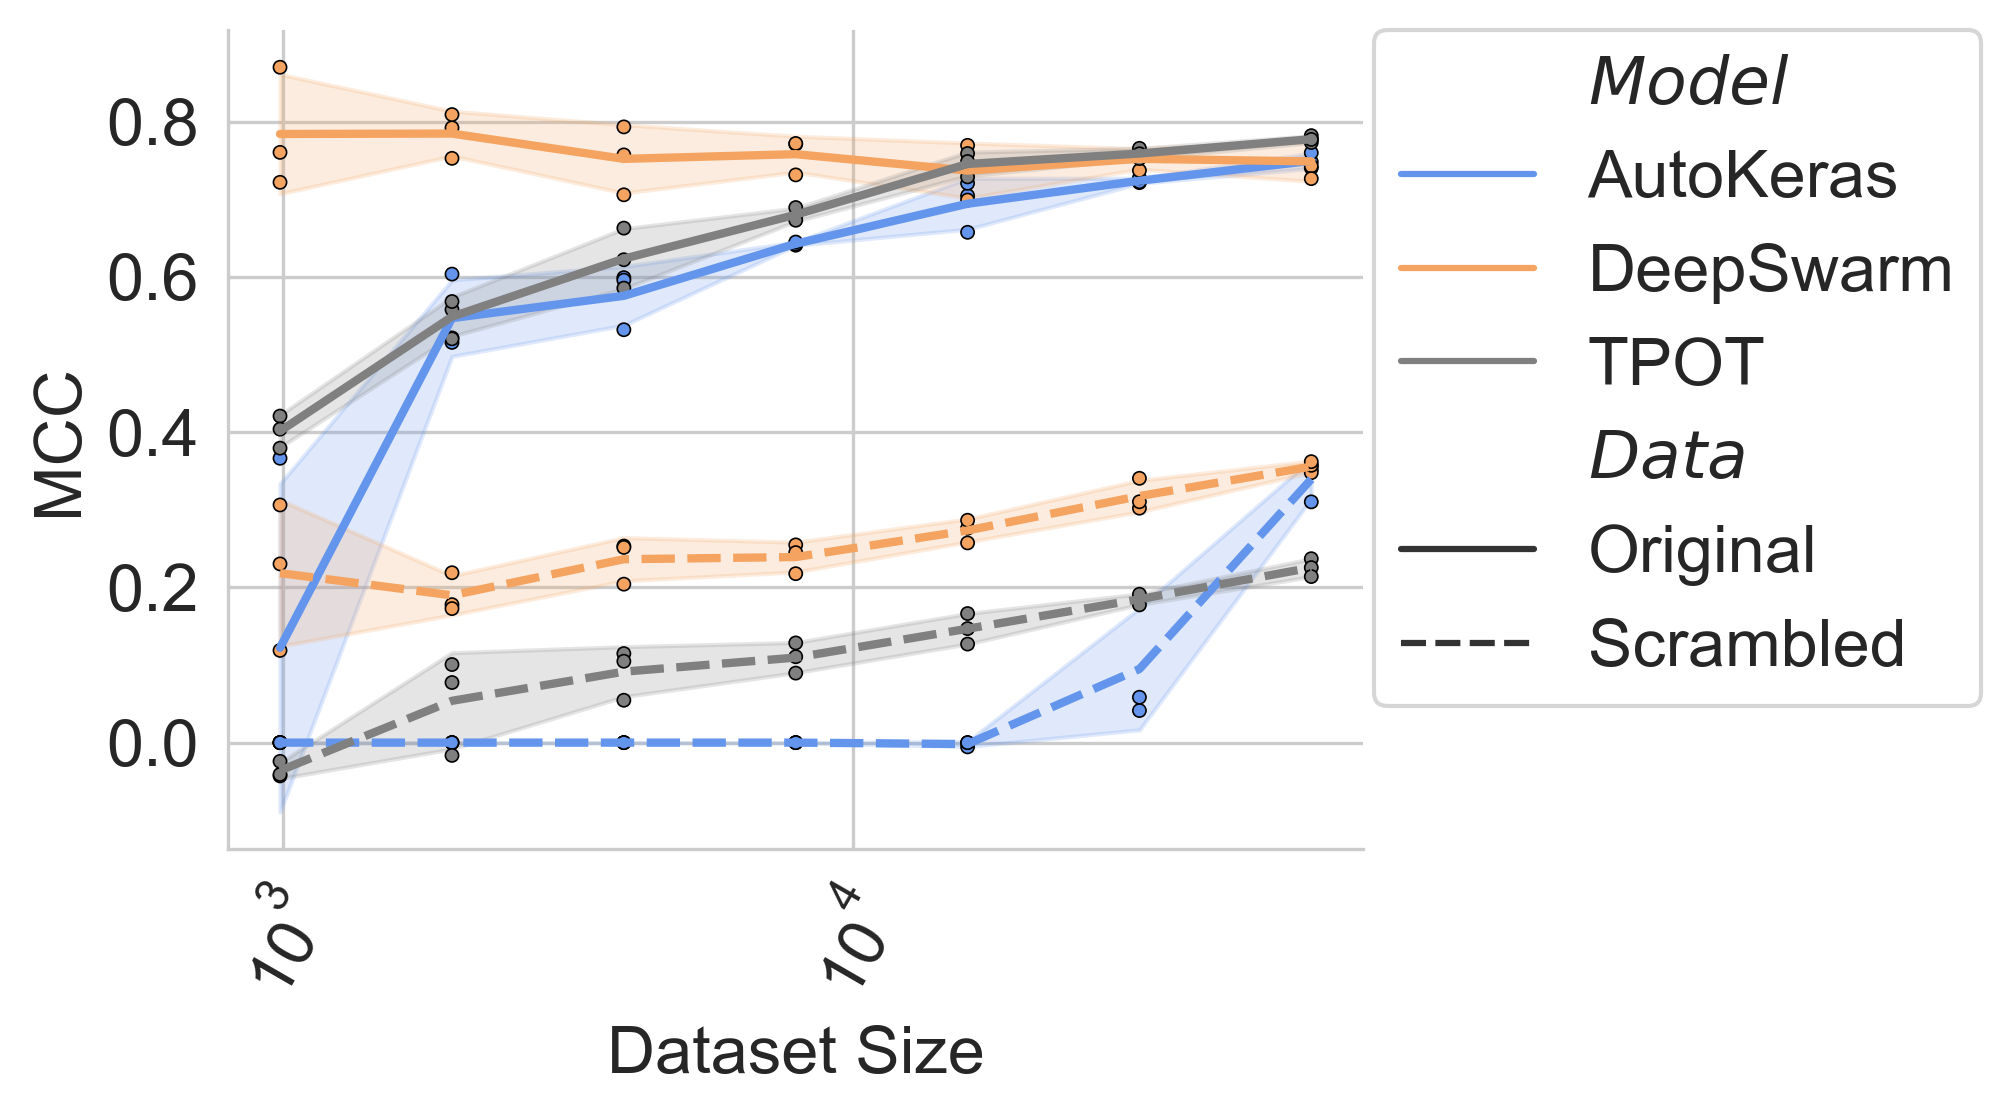

Comparing Original Model to Original Model...


dataset size: 990.0
Comparing DeepSwarm with AK
Ttest_indResult(statistic=5.094845702973002, pvalue=0.007007731556741793)
Comparing DeepSwarm with TPOT
Ttest_indResult(statistic=8.322142221796904, pvalue=0.0011389934712397586)
Comparing AK with TPOT
Ttest_indResult(statistic=-2.2754490021995335, pvalue=0.08521340370771704)


dataset size: 1981.0
Comparing DeepSwarm with AK
Ttest_indResult(statistic=7.2148983528866175, pvalue=0.0019568643311848647)
Comparing DeepSwarm with TPOT
Ttest_indResult(statistic=10.636861220312298, pvalue=0.0004423145794819643)
Comparing AK with TPOT
Ttest_indResult(statistic=-0.059873092176612366, pvalue=0.9551286856356358)


dataset size: 3962.0
Comparing DeepSwarm with AK
Ttest_indResult(statistic=5.268370210884882, pvalue=0.006219022351879976)
Comparing DeepSwarm with TPOT
Ttest_indResult(statistic=3.802890175190211, pvalue=0.019056228723173852)
Comparing AK with TPOT
Ttest_indResult(statistic=-1.53285875556212

In [18]:
seq_type = 'peptides/'
df = calc_robustness(data_path, seq_type, 'all values of MCC Class 0', 63400)
plot_lineplot(df, '../clean_figs/peptides_robustness.svg', 'MCC')
calc_robustness_stats(df)

# Time To Compute

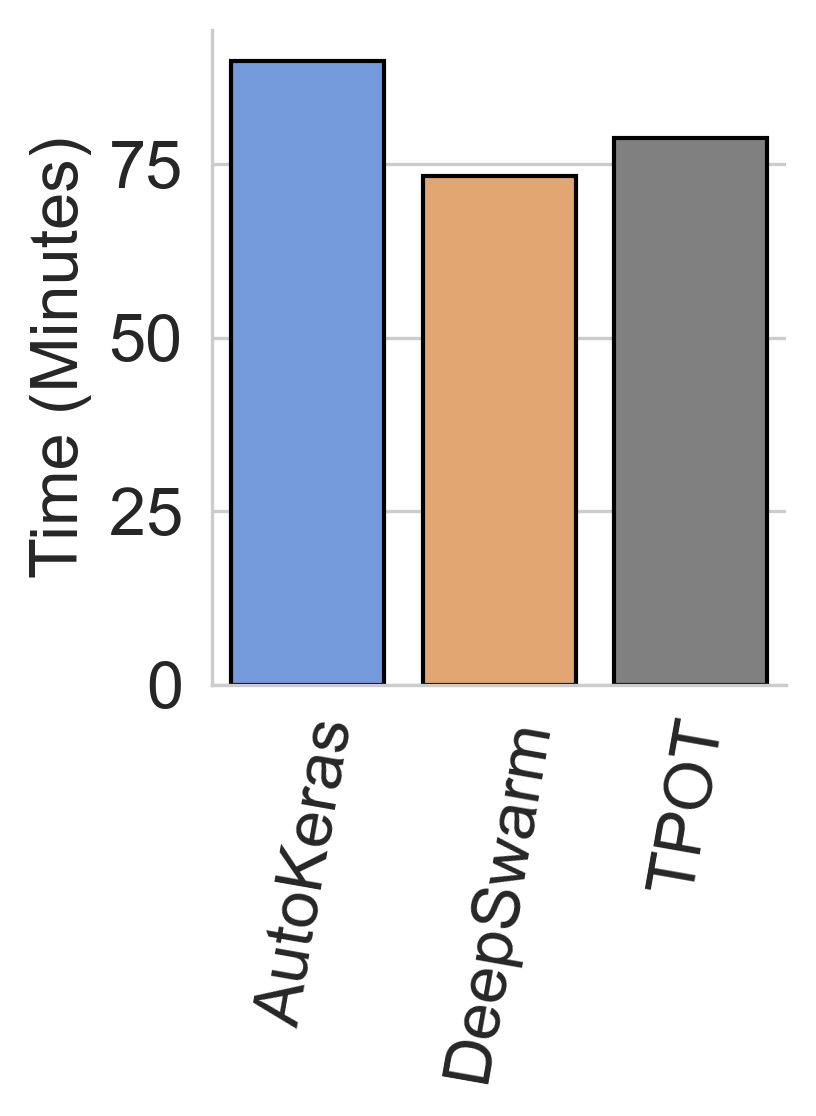

In [19]:
def calc_time(folder, seq, task = 'autoML search'):
    folds = ['outputs/autokeras/binary_classification/', 'outputs/deepswarm/binary_classification/', 'outputs/tpot/binary_classification/']
    time = pd.DataFrame()
    file_name = 'runtime_statistics.txt'
    for fold in folds:
        name = fold.split('outputs/')[1].split('/binary_classification')[0]
        name = name.replace('deepswarm', 'DeepSwarm')
        name = name.replace('autokeras', 'AutoKeras')
        name = name.replace('tpot', 'TPOT')
        df = pd.read_csv(folder + seq + fold + file_name, sep = '\t', header = None)
        vals = df.values
        for i in range(len(vals)):
            val = vals[i]
            if task not in val[0]:
                continue
            new = val[0].split("Elapsed time for autoML search : ")[1].split(" minutes")[0]
            new = float(new)
            time[name] = [new]
    return(time)

def plot_time(mcc, savepath, yaxis):
    plt.figure(figsize=(3,4), dpi=300)
    my_pal = {"AutoKeras": "cornflowerblue", "DeepSwarm": "sandybrown", "TPOT": "grey"}
    ax = sns.barplot(data=mcc, edgecolor='black', alpha = 1, linewidth = 1, palette = my_pal)
    plt.xlabel('')
    plt.xticks(rotation = 80)
    plt.ylabel(yaxis)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tight_layout()
    plt.savefig(savepath)
    plt.show()

data_path = '../exemplars/'
seq_type = 'toeholds/'
df = calc_time(data_path, seq_type, task = 'autoML search') 
plot_time(df, '../clean_figs/toeholds_time.svg', 'Time (Minutes)')

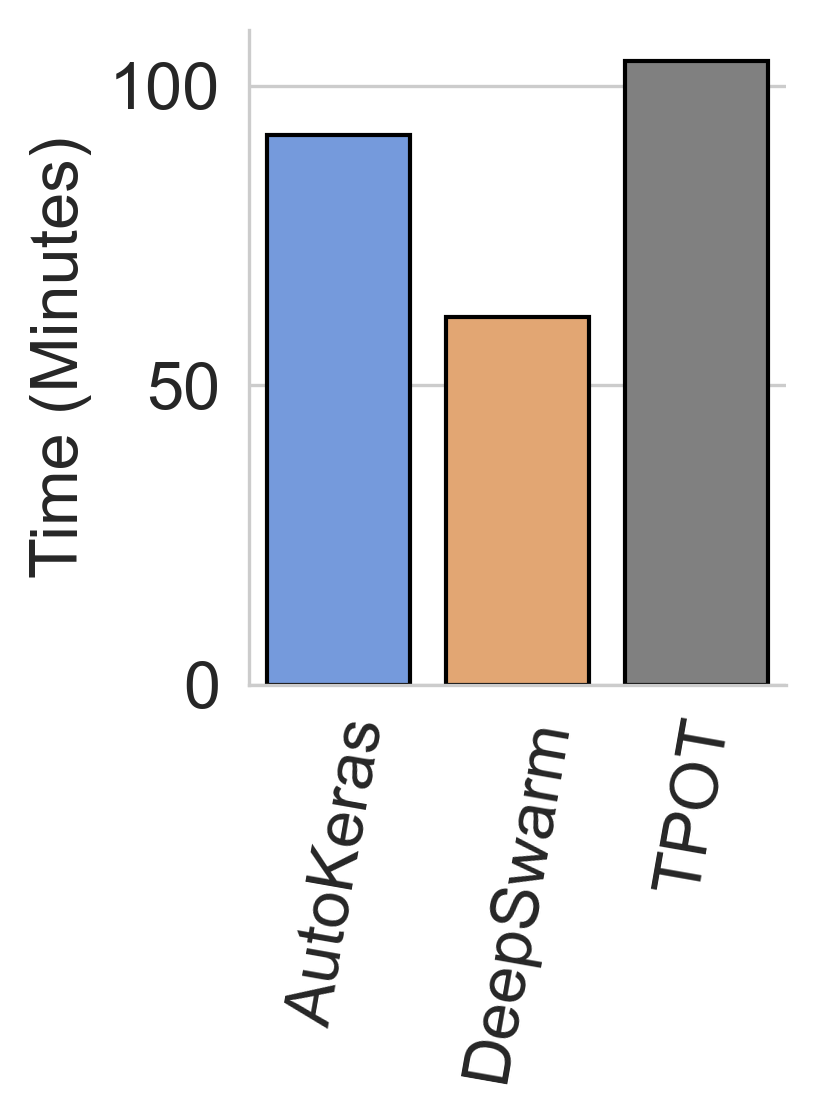

In [20]:
data_path = '../exemplars/'
seq_type = 'peptides/'
df = calc_time(data_path, seq_type, task= 'autoML search') 
plot_time(df, '../clean_figs/peptides_time.svg', 'Time (Minutes)')

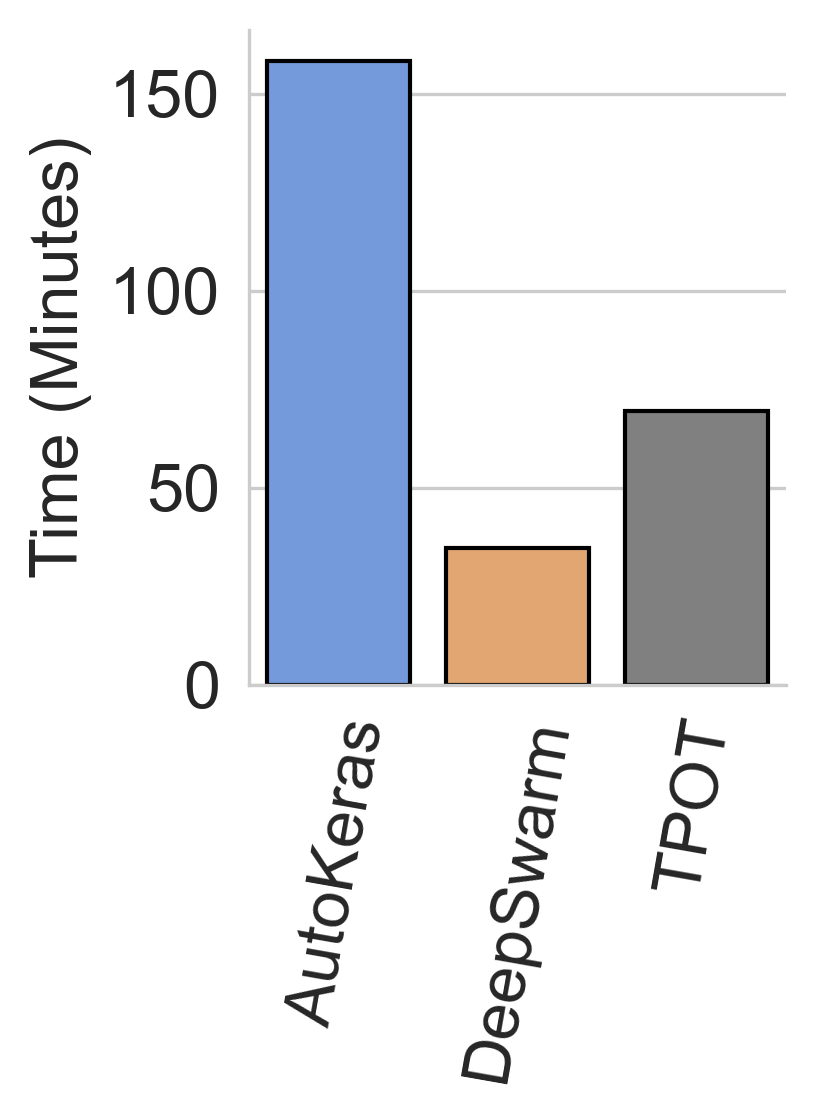

In [21]:
data_path = '../exemplars/'
seq_type = 'rbs/'
df = calc_time(data_path, seq_type) 
plot_time(df, '../clean_figs/rbs_time.svg', 'Time (Minutes)')

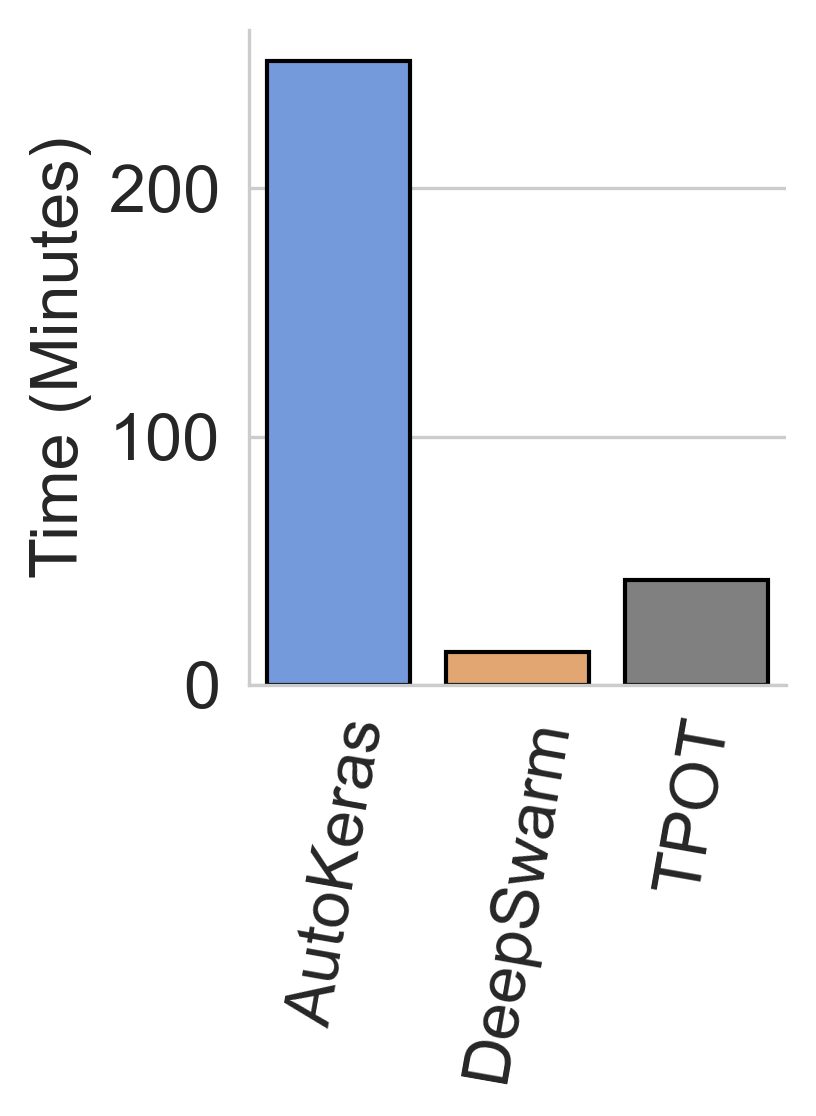

In [22]:
seq_type = 'glycans_immunogenic/'
df = calc_time(data_path, seq_type) 
plot_time(df, '../clean_figs/glycans_time.svg', 'Time (Minutes)')

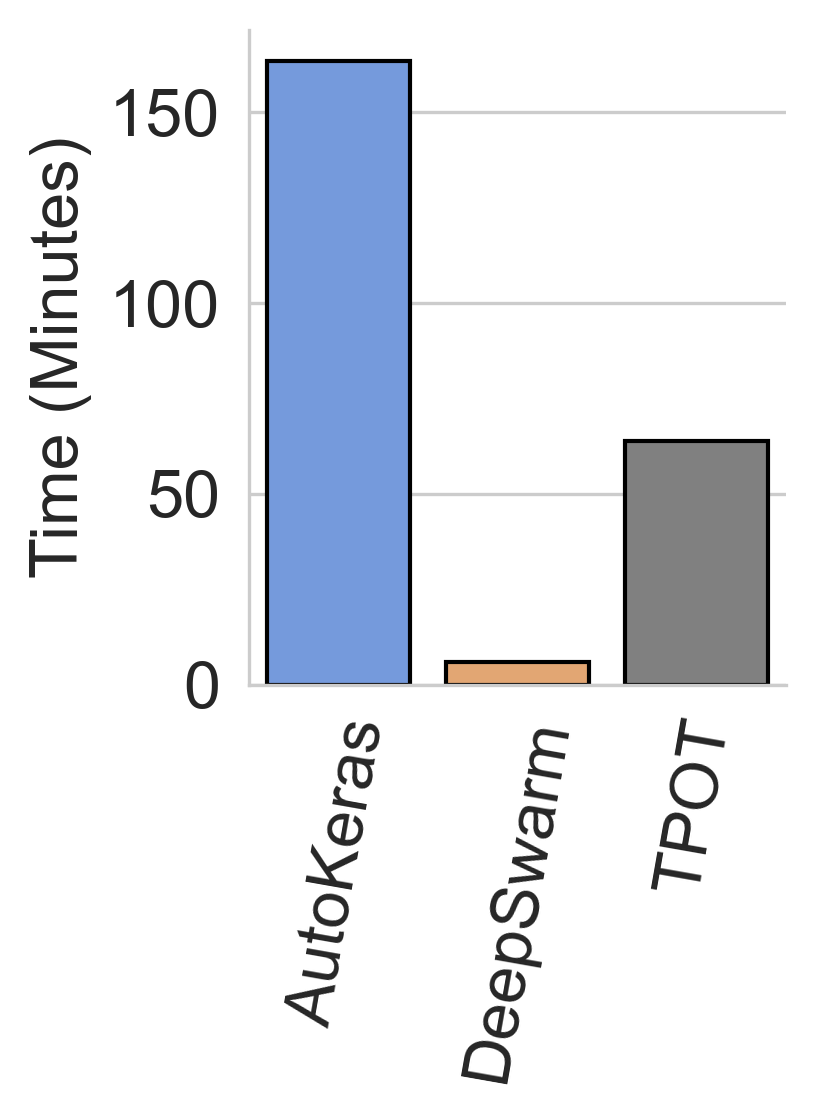

In [23]:
seq_type = 'large_synthetic_nucleic_acids/'
df = calc_time(data_path, seq_type) 
plot_time(df, '../clean_figs/large_synthetic_nucleic_acids_time.svg', 'Time (Minutes)')

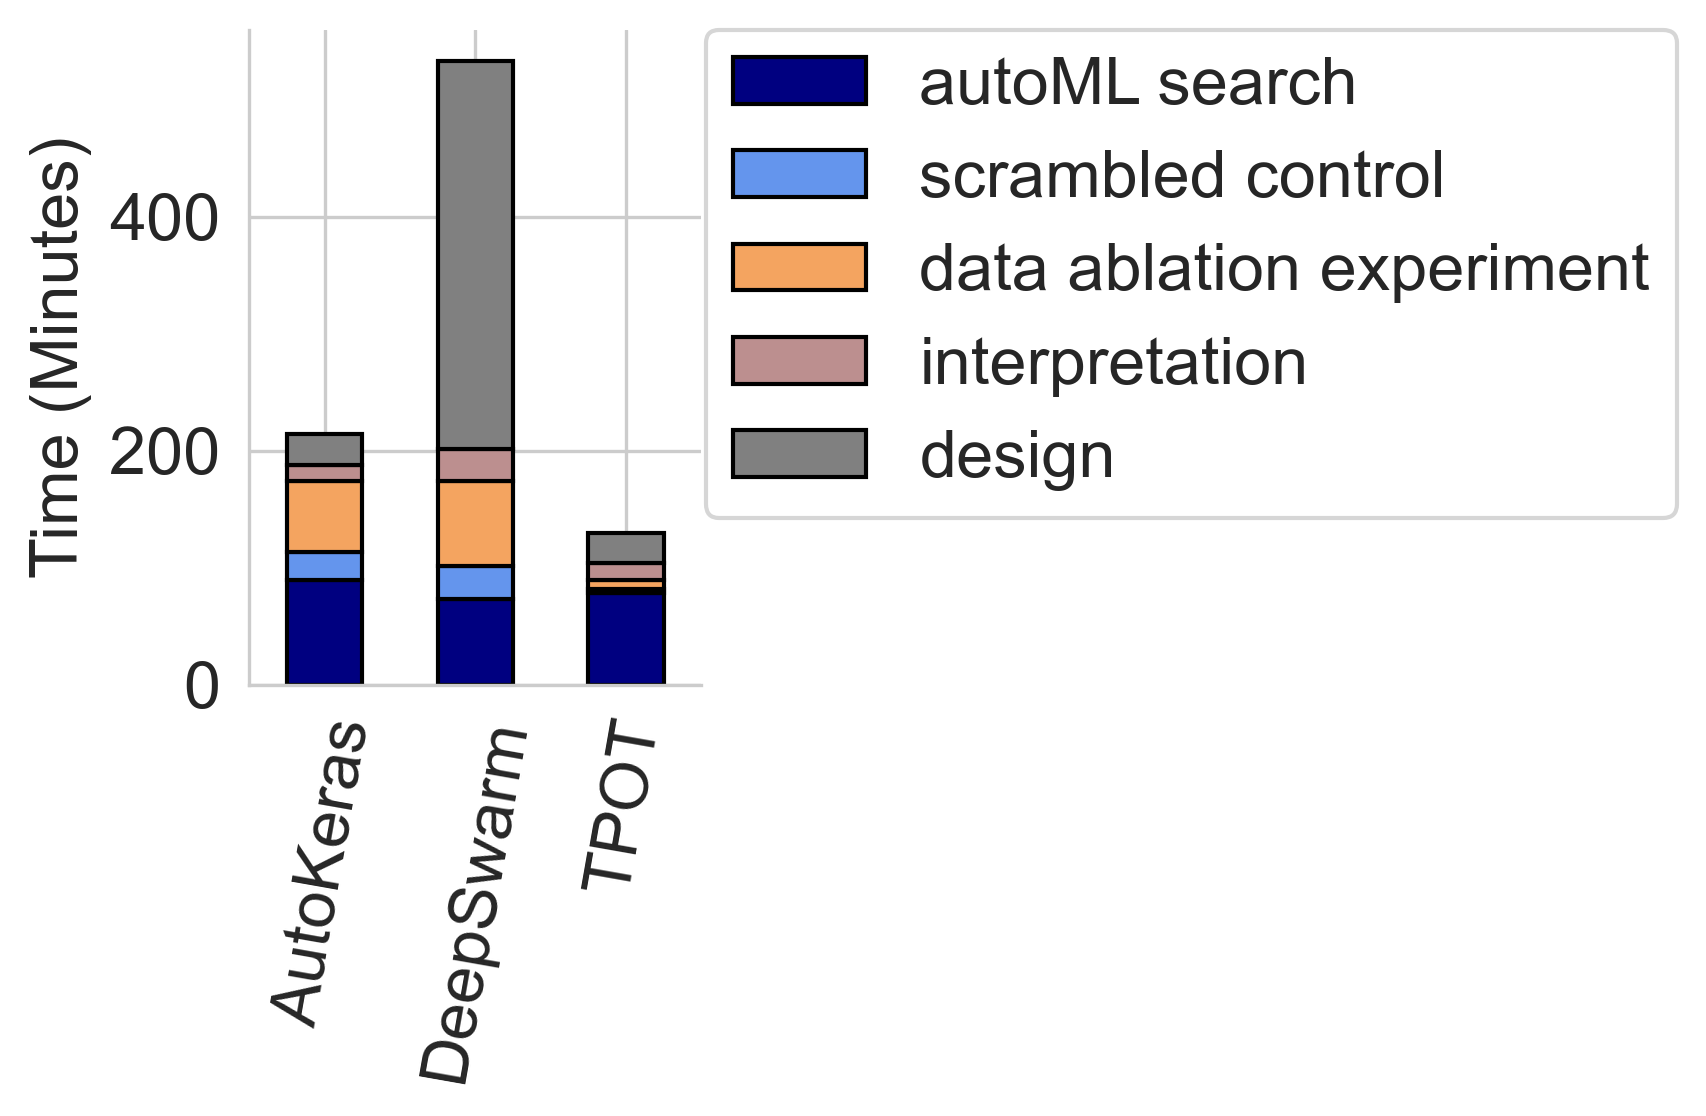

In [24]:
def calc_time(folder, seq, task = 'autoML search'):
    folds = ['outputs/autokeras/binary_classification/', 'outputs/deepswarm/binary_classification/', 'outputs/tpot/binary_classification/']
    time = pd.DataFrame()
    file_name = 'runtime_statistics.txt'
    for fold in folds:
        name = fold.split('outputs/')[1].split('/binary_classification')[0]
        name = name.replace('deepswarm', 'DeepSwarm')
        name = name.replace('autokeras', 'AutoKeras')
        name = name.replace('tpot', 'TPOT')
        df = pd.read_csv(folder + seq + fold + file_name, sep = '\t', header = None)
        vals = df.values
        for i in range(len(vals)):
            val = vals[i]
            if task not in val[0]:
                continue
            new = val[0].split("Elapsed time for " + task + " : ")[1].split(" minutes")[0]
            new = float(new)
            time[name] = [new]
    return(time)

def plot_time(mcc, savepath, yaxis):
    fig, ax = plt.subplots(figsize=(6,4), dpi=300)
    colors = ['navy', 'cornflowerblue', 'sandybrown', 'rosybrown', 'grey']
    mcc.plot(kind='bar', stacked=True, color = colors, ax = ax, edgecolor='black', alpha = 1, linewidth = 1)
    plt.xlabel('')
    plt.xticks(rotation = 80)
    plt.ylabel(yaxis)
    ax.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tight_layout()
    plt.savefig(savepath)
    plt.show()

data_path = '../exemplars/'
seq_type = 'toeholds/'
tasks = ['autoML search', 'scrambled control', 'data ablation experiment', 'interpretation', 'design'] # , 'total'
taskdf = pd.DataFrame()
for task in tasks:
    df = calc_time(data_path, seq_type, task = task) 
    df['task'] = task
    taskdf = taskdf.append(df)
taskdf = taskdf.set_index('task')
taskdf = taskdf.transpose()
plot_time(taskdf, '../clean_figs/breakdown_toeholds_time.svg', 'Time (Minutes)')

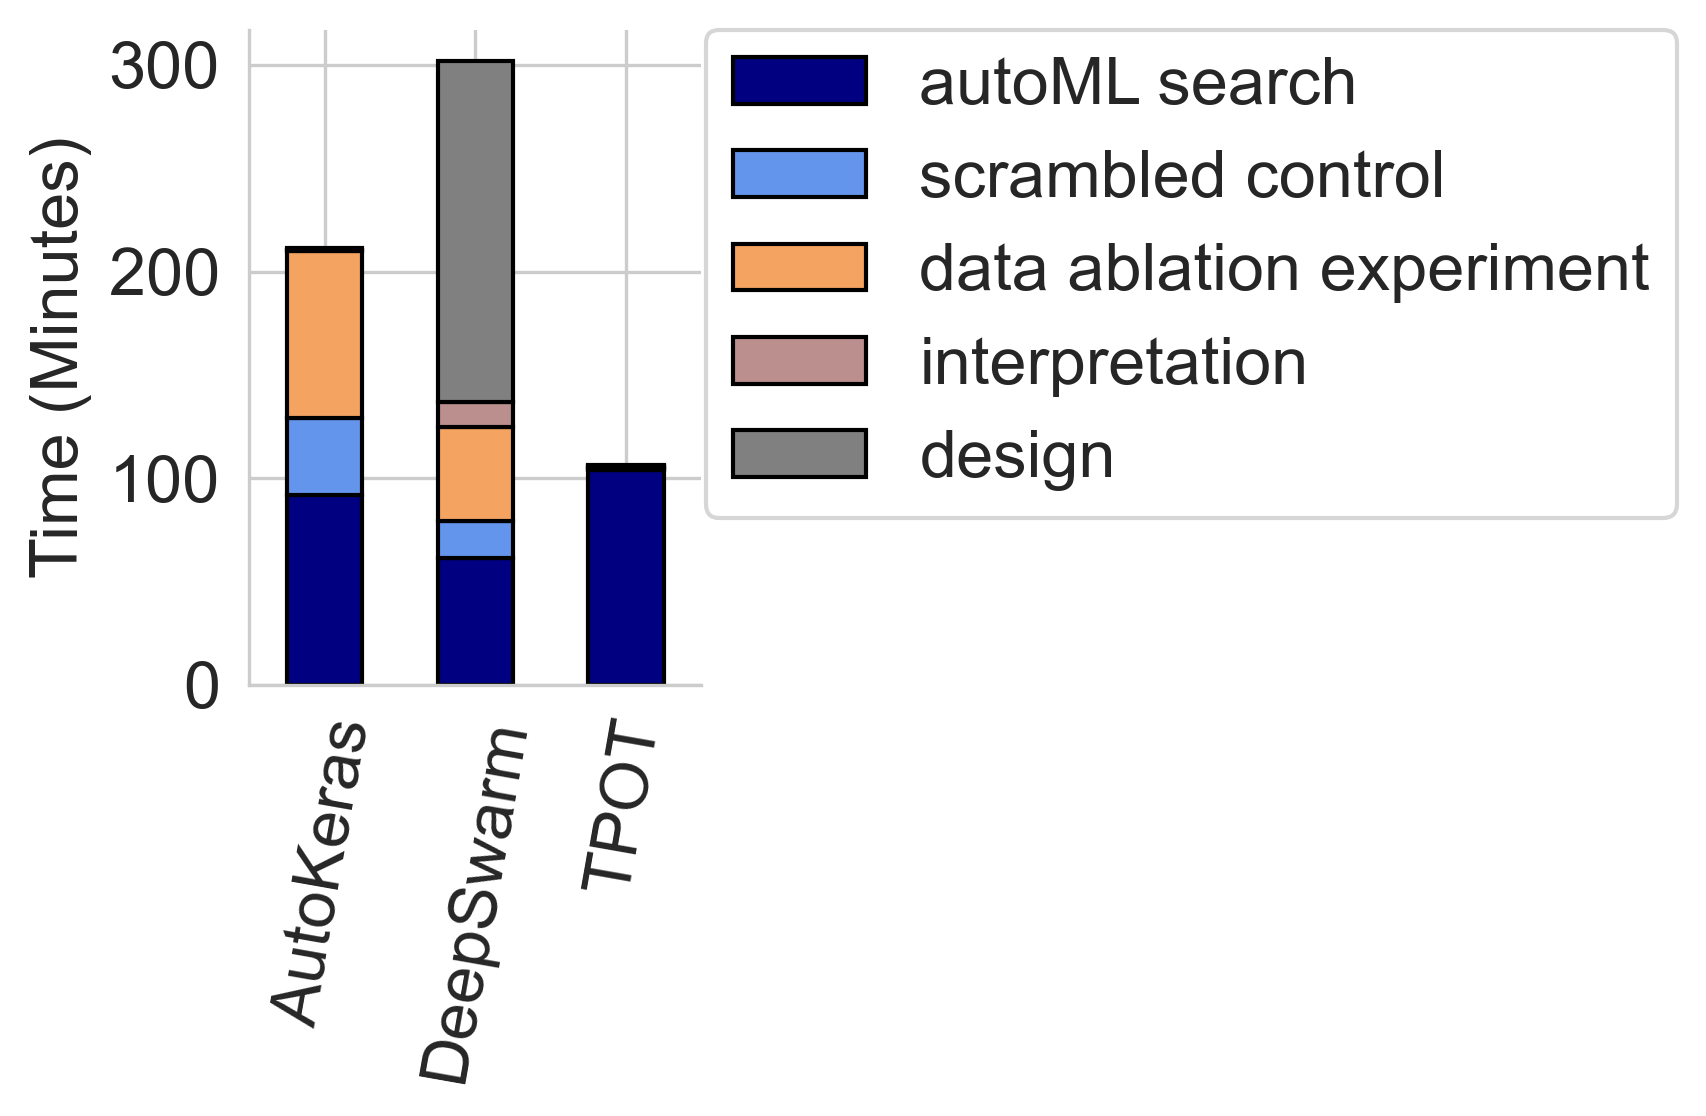

In [25]:
data_path = '../exemplars/'
seq_type = 'peptides/'
tasks = ['autoML search', 'scrambled control', 'data ablation experiment', 'interpretation', 'design'] # , 'total'
taskdf = pd.DataFrame()
for task in tasks:
    df = calc_time(data_path, seq_type, task = task) 
    df['task'] = task
    taskdf = taskdf.append(df)
taskdf = taskdf.set_index('task')
taskdf = taskdf.transpose()
plot_time(taskdf, '../clean_figs/breakdown_peptides_time.svg', 'Time (Minutes)')

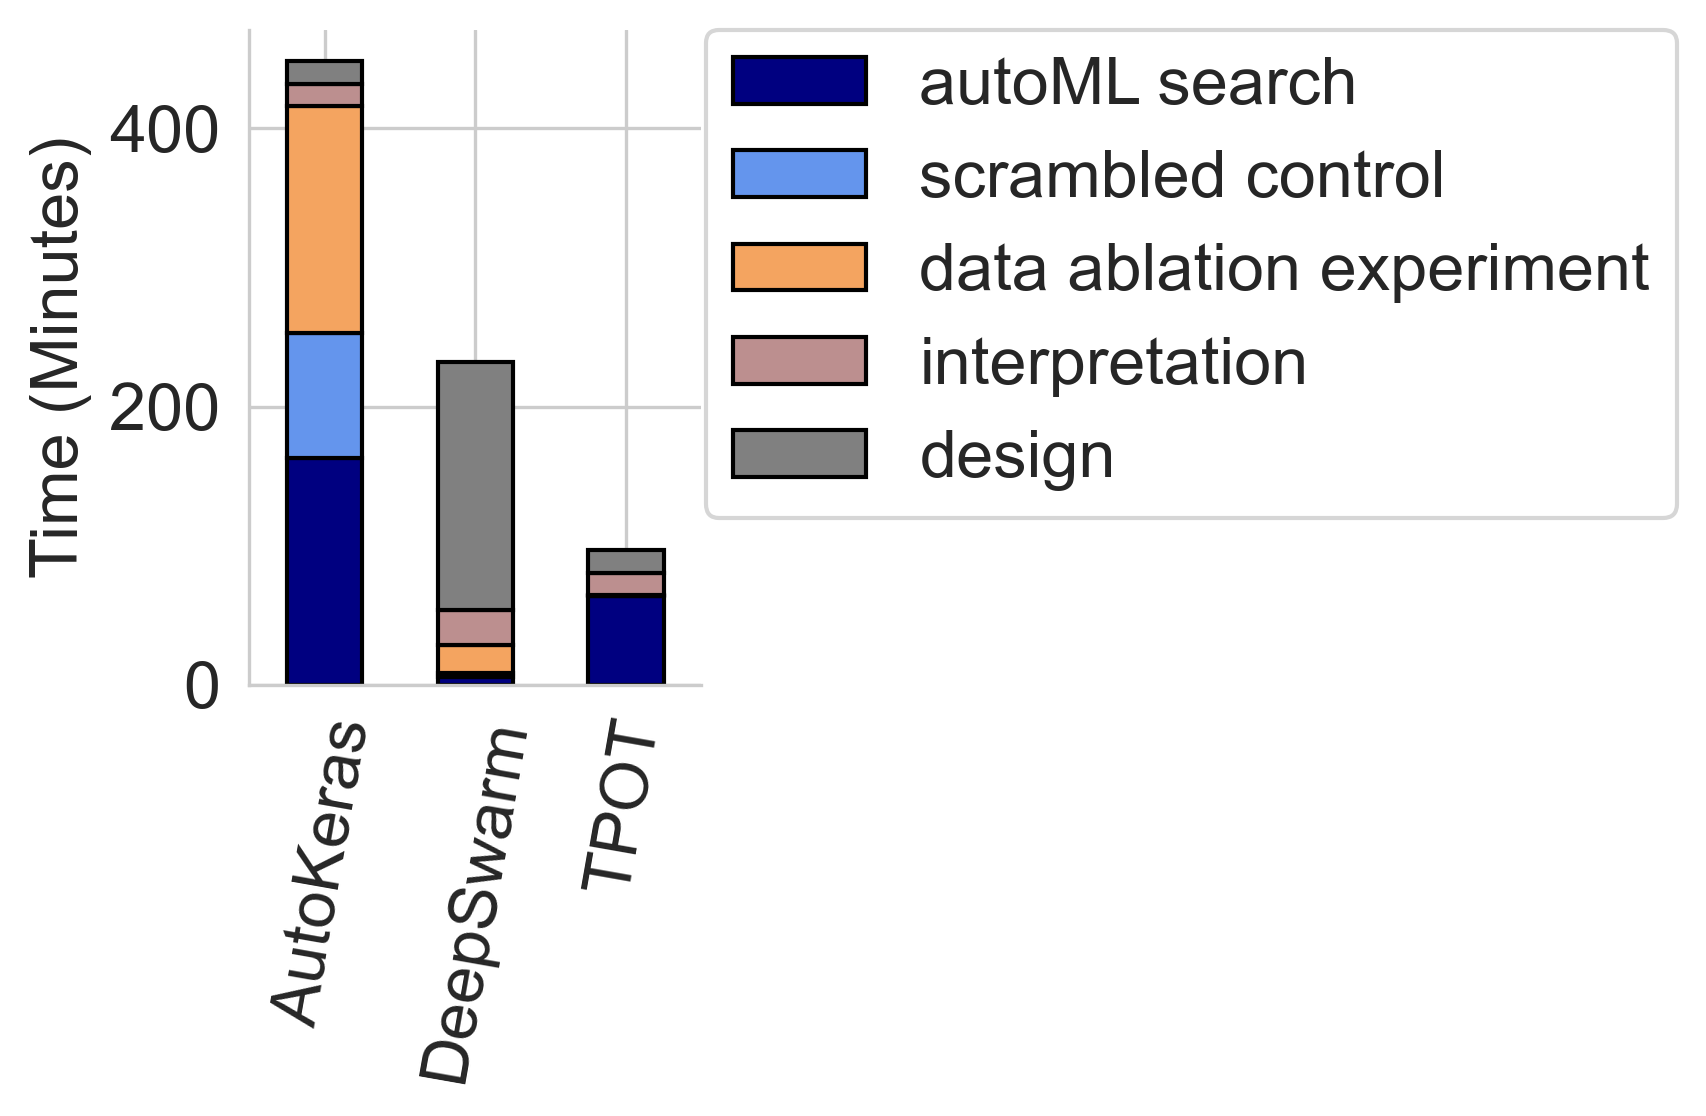

In [26]:
data_path = '../exemplars/'
seq_type = 'large_synthetic_nucleic_acids/'
tasks = ['autoML search', 'scrambled control', 'data ablation experiment', 'interpretation', 'design'] # , 'total'
taskdf = pd.DataFrame()
for task in tasks:
    df = calc_time(data_path, seq_type, task = task) 
    df['task'] = task
    taskdf = taskdf.append(df)
taskdf = taskdf.set_index('task')
taskdf = taskdf.transpose()
plot_time(taskdf, '../clean_figs/breakdown_large_synthetic_nucleic_acids_time.svg', 'Time (Minutes)')

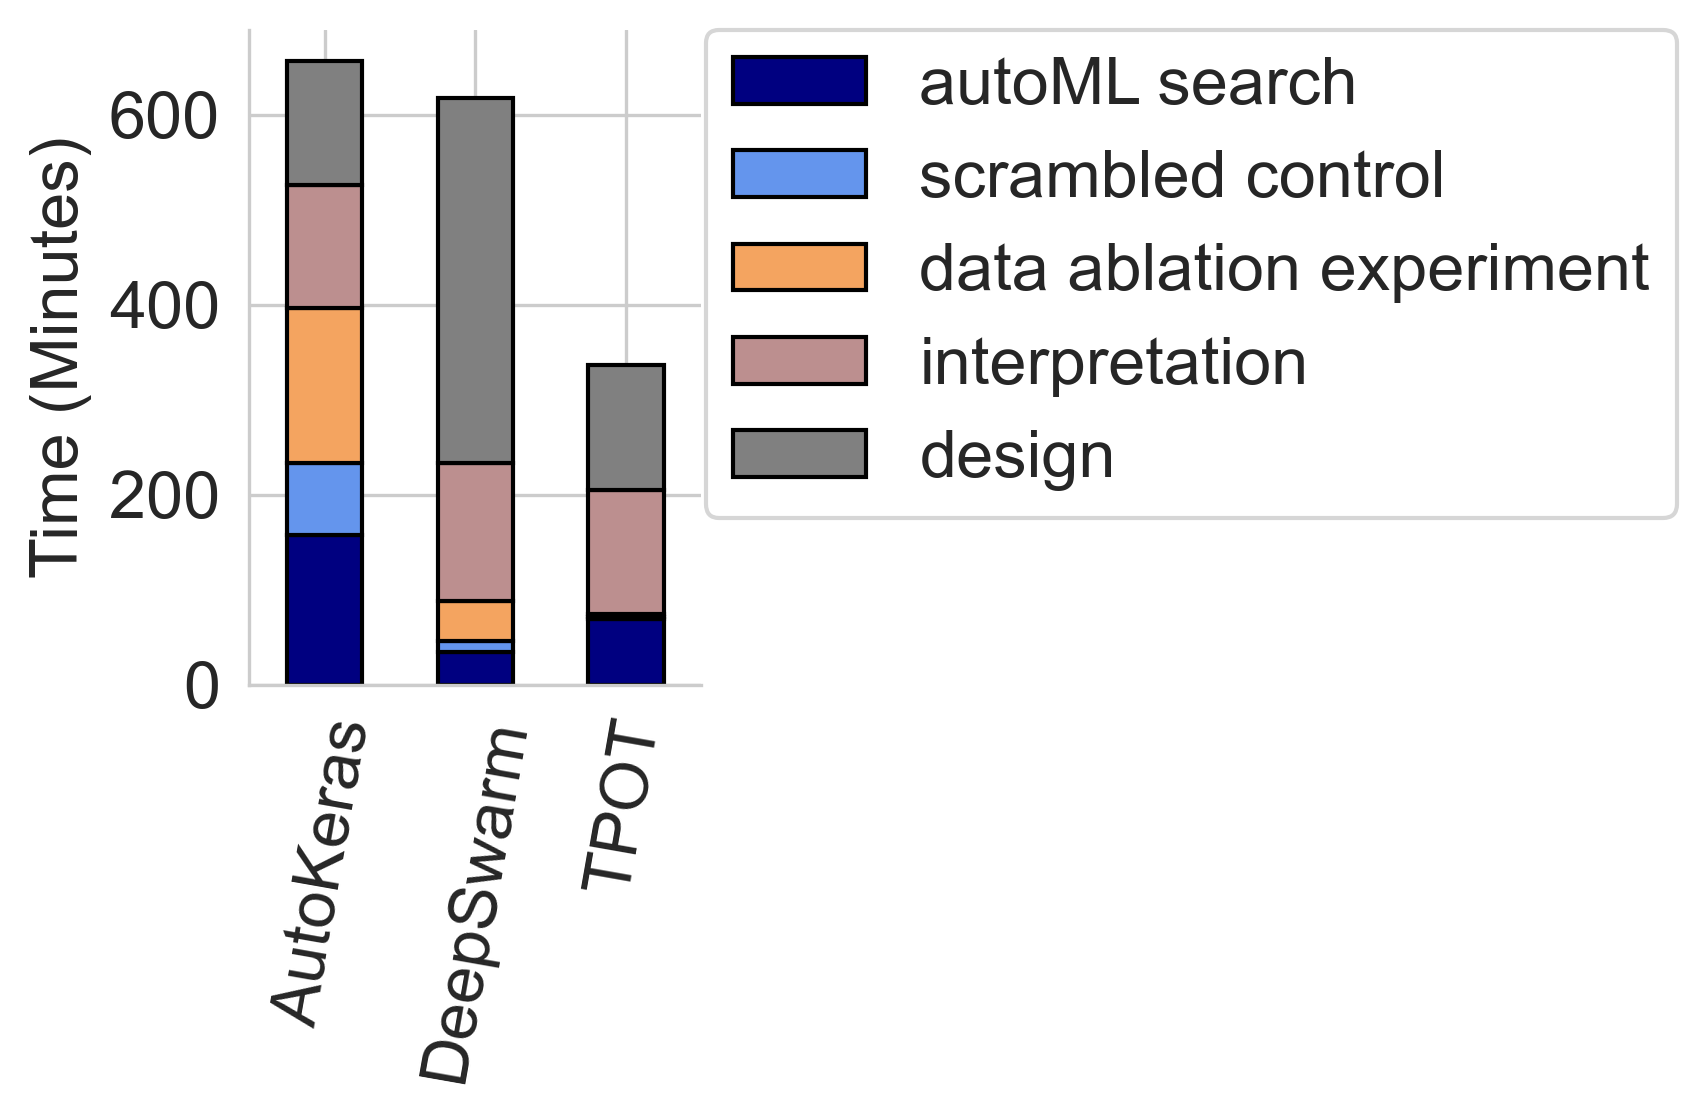

In [27]:
data_path = '../exemplars/'
seq_type = 'rbs/'
tasks = ['autoML search', 'scrambled control', 'data ablation experiment', 'interpretation', 'design'] # , 'total'
taskdf = pd.DataFrame()
for task in tasks:
    df = calc_time(data_path, seq_type, task = task) 
    df['task'] = task
    taskdf = taskdf.append(df)
taskdf = taskdf.set_index('task')
taskdf = taskdf.transpose()
plot_time(taskdf, '../clean_figs/breakdown_rbs_time.svg', 'Time (Minutes)')

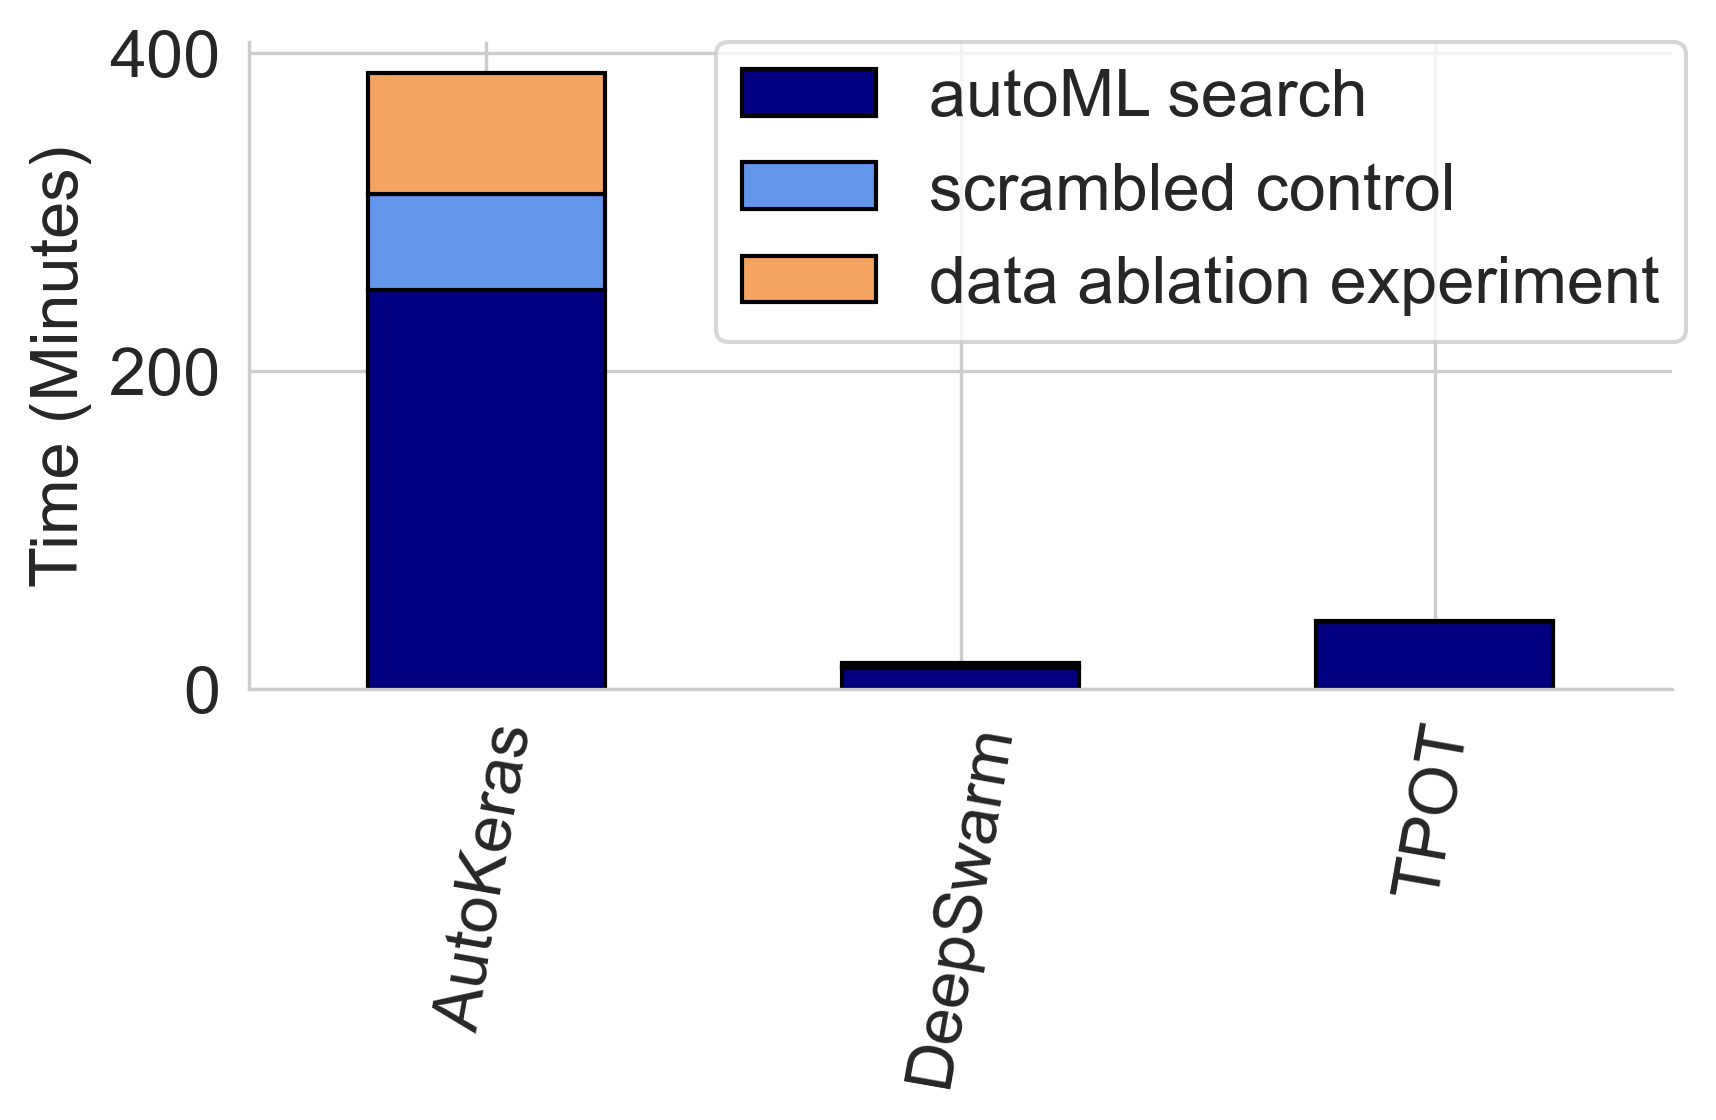

In [28]:
data_path = '../exemplars/'
seq_type = 'glycans_immunogenic/'
tasks = ['autoML search', 'scrambled control', 'data ablation experiment', 'interpretation', 'design'] # , 'total'
taskdf = pd.DataFrame()
for task in tasks:
    df = calc_time(data_path, seq_type, task = task) 
    df['task'] = task
    taskdf = taskdf.append(df)
taskdf = taskdf.set_index('task')
taskdf = taskdf.transpose()
plot_time(taskdf, '../clean_figs/breakdown_glycan_domain_time.svg', 'Time (Minutes)')

# Complementation Figures

Running statistics now...
AutoKeras
Ttest_indResult(statistic=1.858554099771427, pvalue=0.1366289866274645)
DeepSwarm
Ttest_indResult(statistic=8.710353174612878, pvalue=0.0009567072883815491)
TPOT
Ttest_indResult(statistic=17.872971235277642, pvalue=5.7590996067672986e-05)


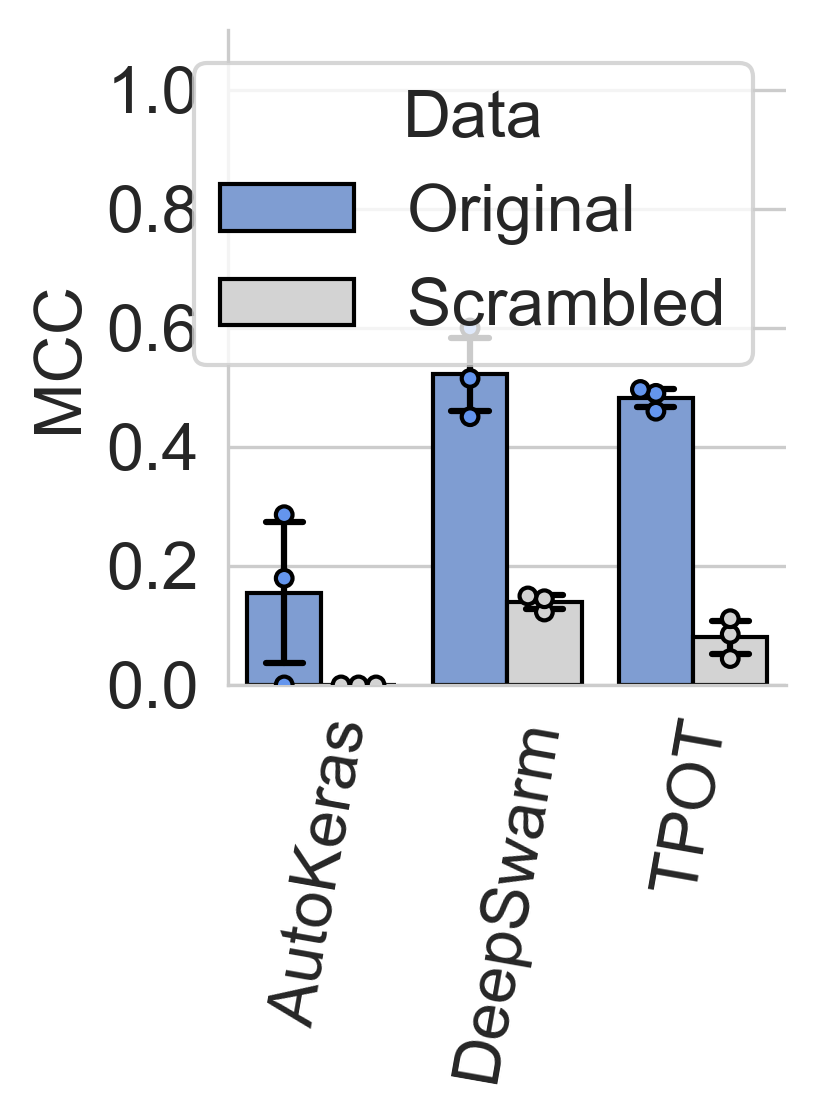

In [29]:
# load in toeholds
data_path = '../exemplars/augmentation_tests/'
seq_type = 'toeholds_small_no_aug/'
df = calc_mcc(data_path, seq_type, 'all values of MCC Class 0')
plot_barplot(df, '../clean_figs/no_aug_small_toeholds_mcc.svg', 'MCC') 

In [30]:
def reshape_aug_type(df):
    new = pd.DataFrame()
    new['model_type'] = []
    new
    index = 0
    for name, col in df.iteritems():
        if 'scr' in name or 'augtype' in name:
            continue
        new_pd = pd.DataFrame(col)
        new_pd.columns = ['values']
        new_pd['scr'] = list(df['scr'])
        new_pd['model_type'] = [name] * len(new_pd)
        new_pd['augtype'] = list(df['augtype'])
        new = pd.concat([new, new_pd])
        index = index + 1
    new.columns = ['Model', 'MCC', 'Data', 'Augmentation']
    return(new)

def plot_barplot_aug_type(mcc, savepath, yaxis):
    mcc = reshape_aug_type(mcc)  
    plt.figure(figsize=(3,4), dpi=200)
    my_pal = {"Original": "cornflowerblue", "Scrambled": "lightgrey"}
    ax = sns.barplot(x = 'Augmentation', y = 'MCC', hue = 'Data', data=mcc, edgecolor='black', alpha = 1, linewidth = 1, palette = my_pal, ci = 'sd', errcolor = 'black', errwidth = 1.5, capsize = 0.2, saturation = 0.6)
    sns.swarmplot(x = 'Augmentation', y = 'MCC', hue = 'Data', data=mcc, dodge = True, edgecolor='black', alpha = 1, linewidth = 1, s = 4, palette = my_pal)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[2:4], labels[2:4], title='Data')

    plt.xlabel('')
    plt.xticks(rotation = 80)
    plt.ylabel(yaxis)
    plt.ylim([0, 1.1])
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tight_layout()
    plt.savefig(savepath)
    plt.show()

Running statistics now...
AutoKeras
Ttest_indResult(statistic=1.858554099771427, pvalue=0.1366289866274645)
DeepSwarm
Ttest_indResult(statistic=8.710353174612878, pvalue=0.0009567072883815491)
TPOT
Ttest_indResult(statistic=17.872971235277642, pvalue=5.7590996067672986e-05)
Running statistics now...
AutoKeras
Ttest_indResult(statistic=58.22873937243417, pvalue=5.208926853802493e-07)
DeepSwarm
Ttest_indResult(statistic=15.72212559735207, pvalue=9.560553000688085e-05)
TPOT
Ttest_indResult(statistic=14.9166114450979, pvalue=0.00011764380699695076)
Running statistics now...
AutoKeras
Ttest_indResult(statistic=6.674476002405337, pvalue=0.00261898452207873)
DeepSwarm
Ttest_indResult(statistic=13.755113972565244, pvalue=0.000161861963671411)
TPOT
Ttest_indResult(statistic=22.246528207007685, pvalue=2.416988801544016e-05)
Running statistics now...
AutoKeras
Ttest_indResult(statistic=27.288531879574652, pvalue=1.072389318975872e-05)
DeepSwarm
Ttest_indResult(statistic=6.416585358660312, pvalue=

/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


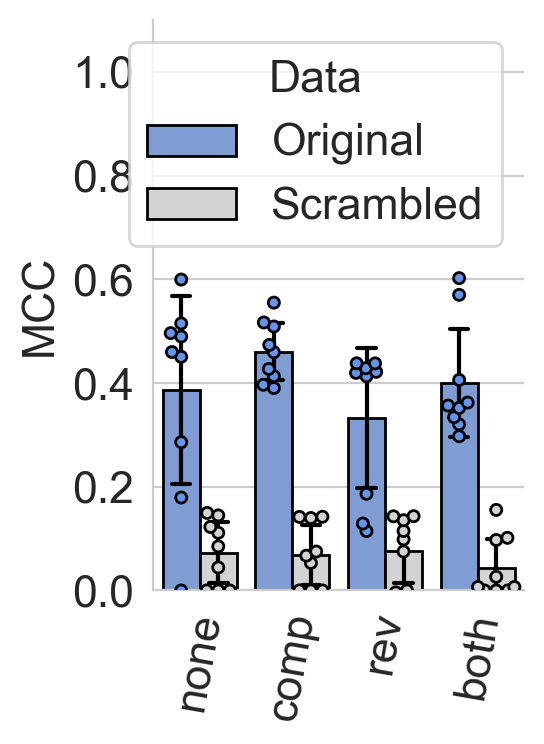

In [31]:
# load in toeholds
data_path = '../exemplars/augmentation_tests/'

for seq_type in ['toeholds_small_no_aug/', 'toeholds_small_comp_aug/', 'toeholds_small_rev_aug/', 'toeholds_small_both_aug/']:
    df = calc_mcc(data_path, seq_type, 'all values of MCC Class 0')
    if seq_type == 'toeholds_small_no_aug/':
        wholedf = df
        wholedf['augtype'] = ['none'] * len(df)
    elif seq_type == 'toeholds_small_comp_aug/':
        df['augtype'] = ['comp'] * len(df)
        wholedf = pd.concat([wholedf, df])
    elif seq_type == 'toeholds_small_rev_aug/':
        df['augtype'] = ['rev'] * len(df)
        wholedf = pd.concat([wholedf, df])
    elif seq_type == 'toeholds_small_both_aug/':
        df['augtype'] = ['both'] * len(df)
        wholedf = pd.concat([wholedf, df])
plot_barplot_aug_type(wholedf, '../clean_figs/comp_aug_test_toeholds_mcc.svg', 'MCC') 

Running statistics now...
AutoKeras
Ttest_indResult(statistic=62.736404720926515, pvalue=3.8666733155168e-07)
DeepSwarm
Ttest_indResult(statistic=23.5347432600241, pvalue=1.9324316139038074e-05)
TPOT
Ttest_indResult(statistic=48.14498906937784, pvalue=1.1135220735045895e-06)
Running statistics now...
AutoKeras
Ttest_indResult(statistic=20.39209509255039, pvalue=3.414862208554202e-05)
DeepSwarm
Ttest_indResult(statistic=23.170201317664503, pvalue=2.0561658630758942e-05)
TPOT
Ttest_indResult(statistic=32.283624384939095, pvalue=5.488443875391458e-06)
Running statistics now...
AutoKeras
Ttest_indResult(statistic=40.248463134210645, pvalue=2.2770306009943968e-06)
DeepSwarm
Ttest_indResult(statistic=39.94256286014742, pvalue=2.3474424251418092e-06)
TPOT
Ttest_indResult(statistic=46.50615654891758, pvalue=1.278709738486305e-06)
Running statistics now...
AutoKeras
Ttest_indResult(statistic=38.70952264465189, pvalue=2.660420164284521e-06)
DeepSwarm
Ttest_indResult(statistic=21.396995112851798,

/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


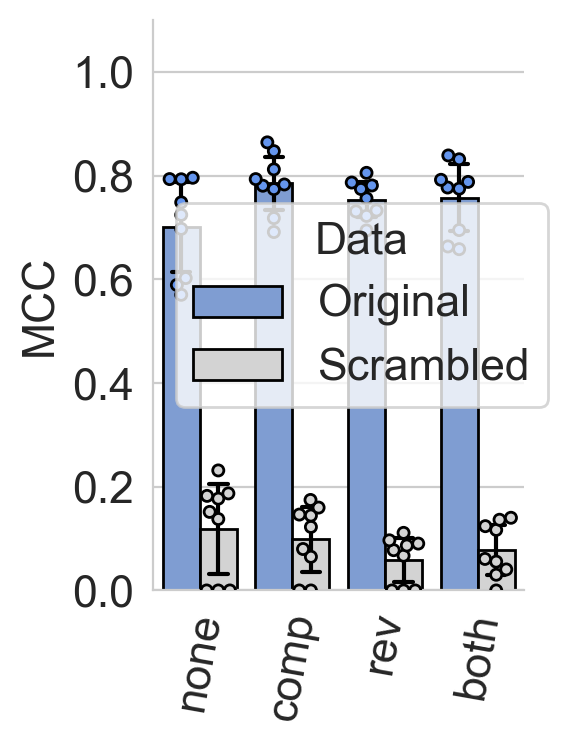

In [32]:
# load in rbs
data_path = '../exemplars/augmentation_tests/'

for seq_type in ['rbs_small_no_aug/', 'rbs_small_comp_aug/', 'rbs_small_rev_aug/', 'rbs_small_both_aug/']:
    try:
        df = calc_mcc(data_path, seq_type, 'all values of MCC Class 0')
    except Exception as e:
        print(e)
        continue
    if seq_type == 'rbs_small_no_aug/':
        wholedf = df
        wholedf['augtype'] = ['none'] * len(df)
    elif seq_type == 'rbs_small_comp_aug/':
        df['augtype'] = ['comp'] * len(df)
        wholedf = pd.concat([wholedf, df])
    elif seq_type == 'rbs_small_rev_aug/':
        df['augtype'] = ['rev'] * len(df)
        wholedf = pd.concat([wholedf, df])
    elif seq_type == 'rbs_small_both_aug/':
        df['augtype'] = ['both'] * len(df)
        wholedf = pd.concat([wholedf, df])
wholedf
plot_barplot_aug_type(wholedf, '../clean_figs/comp_aug_rbs_mcc.svg', 'MCC') 

In [33]:
def plot_scatter_plot_aug_type(mcc, savepath, yaxis):
    mcc = reshape_aug_type(mcc)  
    plt.figure(figsize=(3,4), dpi=200)
    
    font = {'size'   : 24}
    matplotlib.rc('font', **font)
    my_pal = {"Original": "cornflowerblue", "Scrambled": "lightgrey"}
    
    ax = sns.catplot(x = 'Augmentation', y = 'MCC', hue = 'Data', kind = 'swarm', col = 'Model', dodge = True, data=mcc, edgecolor='black', alpha = 1, linewidth = 1, s = 10, palette = my_pal, legend = False)
    plt.legend(loc='upper right')
    
    plt.xlabel('')
    plt.xticks(rotation = 0)
    plt.ylabel(yaxis)
    plt.ylim([0, 1.1])
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.tight_layout()
    plt.savefig(savepath)
    plt.show()
    
def calc_augmentation_stats(df):
    # compare original to each other at every point
    print('Comparing Original Model to Original Model...')
    print('\n')
    orig = df[df['scr'] == 'Original']
    
    none = orig[orig['augtype']=='none']
    rev = orig[orig['augtype']=='rev']
    comp = orig[orig['augtype']=='comp']
    both = orig[orig['augtype']=='both']
    
    for mod in ['AutoKeras', 'TPOT', 'DeepSwarm']:
        print('Comparing ' + mod)
        print('Rev compared to none')
        print(sp.ttest_ind(list(rev[mod]), list(none[mod])))
        print('Comp compared to none')
        print(sp.ttest_ind(list(comp[mod]), list(none[mod])))
        print('Both compared to none')
        print(sp.ttest_ind(list(both[mod]), list(none[mod])))
        print('Rev compared to comp')
        print(sp.ttest_ind(list(rev[mod]), list(comp[mod])))
        print('Both compared to comp')
        print(sp.ttest_ind(list(both[mod]), list(comp[mod])))
        print('Both compared to rev')
        print(sp.ttest_ind(list(both[mod]), list(rev[mod])))
        print('\n')


<Figure size 600x800 with 0 Axes>

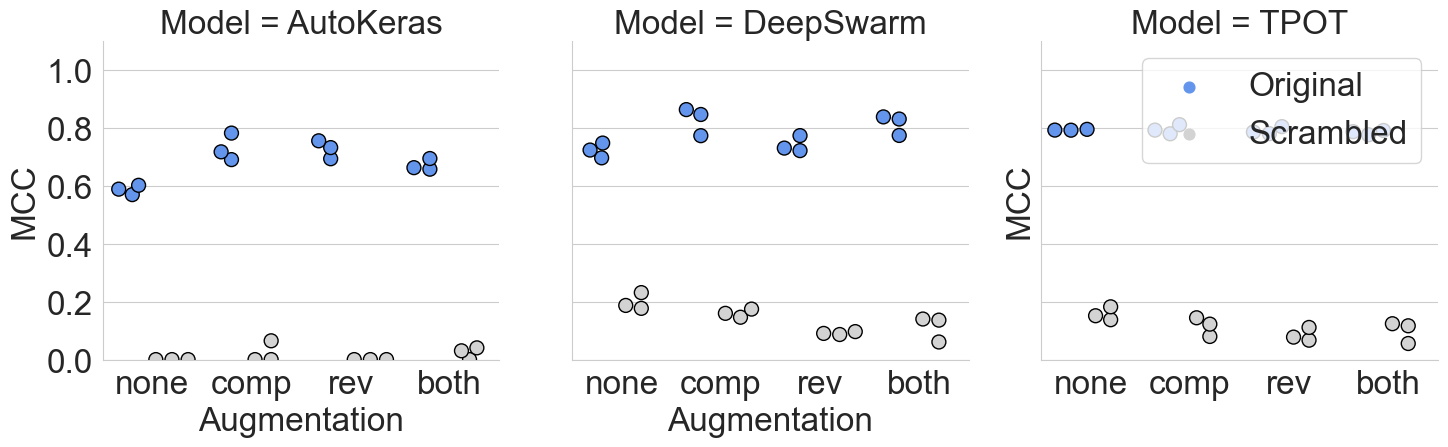

<Figure size 600x800 with 0 Axes>

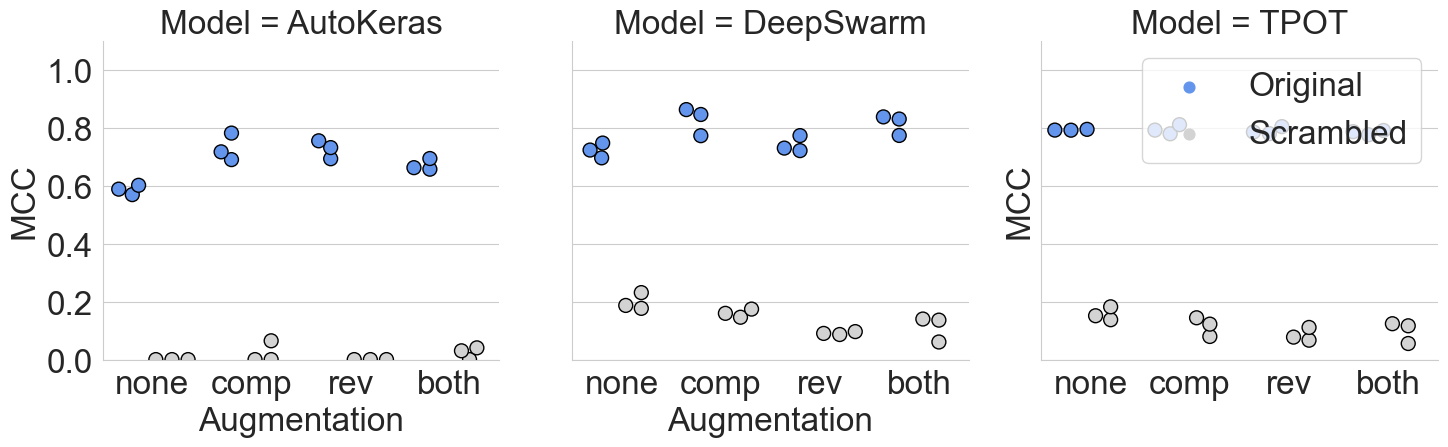

Comparing Original Model to Original Model...


Comparing AutoKeras
Rev compared to none
Ttest_indResult(statistic=6.89923621736789, pvalue=0.0023144267977042933)
Comp compared to none
Ttest_indResult(statistic=4.985673601672643, pvalue=0.007566824448366186)
Both compared to none
Ttest_indResult(statistic=5.724270751326177, pvalue=0.004610000996813703)
Rev compared to comp
Ttest_indResult(statistic=-0.0922195946646462, pvalue=0.9309575743782836)
Both compared to comp
Ttest_indResult(statistic=-1.9820113944366826, pvalue=0.11852851410809805)
Both compared to rev
Ttest_indResult(statistic=-2.591844703561184, pvalue=0.06056605131621422)


Comparing TPOT
Rev compared to none
Ttest_indResult(statistic=-0.4119610831954927, pvalue=0.7014878588136394)
Comp compared to none
Ttest_indResult(statistic=0.13311218290746588, pvalue=0.9005326873128856)
Both compared to none
Ttest_indResult(statistic=-1.8588222864239667, pvalue=0.13658656671174935)
Rev compared to comp
Ttest_indResult(statistic=-0.364

In [34]:
plot_scatter_plot_aug_type(wholedf, '../clean_figs/comp_aug_rbs_mcc.png', 'MCC') 
plot_scatter_plot_aug_type(wholedf, '../clean_figs/comp_aug_rbs_mcc.svg', 'MCC') 
calc_augmentation_stats(wholedf)

<Figure size 600x800 with 0 Axes>

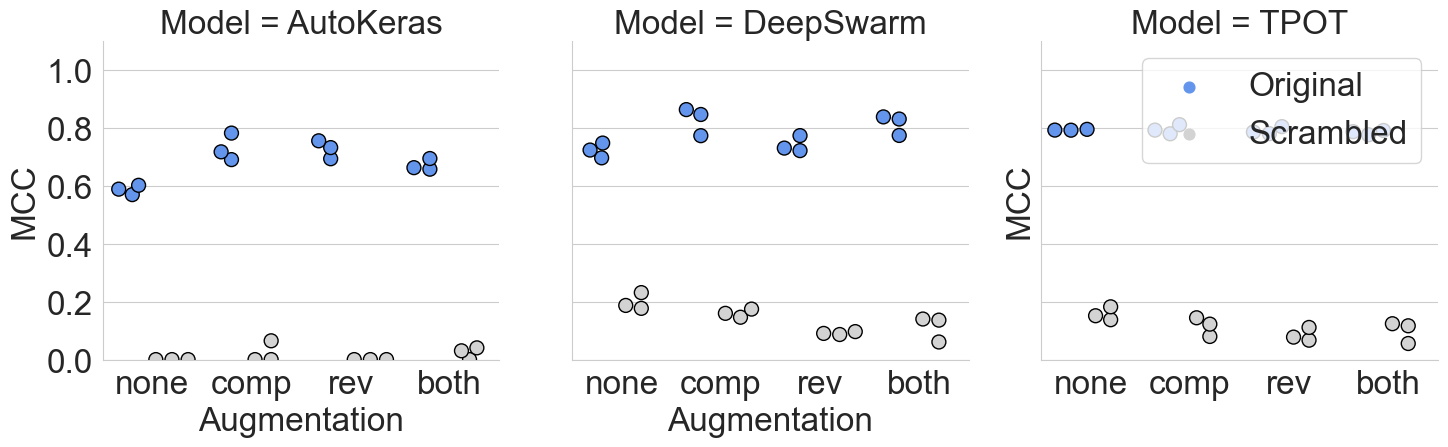

<Figure size 600x800 with 0 Axes>

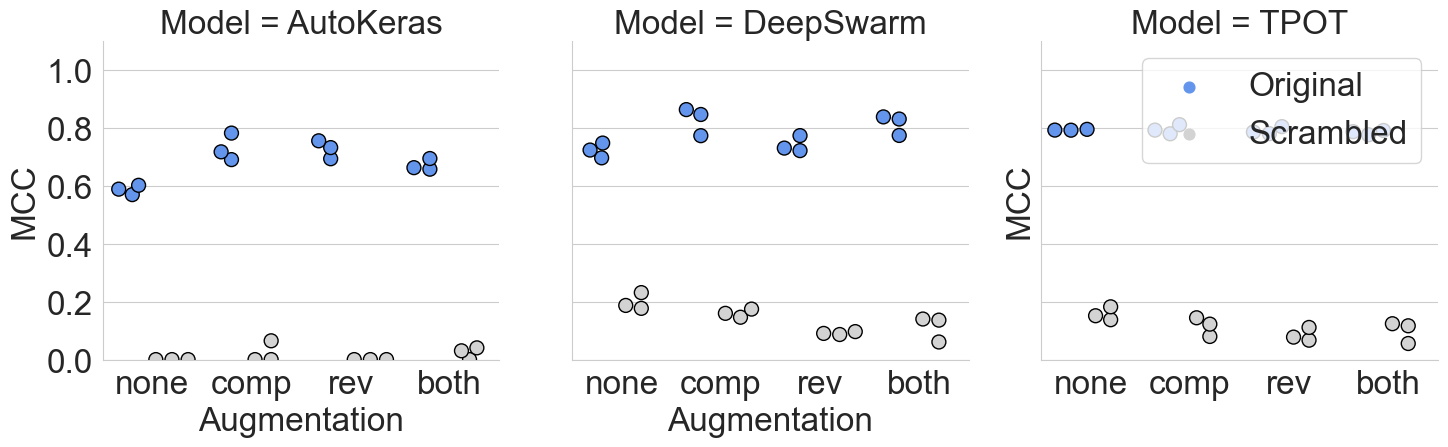

Comparing Original Model to Original Model...


Comparing AutoKeras
Rev compared to none
Ttest_indResult(statistic=6.89923621736789, pvalue=0.0023144267977042933)
Comp compared to none
Ttest_indResult(statistic=4.985673601672643, pvalue=0.007566824448366186)
Both compared to none
Ttest_indResult(statistic=5.724270751326177, pvalue=0.004610000996813703)
Rev compared to comp
Ttest_indResult(statistic=-0.0922195946646462, pvalue=0.9309575743782836)
Both compared to comp
Ttest_indResult(statistic=-1.9820113944366826, pvalue=0.11852851410809805)
Both compared to rev
Ttest_indResult(statistic=-2.591844703561184, pvalue=0.06056605131621422)


Comparing TPOT
Rev compared to none
Ttest_indResult(statistic=-0.4119610831954927, pvalue=0.7014878588136394)
Comp compared to none
Ttest_indResult(statistic=0.13311218290746588, pvalue=0.9005326873128856)
Both compared to none
Ttest_indResult(statistic=-1.8588222864239667, pvalue=0.13658656671174935)
Rev compared to comp
Ttest_indResult(statistic=-0.364

In [35]:
plot_scatter_plot_aug_type(wholedf, '../clean_figs/comp_aug_rbs_mcc.png', 'MCC') 
plot_scatter_plot_aug_type(wholedf, '../clean_figs/comp_aug_rbs_mcc.svg', 'MCC') 
calc_augmentation_stats(wholedf)

Running statistics now...
AutoKeras
Ttest_indResult(statistic=1.858554099771427, pvalue=0.1366289866274645)
DeepSwarm
Ttest_indResult(statistic=8.710353174612878, pvalue=0.0009567072883815491)
TPOT
Ttest_indResult(statistic=17.872971235277642, pvalue=5.7590996067672986e-05)
Running statistics now...
AutoKeras
Ttest_indResult(statistic=58.22873937243417, pvalue=5.208926853802493e-07)
DeepSwarm
Ttest_indResult(statistic=15.72212559735207, pvalue=9.560553000688085e-05)
TPOT
Ttest_indResult(statistic=14.9166114450979, pvalue=0.00011764380699695076)
Running statistics now...
AutoKeras
Ttest_indResult(statistic=6.674476002405337, pvalue=0.00261898452207873)
DeepSwarm
Ttest_indResult(statistic=13.755113972565244, pvalue=0.000161861963671411)
TPOT
Ttest_indResult(statistic=22.246528207007685, pvalue=2.416988801544016e-05)
Running statistics now...
AutoKeras
Ttest_indResult(statistic=27.288531879574652, pvalue=1.072389318975872e-05)
DeepSwarm
Ttest_indResult(statistic=6.416585358660312, pvalue=

<Figure size 600x800 with 0 Axes>

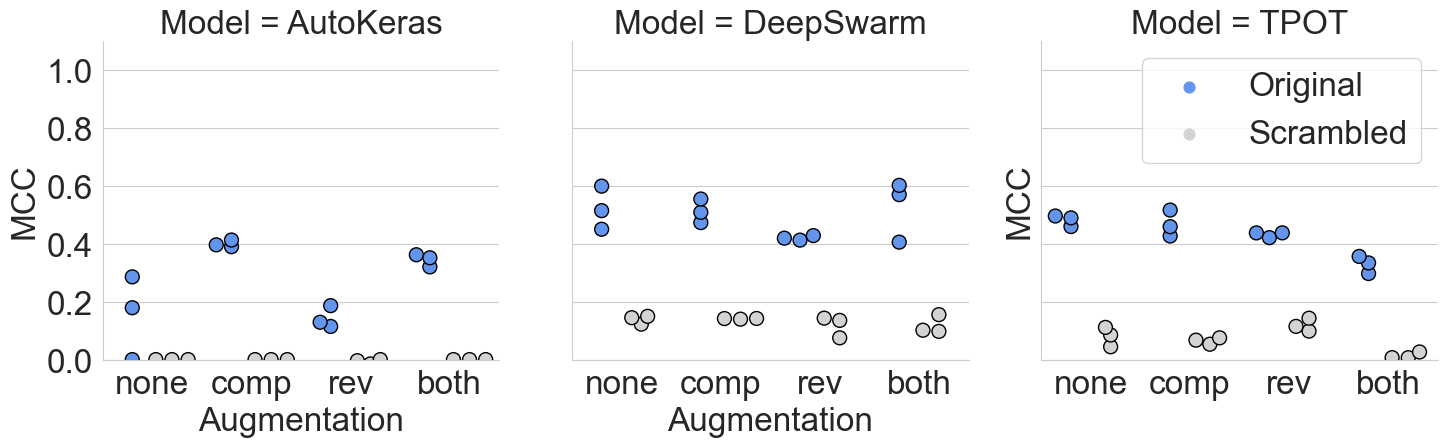

<Figure size 600x800 with 0 Axes>

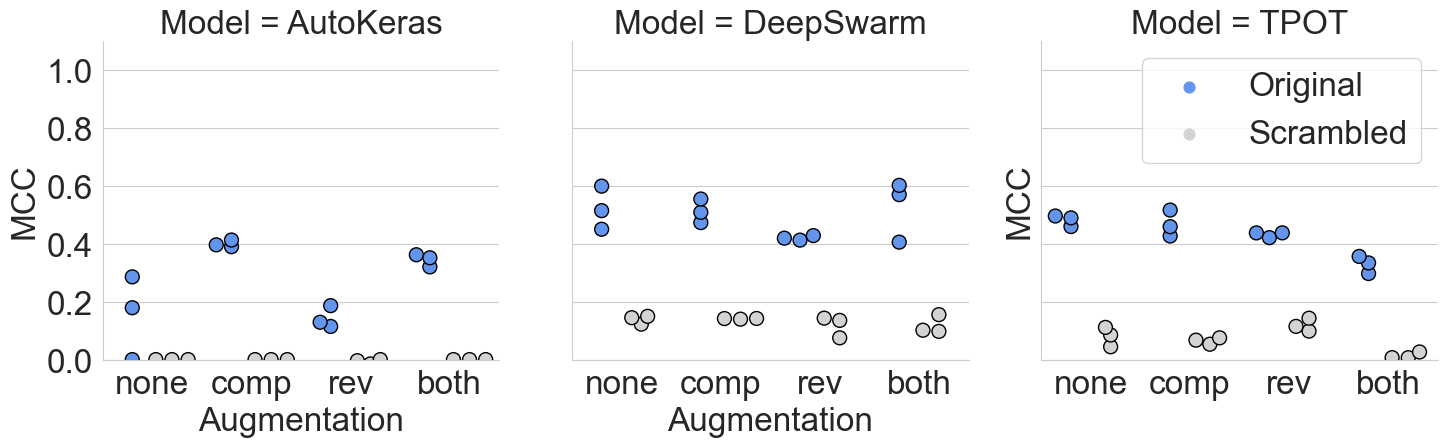

Comparing Original Model to Original Model...


Comparing AutoKeras
Rev compared to none
Ttest_indResult(statistic=-0.13549383022772768, pvalue=0.8987664312764161)
Comp compared to none
Ttest_indResult(statistic=2.92752558795461, pvalue=0.04291966168155702)
Both compared to none
Ttest_indResult(statistic=2.2497019271159107, pvalue=0.0876741162027152)
Rev compared to comp
Ttest_indResult(statistic=-11.15869449494881, pvalue=0.00036710978044944987)
Both compared to comp
Ttest_indResult(statistic=-3.8395829751841117, pvalue=0.018466121072624145)
Both compared to rev
Ttest_indResult(statistic=7.953672362116966, pvalue=0.001353457991272084)


Comparing TPOT
Rev compared to none
Ttest_indResult(statistic=-3.9568169004588065, pvalue=0.016722171266853197)
Comp compared to none
Ttest_indResult(statistic=-0.49701803087393676, pvalue=0.6452535967363493)
Both compared to none
Ttest_indResult(statistic=-7.412377322015944, pvalue=0.0017675851092027002)
Rev compared to comp
Ttest_indResult(statistic=

In [36]:
# load in toeholds
data_path = '../exemplars/augmentation_tests/'

for seq_type in ['toeholds_small_no_aug/', 'toeholds_small_comp_aug/', 'toeholds_small_rev_aug/', 'toeholds_small_both_aug/']:
    df = calc_mcc(data_path, seq_type, 'all values of MCC Class 0')
    if seq_type == 'toeholds_small_no_aug/':
        wholedf = df
        wholedf['augtype'] = ['none'] * len(df)
    elif seq_type == 'toeholds_small_comp_aug/':
        df['augtype'] = ['comp'] * len(df)
        wholedf = pd.concat([wholedf, df])
    elif seq_type == 'toeholds_small_rev_aug/':
        df['augtype'] = ['rev'] * len(df)
        wholedf = pd.concat([wholedf, df])
    elif seq_type == 'toeholds_small_both_aug/':
        df['augtype'] = ['both'] * len(df)
        wholedf = pd.concat([wholedf, df])
plot_scatter_plot_aug_type(wholedf, '../clean_figs/comp_aug_toeholds_mcc.png', 'MCC')
plot_scatter_plot_aug_type(wholedf, '../clean_figs/comp_aug_toeholds_mcc.svg', 'MCC')
calc_augmentation_stats(wholedf)

# Multi-class classification plot

In [37]:
def calc_mcc(folder, seq, val_name):
    folds = ['outputs/autokeras/multiclass_classification/', 'outputs/deepswarm/multiclass_classification/', 'outputs/tpot/multiclass_classification/']
    mcc = pd.DataFrame()
    file_name = 'all_results.txt'
    for fold in folds:
        name = fold.split('outputs/')[1].split('/multiclass_classification')[0]
        name = name.replace('deepswarm', 'DeepSwarm')
        name = name.replace('autokeras', 'AutoKeras')
        name = name.replace('tpot', 'TPOT')

        df = pd.read_csv(folder + seq + fold + file_name, sep = '\t', header = None)
        vals = df.values
        for i in range(len(vals)):
            val = vals[i]
            if val_name in val[0]:
                new = val[0].split(": ")[1]
                new = new.strip("[")
                new = new.strip("]")

                new = [s for s in new.split(' ')]
                new = [s for s in new if s != '']
                new = [0 if s == '0.' else s for s in new]
                new = [float(s) for s in new]
                mcc[name] = new
    mcc['scr'] = ['Original'] * len(mcc)
    
    file_name = 'all_scrambled_control_results.txt'
    scr_mcc = pd.DataFrame()
    for fold in folds:
        name = fold.split('outputs/')[1].split('/multiclass_classification')[0]
        name = name.replace('deepswarm', 'DeepSwarm')
        name = name.replace('autokeras', 'AutoKeras')
        name = name.replace('tpot', 'TPOT')
        df = pd.read_csv(folder + seq + fold + 'scrambled/' + file_name, sep = '\t', header = None)
        vals = df.values
        for i in range(len(vals)):
            val = vals[i]
            if val_name in val[0]:
                new = val[0].split(": ")[1]
                new = new.strip("[")
                new = new.strip("]")

                new = [s for s in new.split(' ')]
                new = [s for s in new if s != '']
                new = [0 if s == '0.' else s for s in new]
                new = [float(s) for s in new]
                scr_mcc[name] = new
    scr_mcc['scr'] = ['Scrambled'] * len(scr_mcc)
    mcc = pd.concat([mcc, scr_mcc])
    
    print('Running statistics now...')
    calculate_stats(mcc)

    return(mcc)

def reshape_multiclass_type(df):
    new = pd.DataFrame()
    new['model_type'] = []
    new
    index = 0
    for name, col in df.iteritems():
        if 'scr' in name or 'Class' in name:
            continue
        new_pd = pd.DataFrame(col)
        new_pd.columns = ['values']
        new_pd['scr'] = list(df['scr'])
        new_pd['model_type'] = [name] * len(new_pd)
        new_pd['Class'] = list(df['Class'])
        new = pd.concat([new, new_pd])
        index = index + 1
    new.columns = ['Model', 'MCC', 'Data', 'Class']
    return(new)

def plot_barplot_multiclass(mcc, savepath, yaxis):
    mcc = reshape_multiclass_type(mcc)  
    my_pal = {"Original": "cornflowerblue", "Scrambled": "lightgrey"}

    g = sns.FacetGrid(mcc, col="Model", height=6, aspect=1, margin_titles=True)
    g.map(sns.barplot, 'Class', 'MCC', 'Data', dodge = True, edgecolor='black', alpha = 1, linewidth = 1, palette = my_pal, ci = 'sd', errcolor = 'black', errwidth = 1.5, capsize = 0.2, saturation = 0.6)
    g.map(sns.swarmplot, 'Class', 'MCC', 'Data', dodge = True, edgecolor='black', alpha = 1, linewidth = 1, s = 4, palette = my_pal)
    for ax in g.axes_dict.values():
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles[2:4], labels[2:4], title='Data')

        plt.xlabel('')
        plt.xticks(rotation = 80)
        plt.ylabel(yaxis)
        plt.ylim([0, 1.1])
        plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    plt.tight_layout()
    plt.savefig(savepath)
    plt.show()

0
Running statistics now...
AutoKeras
Ttest_indResult(statistic=69.04532961477922, pvalue=2.6363734898498646e-07)
DeepSwarm
Ttest_indResult(statistic=39.0413257321535, pvalue=2.571318580019045e-06)
TPOT
Ttest_indResult(statistic=71.82502236225864, pvalue=2.2515787875549824e-07)


1
Running statistics now...
AutoKeras
Ttest_indResult(statistic=86.98978734083502, pvalue=1.0468770050071074e-07)
DeepSwarm
Ttest_indResult(statistic=11.670336627766524, pvalue=0.0003082144984039396)
TPOT
Ttest_indResult(statistic=36.471775258554, pvalue=3.3740395200842764e-06)


2
Running statistics now...
AutoKeras
Ttest_indResult(statistic=64.35504250911197, pvalue=3.4923854164778536e-07)
DeepSwarm
Ttest_indResult(statistic=4.755697341621593, pvalue=0.0089333960672299)
TPOT
Ttest_indResult(statistic=41.185666798518085, pvalue=2.0771214850847815e-06)


3
Running statistics now...
AutoKeras
Ttest_indResult(statistic=111.51936275603394, pvalue=3.877192506425705e-08)
DeepSwarm
Ttest_indResult(statistic=35.79230

/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


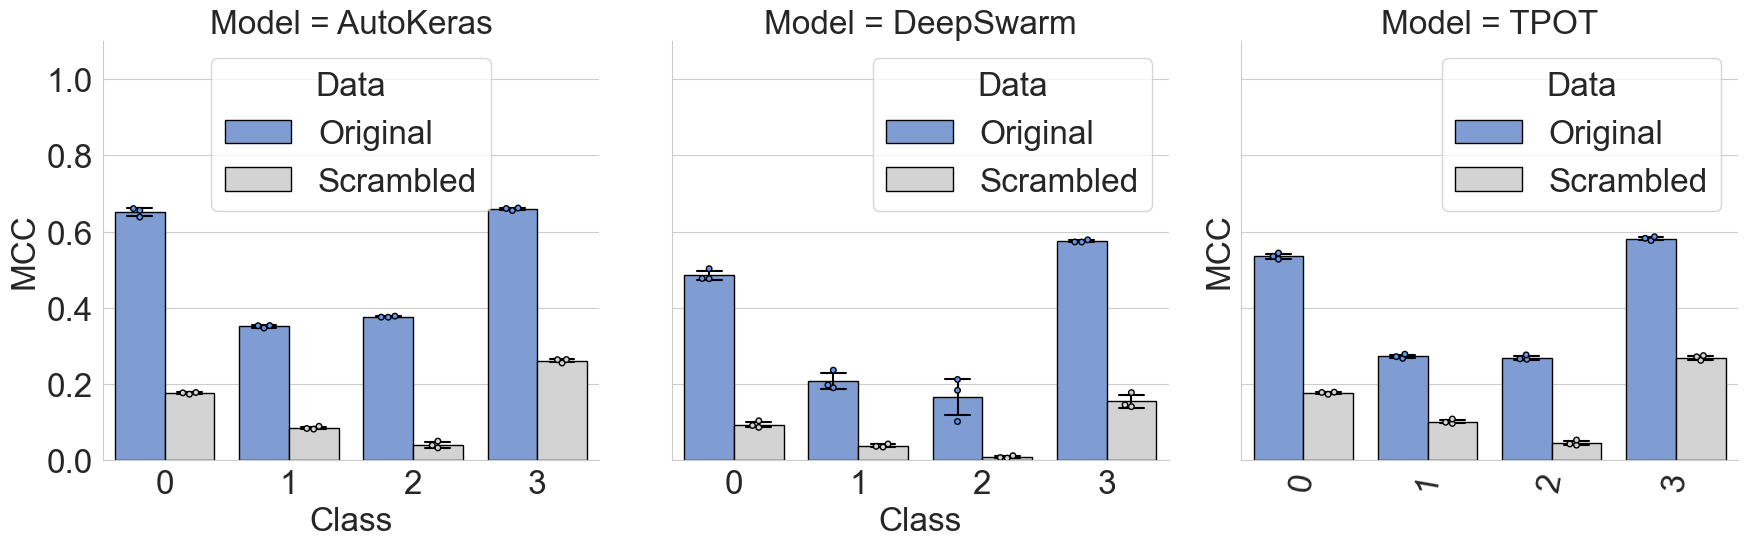

In [38]:
# load in toeholds
data_path = '../exemplars/'
seq_type = 'toeholds/'

wholedf = pd.DataFrame()
for classtype in [0, 1, 2, 3]:
    print(classtype)
    df = calc_mcc(data_path, seq_type, 'all values of MCC Class ' + str(classtype))
    df['Class'] = [str(classtype)] * len(df)
    wholedf = pd.concat([wholedf, df])
    print('\n')
plot_barplot_multiclass(wholedf, '../clean_figs/multiclass_toeholds_mcc.svg', 'MCC') 

0
Running statistics now...
AutoKeras
Ttest_indResult(statistic=96.35763488051472, pvalue=6.954965119260509e-08)
DeepSwarm
Ttest_indResult(statistic=22.88414387033811, pvalue=2.1602499219287512e-05)
TPOT
Ttest_indResult(statistic=178.7352873076199, pvalue=5.877862394772408e-09)


1
Running statistics now...
AutoKeras
Ttest_indResult(statistic=42.82150274212251, pvalue=1.7779777807132158e-06)
DeepSwarm
Ttest_indResult(statistic=21.286736276351462, pvalue=2.879732753657108e-05)
TPOT
Ttest_indResult(statistic=77.49235175131878, pvalue=1.662011012918975e-07)


2
Running statistics now...
AutoKeras
Ttest_indResult(statistic=79.03006453399256, pvalue=1.5364501837006405e-07)
DeepSwarm
Ttest_indResult(statistic=97.99097860694866, pvalue=6.502875027839738e-08)
TPOT
Ttest_indResult(statistic=114.49641506068645, pvalue=3.4894973349370065e-08)


3
Running statistics now...
AutoKeras
Ttest_indResult(statistic=304.7900849659003, pvalue=6.952111747614331e-10)
DeepSwarm
Ttest_indResult(statistic=74.00

/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


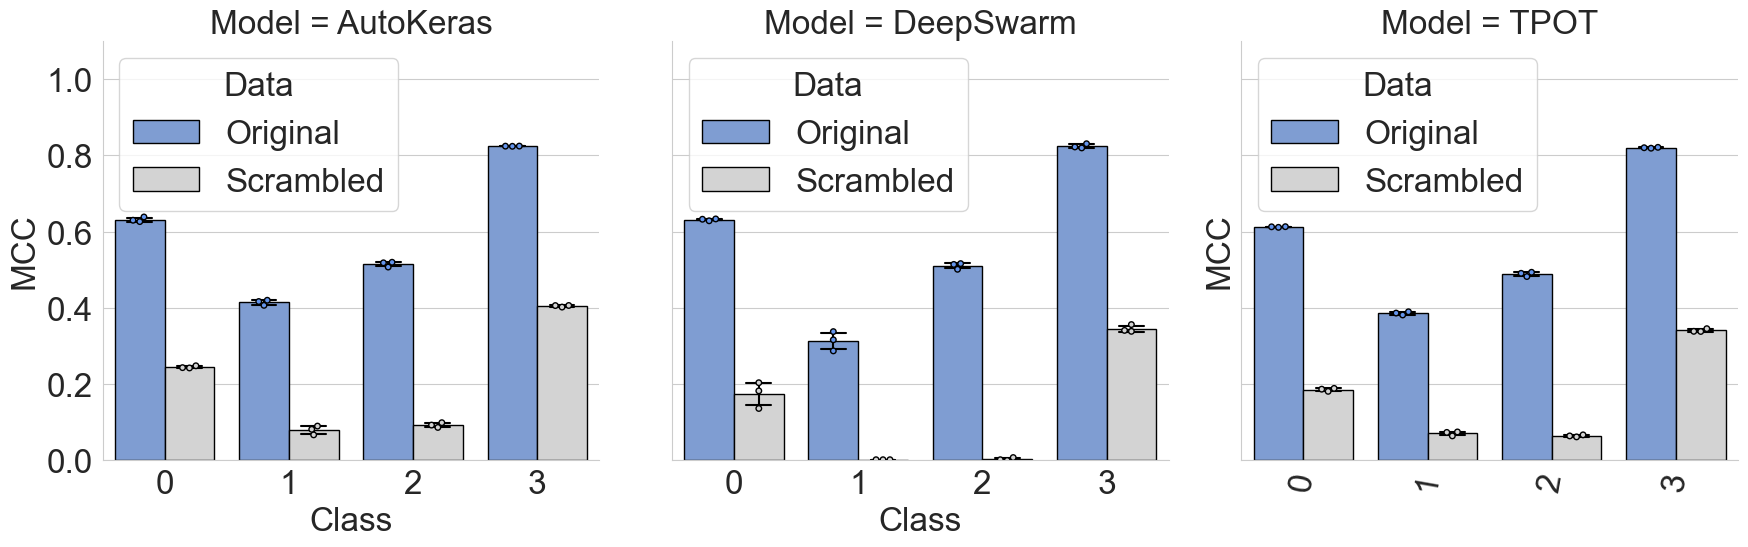

In [39]:
# load in rbs
data_path = '../exemplars/'
seq_type = 'rbs/'

wholedf = pd.DataFrame()
for classtype in [0, 1, 2, 3]:
    print(classtype)
    df = calc_mcc(data_path, seq_type, 'all values of MCC Class ' + str(classtype))
    df['Class'] = [str(classtype)] * len(df)
    wholedf = pd.concat([wholedf, df])
    print('\n')
plot_barplot_multiclass(wholedf, '../clean_figs/multiclass_rbs_mcc.svg', 'MCC') 

0
Running statistics now...
AutoKeras
Ttest_indResult(statistic=5.690351477175738, pvalue=0.00471063838240902)
DeepSwarm
Ttest_indResult(statistic=3.4208106819064374, pvalue=0.026760253809923387)
TPOT
Ttest_indResult(statistic=36.69441876243163, pvalue=3.293092907551819e-06)


1
Running statistics now...
AutoKeras
Ttest_indResult(statistic=34.54021817338202, pvalue=4.192064778953265e-06)
DeepSwarm
Ttest_indResult(statistic=3.4617739023858065, pvalue=0.025776045311050995)
TPOT
Ttest_indResult(statistic=12.75168844523273, pvalue=0.00021791212524898608)


2
Running statistics now...
AutoKeras
Ttest_indResult(statistic=3.20619436729188, pvalue=0.03270720265029646)
DeepSwarm
Ttest_indResult(statistic=2.7511405215592473, pvalue=0.051314259334896285)
TPOT
Ttest_indResult(statistic=9.948899554424628, pvalue=0.0005732602096711791)


3
Running statistics now...
AutoKeras
Ttest_indResult(statistic=34.55586448847146, pvalue=4.18449865017349e-06)
DeepSwarm
Ttest_indResult(statistic=12.6366325507846

/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


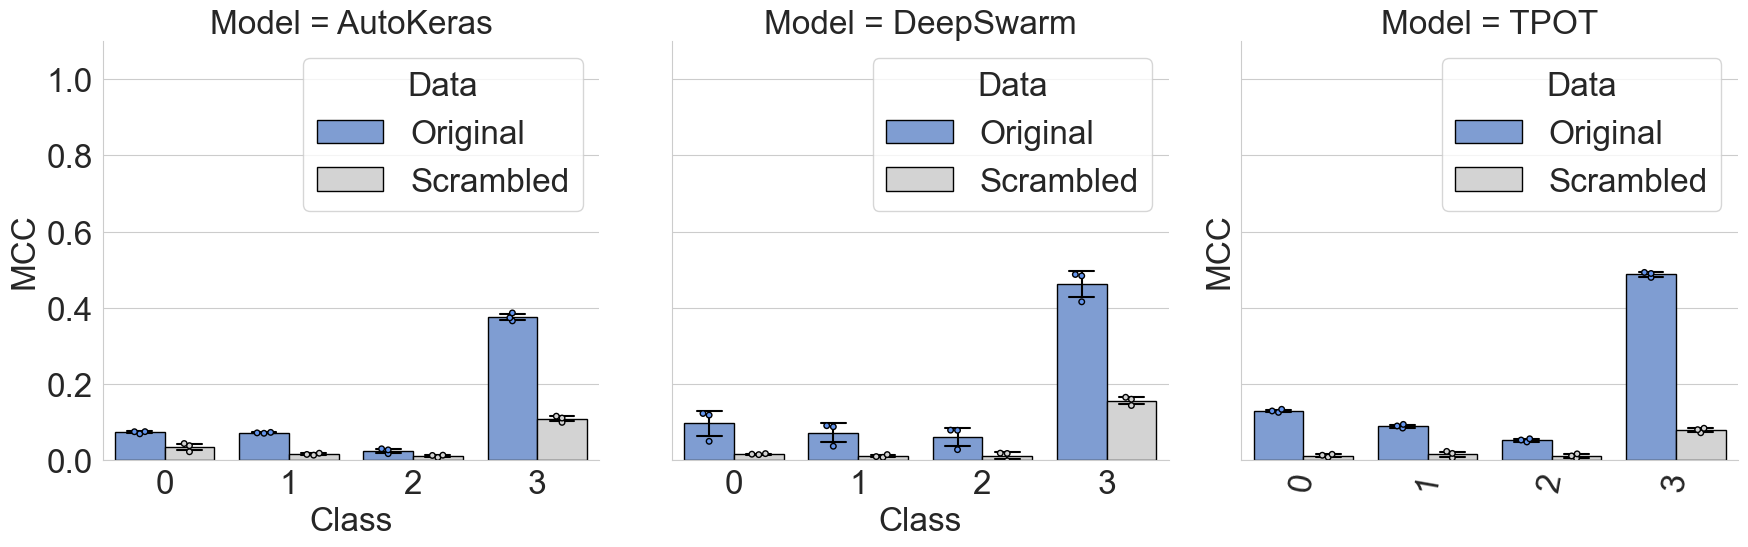

In [40]:
# load in peptides
data_path = '../exemplars/'
seq_type = 'peptides/'

wholedf = pd.DataFrame()
for classtype in [0, 1, 2, 3]:
    print(classtype)
    df = calc_mcc(data_path, seq_type, 'all values of MCC Class ' + str(classtype))
    df['Class'] = [str(classtype)] * len(df)
    wholedf = pd.concat([wholedf, df])
    print('\n')
plot_barplot_multiclass(wholedf, '../clean_figs/multiclass_peptide_mcc.svg', 'MCC') 

0
Running statistics now...
AutoKeras
Ttest_indResult(statistic=nan, pvalue=nan)
DeepSwarm
Ttest_indResult(statistic=4.1936847877461005, pvalue=0.013765599458039741)
TPOT
Ttest_indResult(statistic=7.739897984435773, pvalue=0.0015009340841144107)


1
Running statistics now...
AutoKeras
Ttest_indResult(statistic=19.40607049001018, pvalue=4.156728043401139e-05)
DeepSwarm
Ttest_indResult(statistic=18.57654753623133, pvalue=4.9425089623219845e-05)
TPOT
Ttest_indResult(statistic=29.877918777155585, pvalue=7.473318393079243e-06)


2
Running statistics now...
AutoKeras
Ttest_indResult(statistic=18.63988976833956, pvalue=4.876300058246917e-05)
DeepSwarm
Ttest_indResult(statistic=14.945584614316772, pvalue=0.00011674752918645618)
TPOT
Ttest_indResult(statistic=35.95132916217575, pvalue=3.5731782514325885e-06)


3
Running statistics now...
AutoKeras
Ttest_indResult(statistic=nan, pvalue=nan)
DeepSwarm
Ttest_indResult(statistic=13.120695673627376, pvalue=0.00019484535462763045)
TPOT
Ttest_indResul

/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


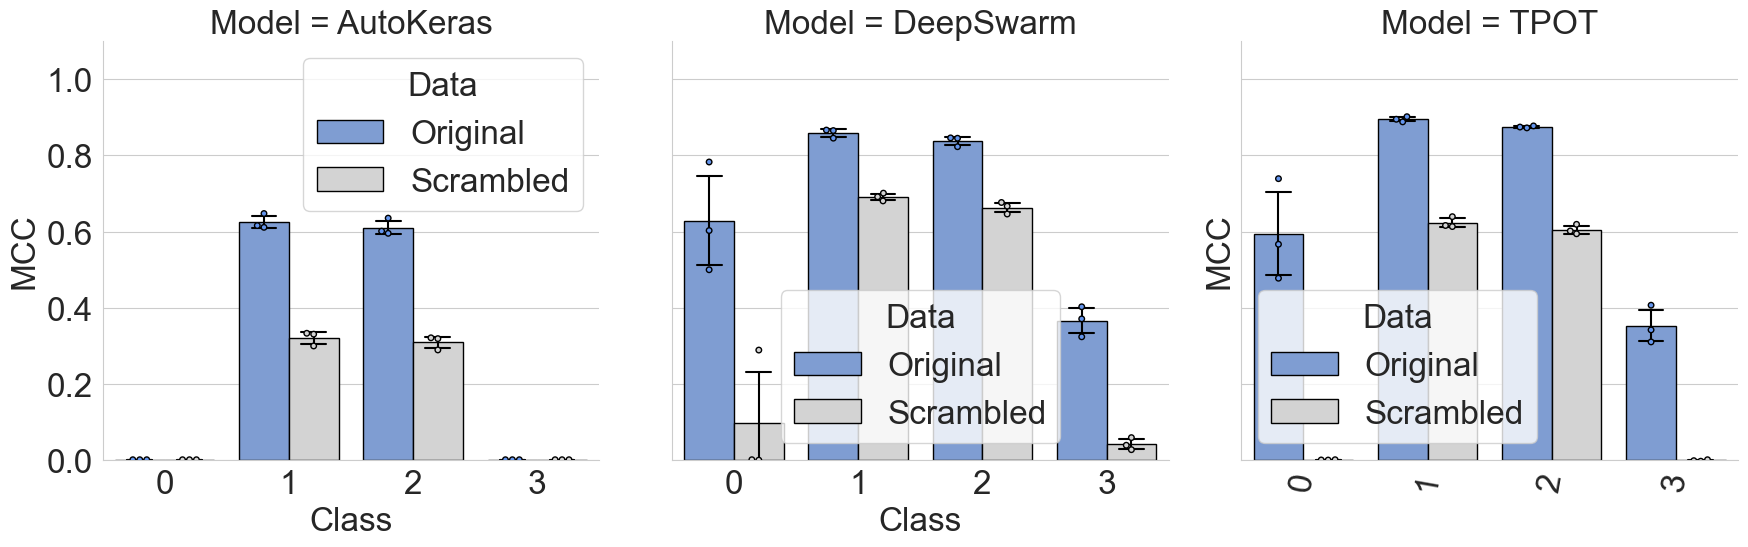

In [41]:
# load in glycans
data_path = '../exemplars/'
seq_type = 'glycan_domain_average/'

wholedf = pd.DataFrame()
for classtype in [0, 1, 2, 3]:
    print(classtype)
    df = calc_mcc(data_path, seq_type, 'all values of MCC Class ' + str(classtype))
    df['Class'] = [str(classtype)] * len(df)
    wholedf = pd.concat([wholedf, df])
    print('\n')
plot_barplot_multiclass(wholedf, '../clean_figs/multiclass_glycan_domain_mcc.svg', 'MCC') 

0
Running statistics now...
AutoKeras
Ttest_indResult(statistic=-0.44725190930230996, pvalue=0.6778433932834977)
DeepSwarm
Ttest_indResult(statistic=nan, pvalue=nan)
TPOT
Ttest_indResult(statistic=0.7414964820503266, pvalue=0.4995653588374637)


1
Running statistics now...
AutoKeras
Ttest_indResult(statistic=-0.44715021438977826, pvalue=0.6779109067085058)
DeepSwarm
Ttest_indResult(statistic=nan, pvalue=nan)
TPOT
Ttest_indResult(statistic=0.8645681872649075, pvalue=0.43604263058236226)


2
Running statistics now...
AutoKeras
Ttest_indResult(statistic=nan, pvalue=nan)
DeepSwarm
Ttest_indResult(statistic=nan, pvalue=nan)
TPOT
Ttest_indResult(statistic=2.802489596385101, pvalue=0.04868786415859419)


3
Running statistics now...
AutoKeras
Ttest_indResult(statistic=nan, pvalue=nan)
DeepSwarm
Ttest_indResult(statistic=nan, pvalue=nan)
TPOT
Ttest_indResult(statistic=0.6405685474210183, pvalue=0.5566573397089694)




/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


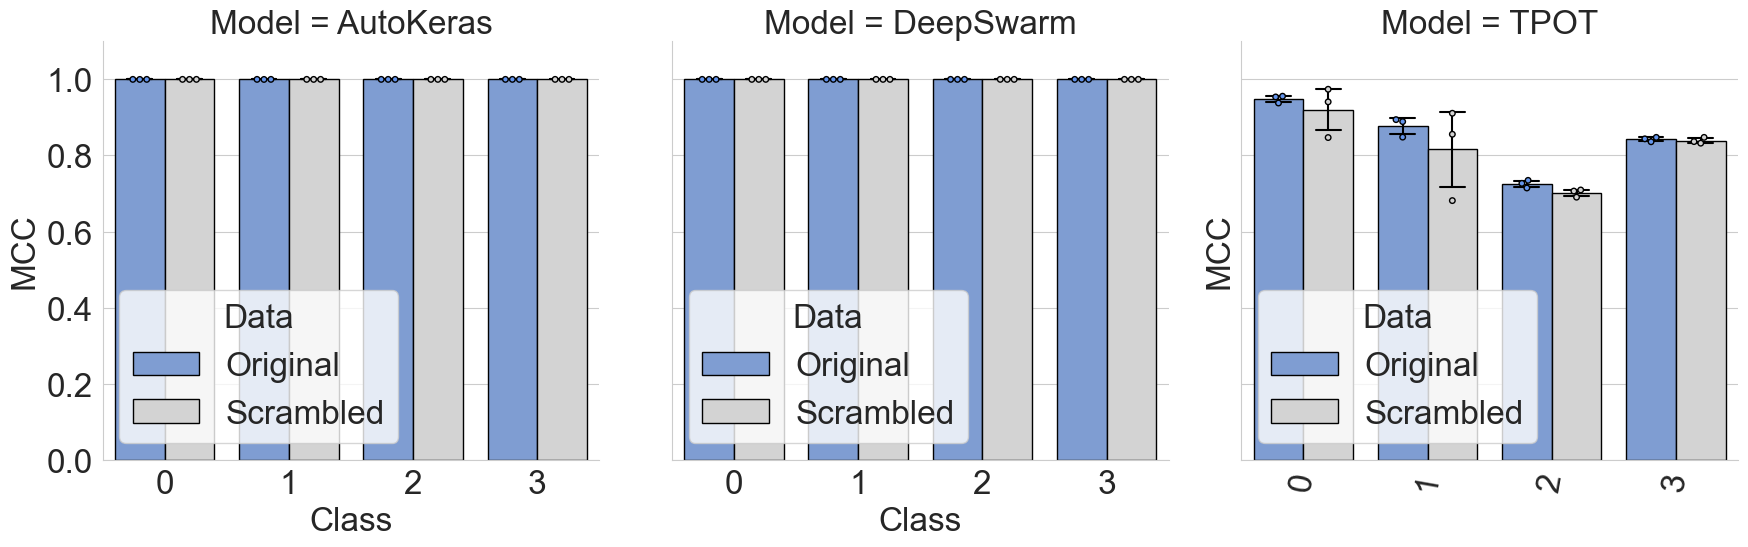

In [42]:
# load in synthetic_nucleic_acids
data_path = '../exemplars/'
seq_type = 'large_synthetic_nucleic_acids/'

wholedf = pd.DataFrame()
for classtype in [0, 1, 2, 3]:
    print(classtype)
    df = calc_mcc(data_path, seq_type, 'all values of MCC Class ' + str(classtype))
    df['Class'] = [str(classtype)] * len(df)
    wholedf = pd.concat([wholedf, df])
    print('\n')
plot_barplot_multiclass(wholedf, '../clean_figs/multiclass_large_synthetic_nucleic_acid_mcc.svg', 'MCC') 

# Glycans length tests

0
Running statistics now...
AutoKeras
Ttest_indResult(statistic=nan, pvalue=nan)
DeepSwarm
Ttest_indResult(statistic=18.247319238429196, pvalue=5.3052899875178624e-05)
TPOT
Ttest_indResult(statistic=17.035486710073133, pvalue=6.963406304313335e-05)


1
Running statistics now...
AutoKeras
Ttest_indResult(statistic=4.1234481176491355, pvalue=0.014571435726260741)
DeepSwarm
Ttest_indResult(statistic=16.32568388436305, pvalue=8.23910553841713e-05)
TPOT
Ttest_indResult(statistic=27.624126054403497, pvalue=1.0214389073578223e-05)


2
Running statistics now...
AutoKeras
Ttest_indResult(statistic=3.981930391693353, pvalue=0.016374724695318366)
DeepSwarm
Ttest_indResult(statistic=14.785982658814602, pvalue=0.00012179291344426405)
TPOT
Ttest_indResult(statistic=23.8611356144851, pvalue=1.829441902063073e-05)


3
Running statistics now...
AutoKeras
Ttest_indResult(statistic=nan, pvalue=nan)
DeepSwarm
Ttest_indResult(statistic=12.002576848674584, pvalue=0.0002761965853214033)
TPOT
Ttest_indResult(

/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


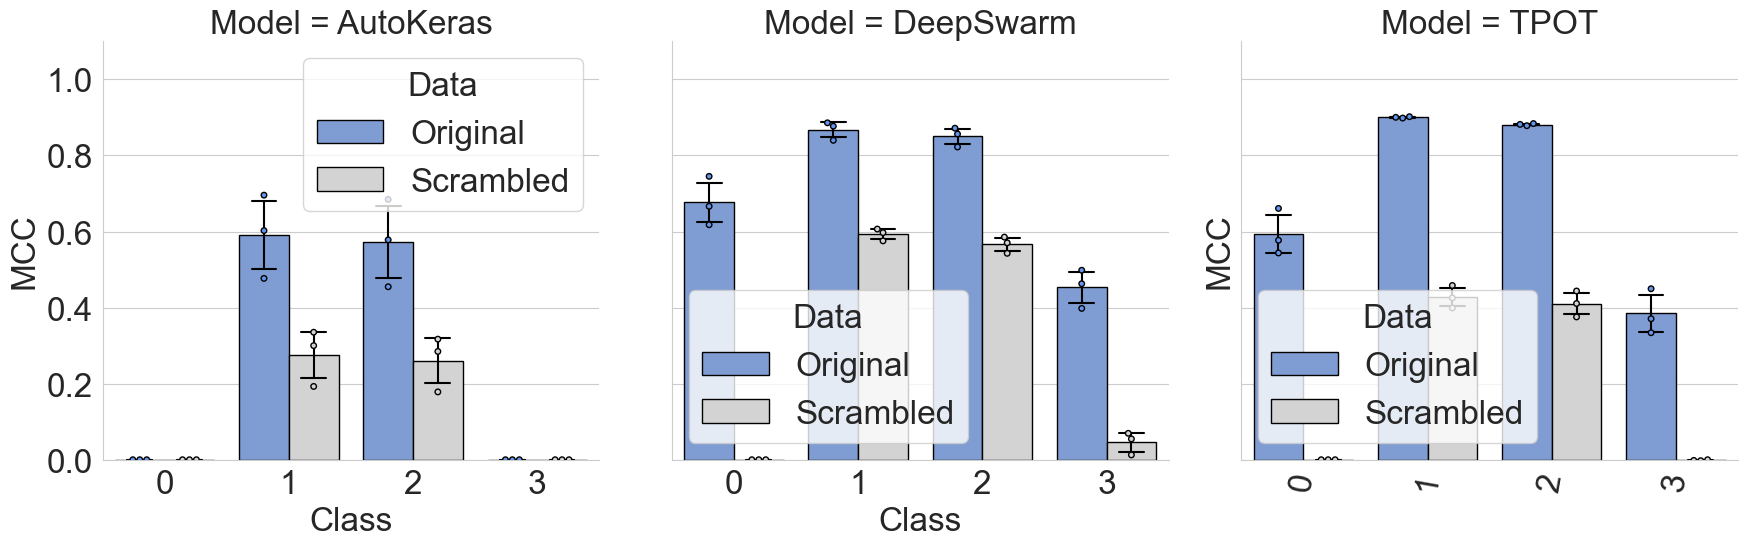

0
Running statistics now...
AutoKeras
Ttest_indResult(statistic=nan, pvalue=nan)
DeepSwarm
Ttest_indResult(statistic=2.2550318965770417, pvalue=0.0871582456256017)
TPOT
Ttest_indResult(statistic=20.626937248593684, pvalue=3.26315572877591e-05)


1
Running statistics now...
AutoKeras
Ttest_indResult(statistic=6.818404067021762, pvalue=0.002418660756207756)
DeepSwarm
Ttest_indResult(statistic=6.623507334924083, pvalue=0.002694793144286439)
TPOT
Ttest_indResult(statistic=20.38133663342384, pvalue=3.422020769306979e-05)


2
Running statistics now...
AutoKeras
Ttest_indResult(statistic=7.448602151007529, pvalue=0.0017353595039178178)
DeepSwarm
Ttest_indResult(statistic=6.174009511769411, pvalue=0.0034954459354599953)
TPOT
Ttest_indResult(statistic=17.478244528416237, pvalue=6.291314352507781e-05)


3
Running statistics now...
AutoKeras
Ttest_indResult(statistic=nan, pvalue=nan)
DeepSwarm
Ttest_indResult(statistic=1.6013180741410296, pvalue=0.18456236948762159)
TPOT
Ttest_indResult(statistic

/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


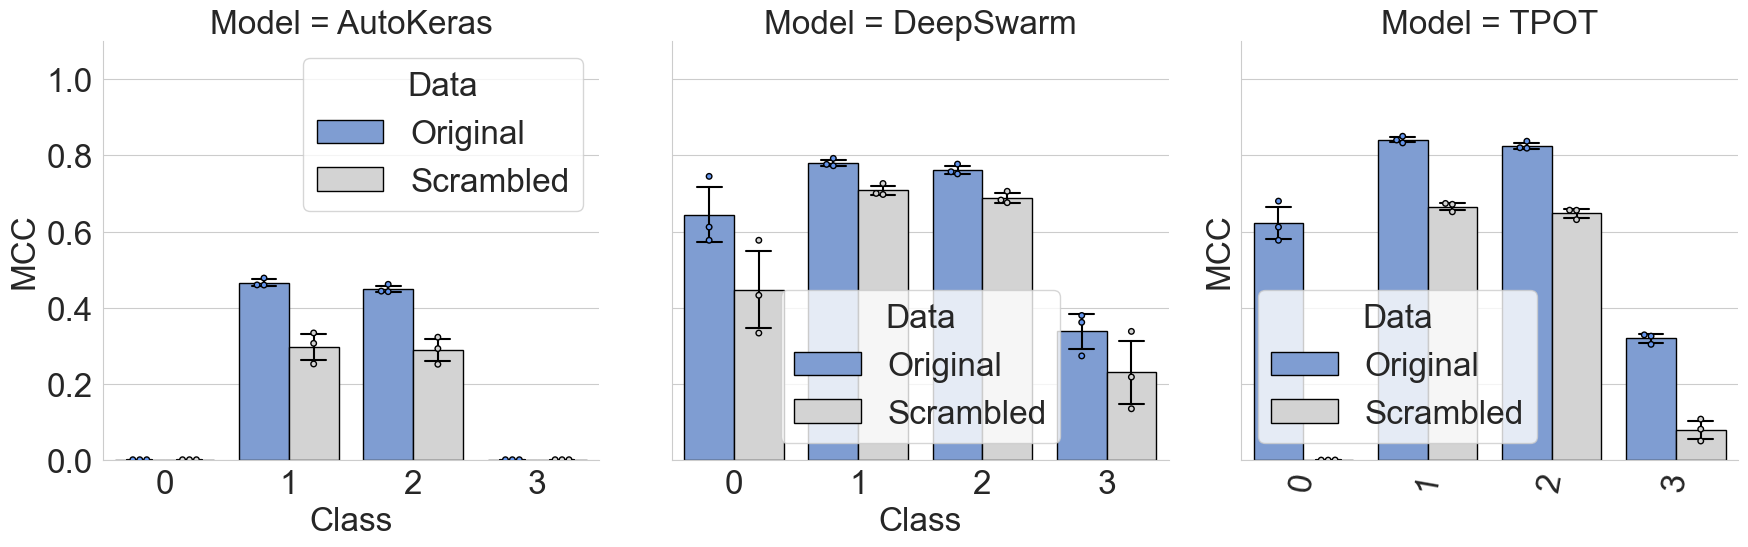

0
Running statistics now...
AutoKeras
Ttest_indResult(statistic=nan, pvalue=nan)
DeepSwarm
Ttest_indResult(statistic=4.1936847877461005, pvalue=0.013765599458039741)
TPOT
Ttest_indResult(statistic=7.739897984435773, pvalue=0.0015009340841144107)


1
Running statistics now...
AutoKeras
Ttest_indResult(statistic=19.40607049001018, pvalue=4.156728043401139e-05)
DeepSwarm
Ttest_indResult(statistic=18.57654753623133, pvalue=4.9425089623219845e-05)
TPOT
Ttest_indResult(statistic=29.877918777155585, pvalue=7.473318393079243e-06)


2
Running statistics now...
AutoKeras
Ttest_indResult(statistic=18.63988976833956, pvalue=4.876300058246917e-05)
DeepSwarm
Ttest_indResult(statistic=14.945584614316772, pvalue=0.00011674752918645618)
TPOT
Ttest_indResult(statistic=35.95132916217575, pvalue=3.5731782514325885e-06)


3
Running statistics now...
AutoKeras
Ttest_indResult(statistic=nan, pvalue=nan)
DeepSwarm
Ttest_indResult(statistic=13.120695673627376, pvalue=0.00019484535462763045)
TPOT
Ttest_indResul

/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


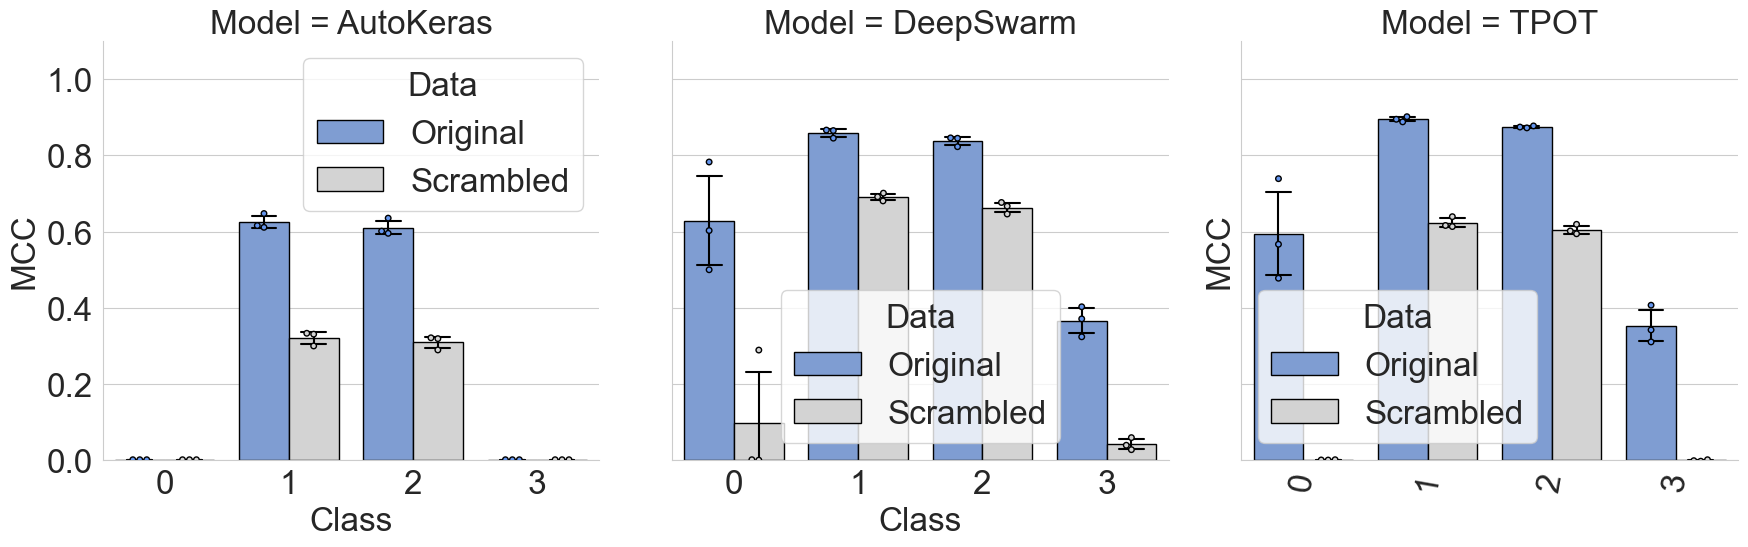

In [43]:
# load in glycans
seq_type = 'length_tests/domain_glycans_max/'
all_lengths = pd.DataFrame()
wholedf = pd.DataFrame()
for classtype in [0, 1, 2, 3]:
    print(classtype)
    df = calc_mcc(data_path, seq_type, 'all values of MCC Class ' + str(classtype))
    df['Class'] = [str(classtype)] * len(df)
    wholedf = pd.concat([wholedf, df])
    print('\n')
plot_barplot_multiclass(wholedf, '../clean_figs/length_tests_domain_glycans_max.svg', 'MCC') 
wholedf['Length'] = ['Maximum'] * len(wholedf)
all_lengths = pd.concat([all_lengths, wholedf])
                        
seq_type = 'length_tests/domain_glycans_min/'
wholedf = pd.DataFrame()
for classtype in [0, 1, 2, 3]:
    print(classtype)
    df = calc_mcc(data_path, seq_type, 'all values of MCC Class ' + str(classtype))
    df['Class'] = [str(classtype)] * len(df)
    wholedf = pd.concat([wholedf, df])
    print('\n')
plot_barplot_multiclass(wholedf, '../clean_figs/length_tests_domain_glycans_min.svg', 'MCC') 
wholedf['Length'] = ['Minimum'] * len(wholedf)
all_lengths = pd.concat([all_lengths, wholedf])

seq_type = 'glycan_domain_average/' # used as baseline
wholedf = pd.DataFrame()
for classtype in [0, 1, 2, 3]:
    print(classtype)
    df = calc_mcc(data_path, seq_type, 'all values of MCC Class ' + str(classtype))
    df['Class'] = [str(classtype)] * len(df)
    wholedf = pd.concat([wholedf, df])
    print('\n')
plot_barplot_multiclass(wholedf, '../clean_figs/length_tests_domain_glycans_avg.svg', 'MCC') 
wholedf['Length'] = ['Average'] * len(wholedf)
all_lengths = pd.concat([all_lengths, wholedf])

/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


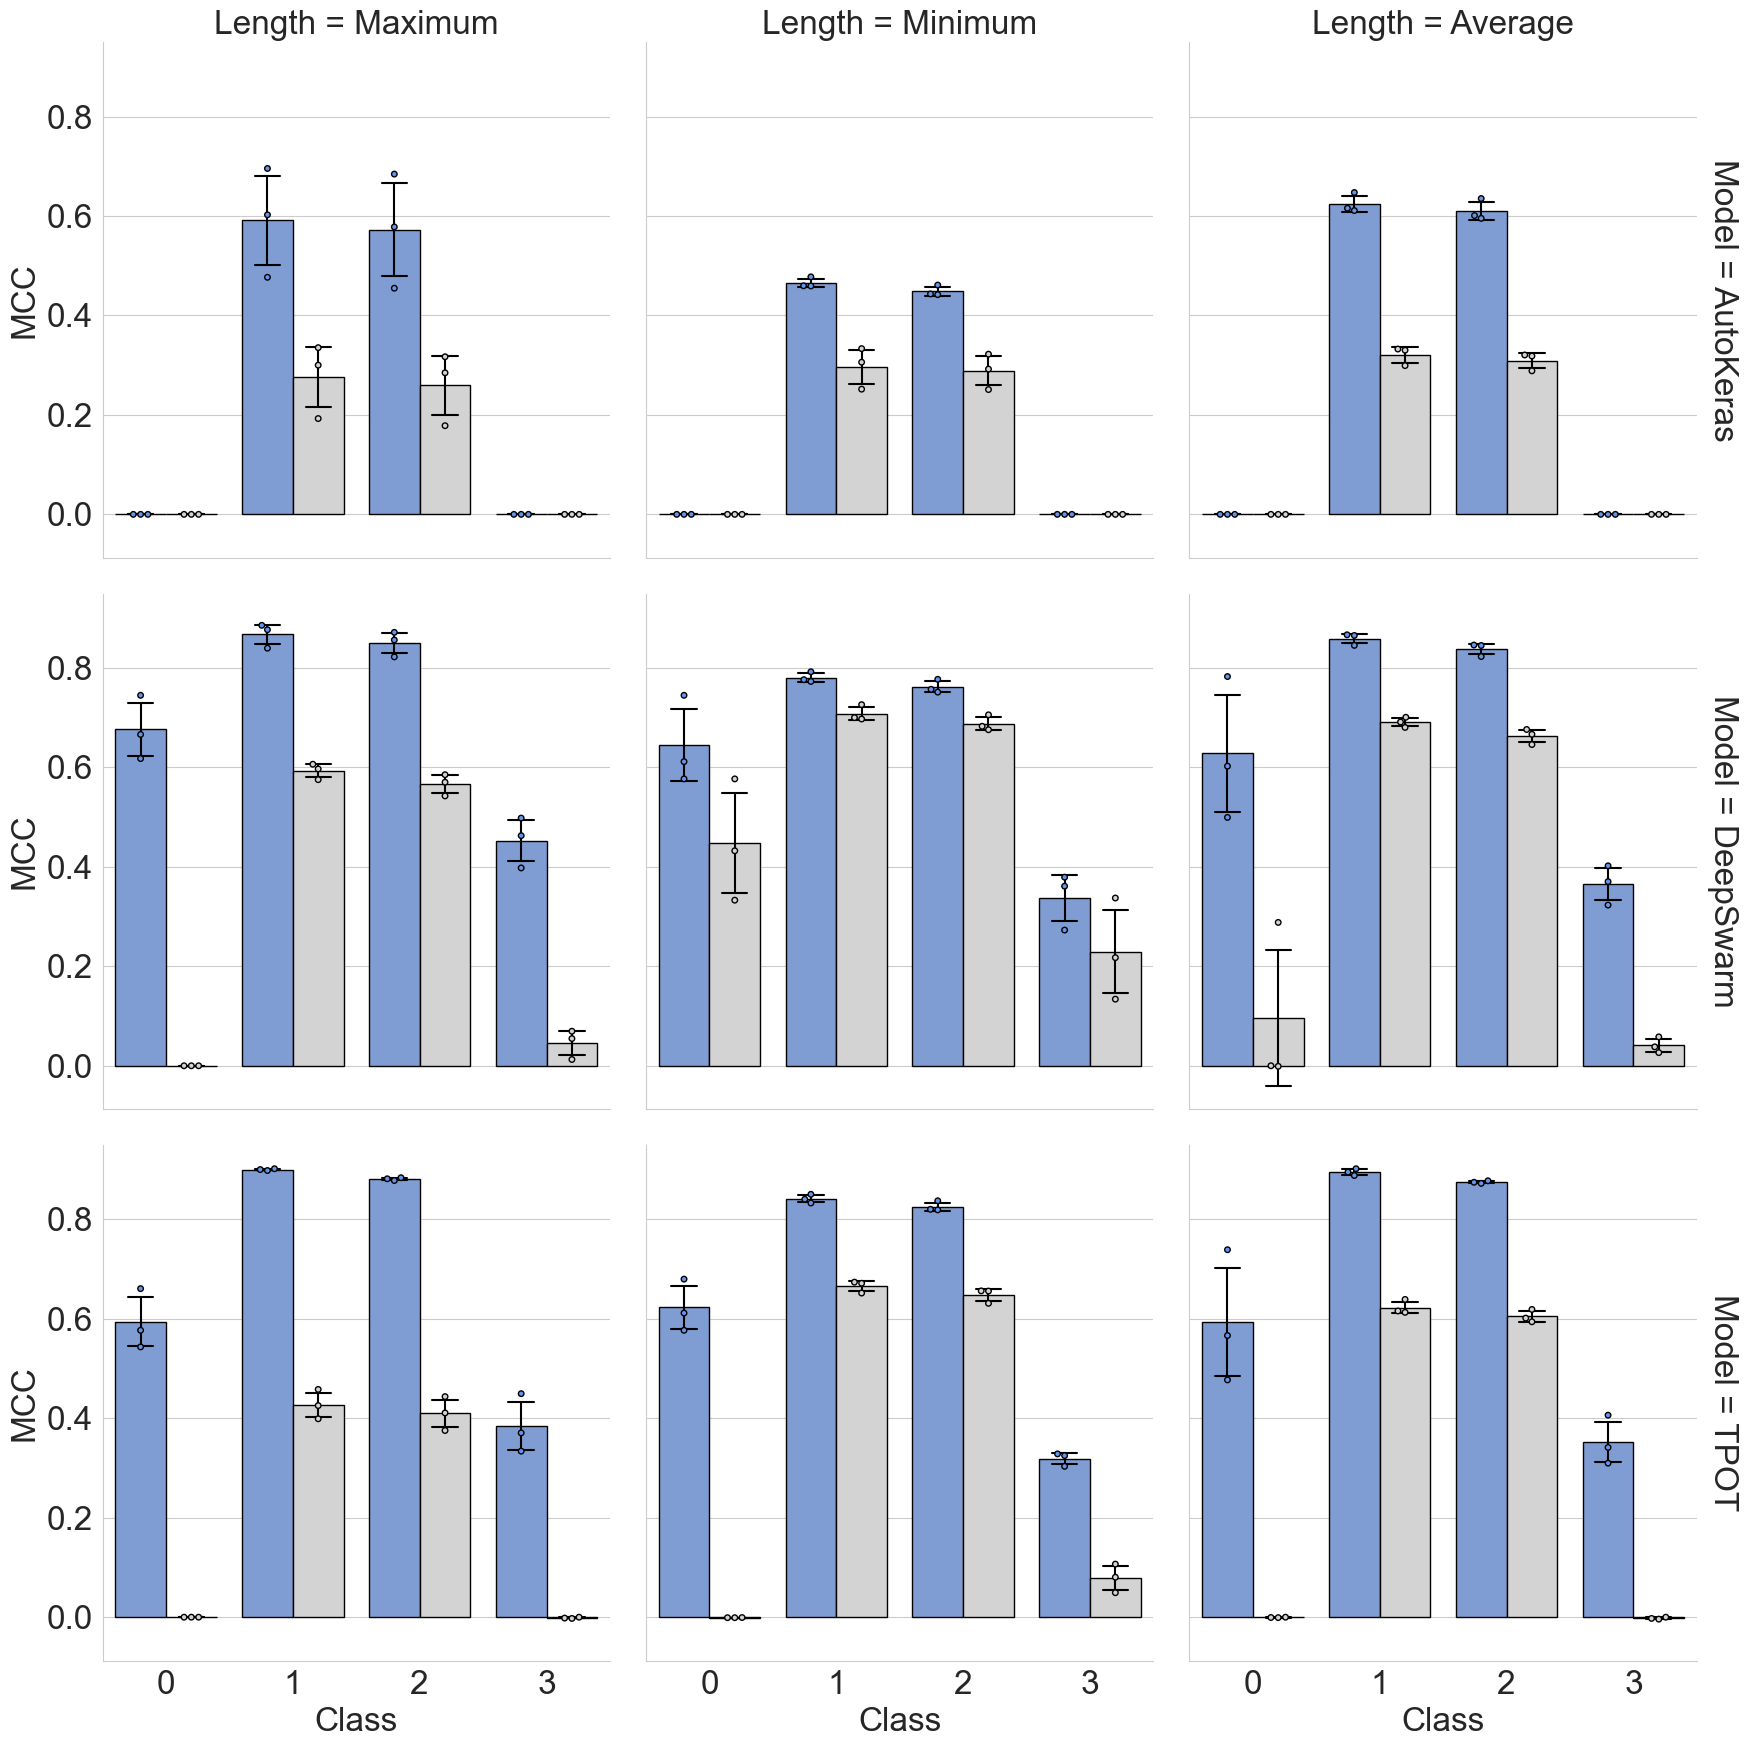

In [44]:
def reshape_lengths_multiclass_type(df):
    new = pd.DataFrame()
    new['model_type'] = []
    new
    index = 0
    for name, col in df.iteritems():
        if 'scr' in name or 'Class' in name or 'Length' in name:
            continue
        new_pd = pd.DataFrame(col)
        new_pd.columns = ['values']
        new_pd['scr'] = list(df['scr'])
        new_pd['model_type'] = [name] * len(new_pd)
        new_pd['Class'] = list(df['Class'])
        new_pd['Length'] = list(df['Length'])
        new = pd.concat([new, new_pd])
        index = index + 1
    new.columns = ['Model', 'MCC', 'Data', 'Class', 'Length']
    return(new)

def plot_lengths_multiclass(mcc, savepath, yaxis):
    mcc = reshape_lengths_multiclass_type(mcc)  
    my_pal = {"Original": "cornflowerblue", "Scrambled": "lightgrey"}

    g = sns.FacetGrid(mcc, col="Length", row = "Model", height=6, aspect=1, margin_titles=True)
    g.map(sns.barplot, 'Class', 'MCC', 'Data', dodge = True, edgecolor='black', alpha = 1, linewidth = 1, palette = my_pal, ci = 'sd', errcolor = 'black', errwidth = 1.5, capsize = 0.2, saturation = 0.6)
    g.map(sns.swarmplot, 'Class', 'MCC', 'Data', dodge = True, edgecolor='black', alpha = 1, linewidth = 1, s = 4, palette = my_pal)

    plt.tight_layout()
    plt.savefig(savepath)
    plt.show()
    
plot_lengths_multiclass(all_lengths, '../clean_figs/length_tests_domain_glycans.svg', 'MCC')


# Regression

In [45]:
def calc_regr_vals(folder, seq, val_name):
    folds = ['outputs/autokeras/regression/', 'outputs/deepswarm/regression/', 'outputs/tpot/regression/']
    mcc = pd.DataFrame()
    file_name = 'all_results.txt'
    for fold in folds:
        name = fold.split('outputs/')[1].split('/regression')[0]
        name = name.replace('deepswarm', 'DeepSwarm')
        name = name.replace('autokeras', 'AutoKeras')
        name = name.replace('tpot', 'TPOT')

        df = pd.read_csv(folder + seq + fold + file_name, sep = '\t', header = None)
        vals = df.values
        for i in range(len(vals)):
            val = vals[i]
            if val_name in val[0]:
                new = val[0].split(": ")[1]
                new = new.strip("[")
                new = new.strip("]")

                new = [s for s in new.split(' ')]
                new = [s for s in new if s != '']
                new = [0 if s == '0.' else s for s in new]
                new = [float(s) for s in new]
                mcc[name] = new
    mcc['scr'] = ['Original'] * len(mcc)
    
    file_name = 'all_scrambled_control_results.txt'
    scr_mcc = pd.DataFrame()
    for fold in folds:
        name = fold.split('outputs/')[1].split('/regression')[0]
        name = name.replace('deepswarm', 'DeepSwarm')
        name = name.replace('autokeras', 'AutoKeras')
        name = name.replace('tpot', 'TPOT')
        df = pd.read_csv(folder + seq + fold + 'scrambled/' + file_name, sep = '\t', header = None)
        vals = df.values
        for i in range(len(vals)):
            val = vals[i]
            if val_name in val[0]:
                new = val[0].split(": ")[1]
                new = new.strip("[")
                new = new.strip("]")

                new = [s for s in new.split(' ')]
                new = [s for s in new if s != '']
                new = [0 if s == '0.' else s for s in new]
                new = [float(s) for s in new]
                scr_mcc[name] = new
    scr_mcc['scr'] = ['Scrambled'] * len(scr_mcc)
    mcc = pd.concat([mcc, scr_mcc])
    
    print('Running statistics now...')
    calculate_stats(mcc)

    return(mcc)

def reshape_multiclass_type(df):
    new = pd.DataFrame()
    new['model_type'] = []
    new
    index = 0
    for name, col in df.iteritems():
        if 'scr' in name or 'Metric' in name:
            continue
        new_pd = pd.DataFrame(col)
        new_pd.columns = ['values']
        new_pd['scr'] = list(df['scr'])
        new_pd['model_type'] = [name] * len(new_pd)
        new_pd['Metric'] = list(df['Metric'])
        new = pd.concat([new, new_pd])
        index = index + 1
    new.columns = ['Model', 'Value', 'Data', 'Metric']
    return(new)

def plot_barplot_multiclass(mcc, savepath, yaxis):
    mcc = reshape_multiclass_type(mcc)  
    my_pal = {"Original": "cornflowerblue", "Scrambled": "lightgrey"}

    g = sns.FacetGrid(mcc, col="Model", height=6, aspect=1, margin_titles=True)
    g.map(sns.barplot, 'Metric', 'Value', 'Data', dodge = True, edgecolor='black', alpha = 1, linewidth = 1, palette = my_pal, ci = 'sd', errcolor = 'black', errwidth = 1.5, capsize = 0.2, saturation = 0.6)
    g.map(sns.swarmplot, 'Metric', 'Value', 'Data', dodge = True, edgecolor='black', alpha = 1, linewidth = 1, s = 4, palette = my_pal)
    g.set_xticklabels(rotation=80)
    for ax in g.axes_dict.values():
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles[2:4], labels[2:4], title='Data')
        plt.xlabel('')
        #plt.xticks(rotation = 80)
        plt.ylabel(yaxis)
        plt.ylim([0, 1.1])
        plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    plt.tight_layout()
    plt.savefig(savepath)
    plt.show()

r2
Running statistics now...
AutoKeras
Ttest_indResult(statistic=145.09061209258374, pvalue=1.3534944399861064e-08)
DeepSwarm
Ttest_indResult(statistic=25.159989754847746, pvalue=1.4816630656944007e-05)
TPOT
Ttest_indResult(statistic=100.19018326857073, pvalue=5.950619619897653e-08)


pearson
Running statistics now...
AutoKeras
Ttest_indResult(statistic=151.53634514358822, pvalue=1.1375171244281027e-08)
DeepSwarm
Ttest_indResult(statistic=37.6541119871063, pvalue=2.9707240177973134e-06)
TPOT
Ttest_indResult(statistic=137.81742163819484, pvalue=1.662579220197018e-08)


spearman
Running statistics now...
AutoKeras
Ttest_indResult(statistic=154.78572378956082, pvalue=1.0449771766135197e-08)
DeepSwarm
Ttest_indResult(statistic=38.86216088452847, pvalue=2.6189597407263662e-06)
TPOT
Ttest_indResult(statistic=115.34124025122789, pvalue=3.388403963870196e-08)


MAE
Running statistics now...
AutoKeras
Ttest_indResult(statistic=-122.54325737755435, pvalue=2.6595048734838758e-08)
DeepSwarm
Ttest_

/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


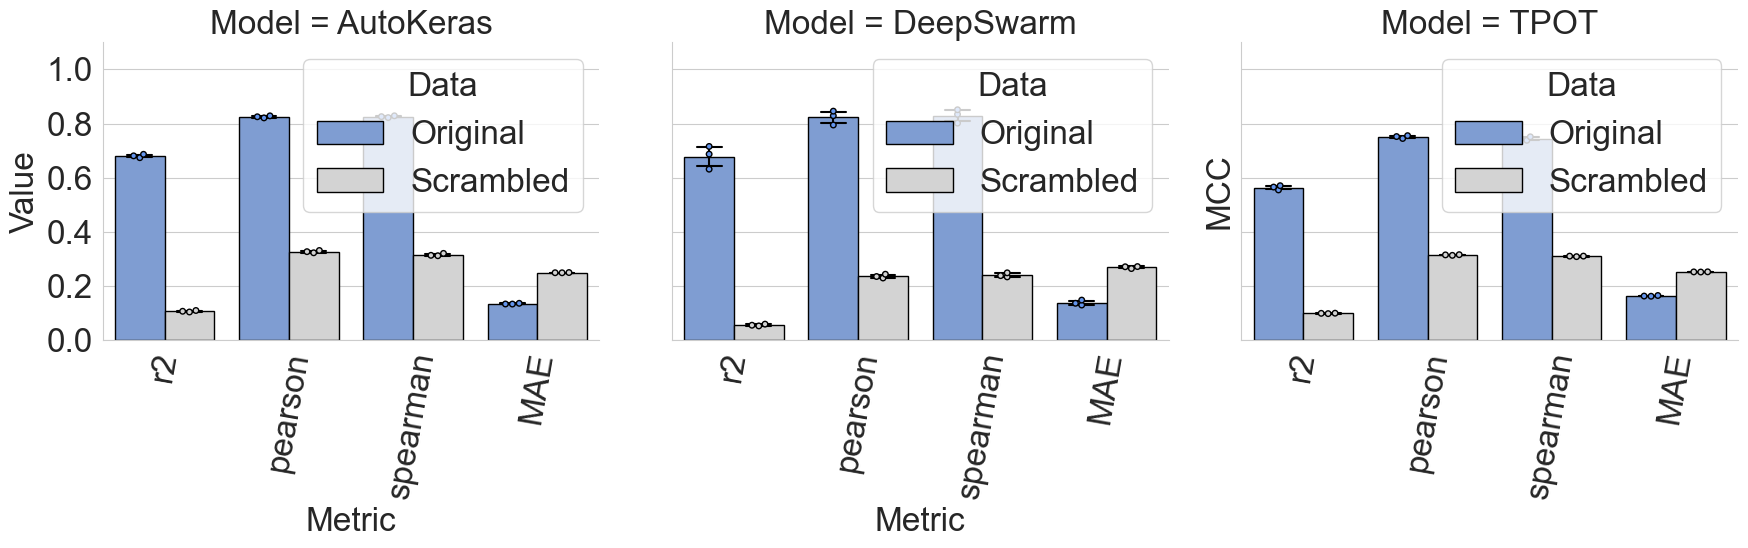

In [46]:
# load in toeholds
data_path = '../exemplars/'
seq_type = 'toeholds/'

wholedf = pd.DataFrame()
for valtype in ['r2', 'pearson', 'spearman', 'MAE']:
    print(valtype)
    df = calc_regr_vals(data_path, seq_type, 'all ' + str(valtype))
    df['Metric'] = [str(valtype)] * len(df)
    wholedf = pd.concat([wholedf, df])
    print('\n')
plot_barplot_multiclass(wholedf, '../clean_figs/regression_toeholds.svg', 'MCC') 

r2
Running statistics now...
AutoKeras
Ttest_indResult(statistic=305.94187938581814, pvalue=6.848013339836799e-10)
DeepSwarm
Ttest_indResult(statistic=331.24421664947363, pvalue=4.983467675559517e-10)
TPOT
Ttest_indResult(statistic=300.20429054420157, pvalue=7.386718437821059e-10)


pearson
Running statistics now...
AutoKeras
Ttest_indResult(statistic=232.33455432915574, pvalue=2.0589338427583853e-09)
DeepSwarm
Ttest_indResult(statistic=251.93041010240552, pvalue=1.4893036699641155e-09)
TPOT
Ttest_indResult(statistic=277.9413262175384, pvalue=1.0053129352405256e-09)


spearman
Running statistics now...
AutoKeras
Ttest_indResult(statistic=200.23848520155735, pvalue=3.731546337716182e-09)
DeepSwarm
Ttest_indResult(statistic=167.28375575785844, pvalue=7.660069545169102e-09)
TPOT
Ttest_indResult(statistic=197.2438550921507, pvalue=3.963354379534986e-09)


MAE
Running statistics now...
AutoKeras
Ttest_indResult(statistic=-374.88011289761886, pvalue=3.037813029744631e-10)
DeepSwarm
Ttest_ind

/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


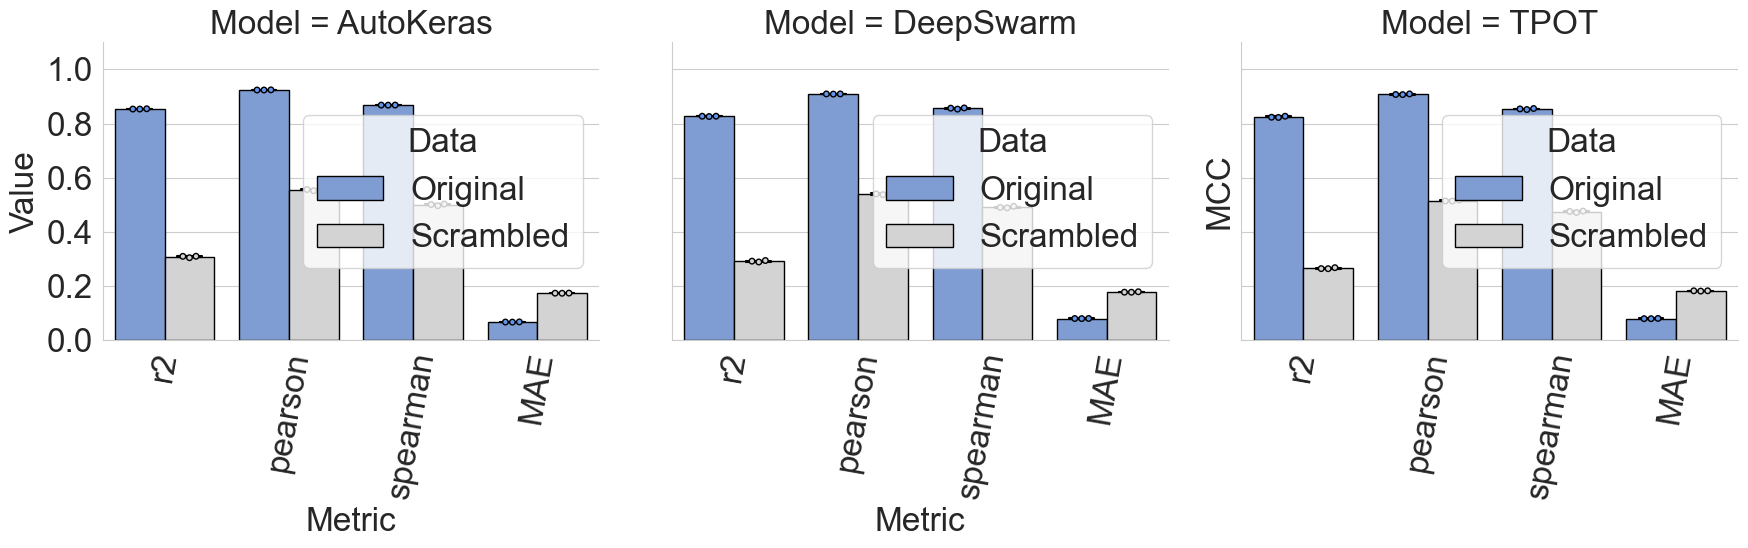

In [47]:
# load in rbs
data_path = '../exemplars/'
seq_type = 'rbs/'

wholedf = pd.DataFrame()
for valtype in ['r2', 'pearson', 'spearman', 'MAE']:
    print(valtype)
    df = calc_regr_vals(data_path, seq_type, 'all ' + str(valtype))
    df['Metric'] = [str(valtype)] * len(df)
    wholedf = pd.concat([wholedf, df])
    print('\n')
plot_barplot_multiclass(wholedf, '../clean_figs/regression_rbs.svg', 'MCC') 

r2
Running statistics now...
AutoKeras
Ttest_indResult(statistic=44.470030007234215, pvalue=1.5290402567600331e-06)
DeepSwarm
Ttest_indResult(statistic=14.64693745053349, pvalue=0.0001264116913573525)
TPOT
Ttest_indResult(statistic=80.38477018968561, pvalue=1.4355165888946918e-07)


pearson
Running statistics now...
AutoKeras
Ttest_indResult(statistic=33.4241350743783, pvalue=4.778849430569893e-06)
DeepSwarm
Ttest_indResult(statistic=20.773535778247297, pvalue=3.172706934067136e-05)
TPOT
Ttest_indResult(statistic=95.88631081406572, pvalue=7.092673564726429e-08)


spearman
Running statistics now...
AutoKeras
Ttest_indResult(statistic=26.974341988894075, pvalue=1.1229982978673565e-05)
DeepSwarm
Ttest_indResult(statistic=9.945446550179595, pvalue=0.0005740309038301033)
TPOT
Ttest_indResult(statistic=43.8233944770312, pvalue=1.621142211032723e-06)


MAE
Running statistics now...
AutoKeras
Ttest_indResult(statistic=-32.48909299502175, pvalue=5.351344620635324e-06)
DeepSwarm
Ttest_indResult(

/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


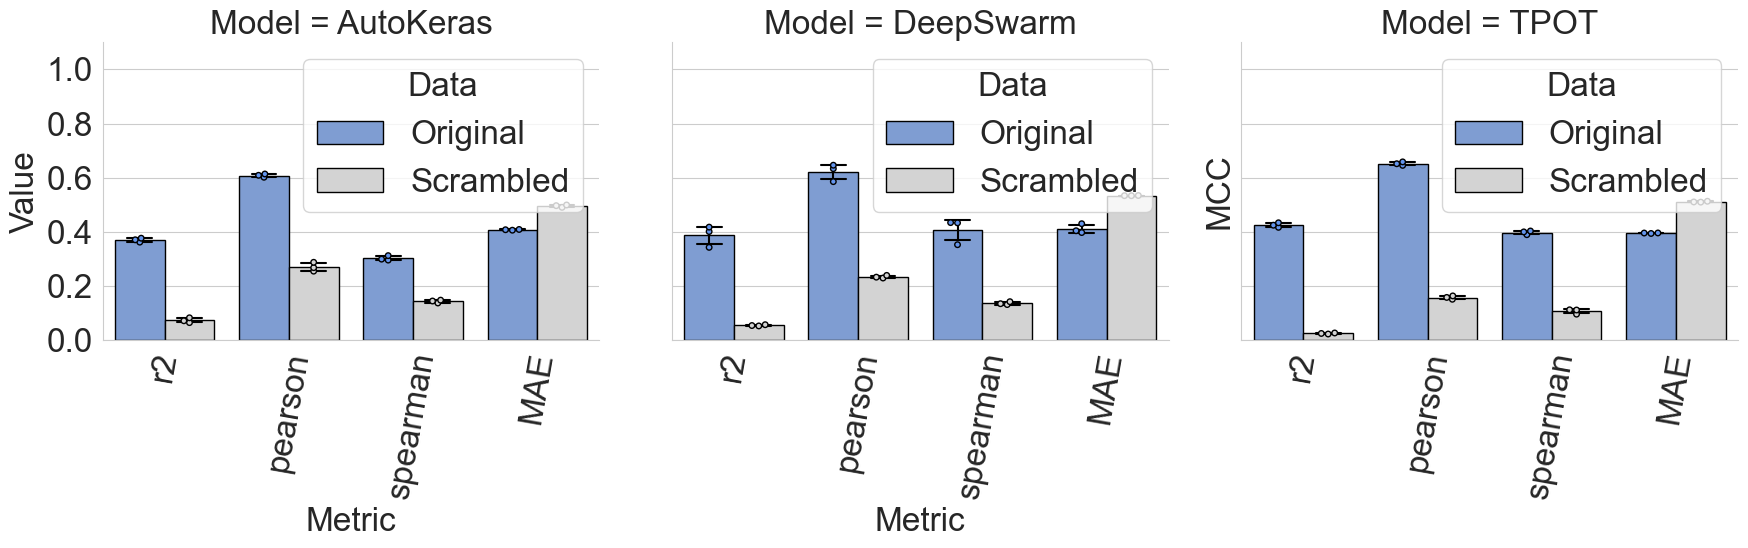

In [48]:
# load in peptides
data_path = '../exemplars/'
seq_type = 'peptides/'

wholedf = pd.DataFrame()
for valtype in ['r2', 'pearson', 'spearman', 'MAE']:
    print(valtype)
    df = calc_regr_vals(data_path, seq_type, 'all ' + str(valtype))
    df['Metric'] = [str(valtype)] * len(df)
    wholedf = pd.concat([wholedf, df])
    print('\n')
plot_barplot_multiclass(wholedf, '../clean_figs/regression_peptides.svg', 'MCC') 

r2
Running statistics now...
AutoKeras
Ttest_indResult(statistic=-0.8634567239784654, pvalue=0.4365860919088029)
DeepSwarm
Ttest_indResult(statistic=0.03551014521935151, pvalue=0.9733743852145529)
TPOT
Ttest_indResult(statistic=nan, pvalue=nan)


pearson
Running statistics now...
AutoKeras
Ttest_indResult(statistic=-0.8633363736848305, pvalue=0.4366449714025923)
DeepSwarm
Ttest_indResult(statistic=0.03520414335721731, pvalue=0.9736037073917894)
TPOT
Ttest_indResult(statistic=nan, pvalue=nan)


spearman
Running statistics now...
AutoKeras
Ttest_indResult(statistic=-0.022410695530628424, pvalue=0.9831937367969898)
DeepSwarm
Ttest_indResult(statistic=0.0, pvalue=1.0)
TPOT
Ttest_indResult(statistic=-0.09858782177999469, pvalue=0.9262084761098042)


MAE
Running statistics now...
AutoKeras
Ttest_indResult(statistic=0.8358695082582182, pvalue=0.4502514768463497)
DeepSwarm
Ttest_indResult(statistic=0.9403161636241888, pvalue=0.4002950838505005)
TPOT
Ttest_indResult(statistic=0.1365840872231988

/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/anaconda2/envs/automl_py37/lib/python3.7/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


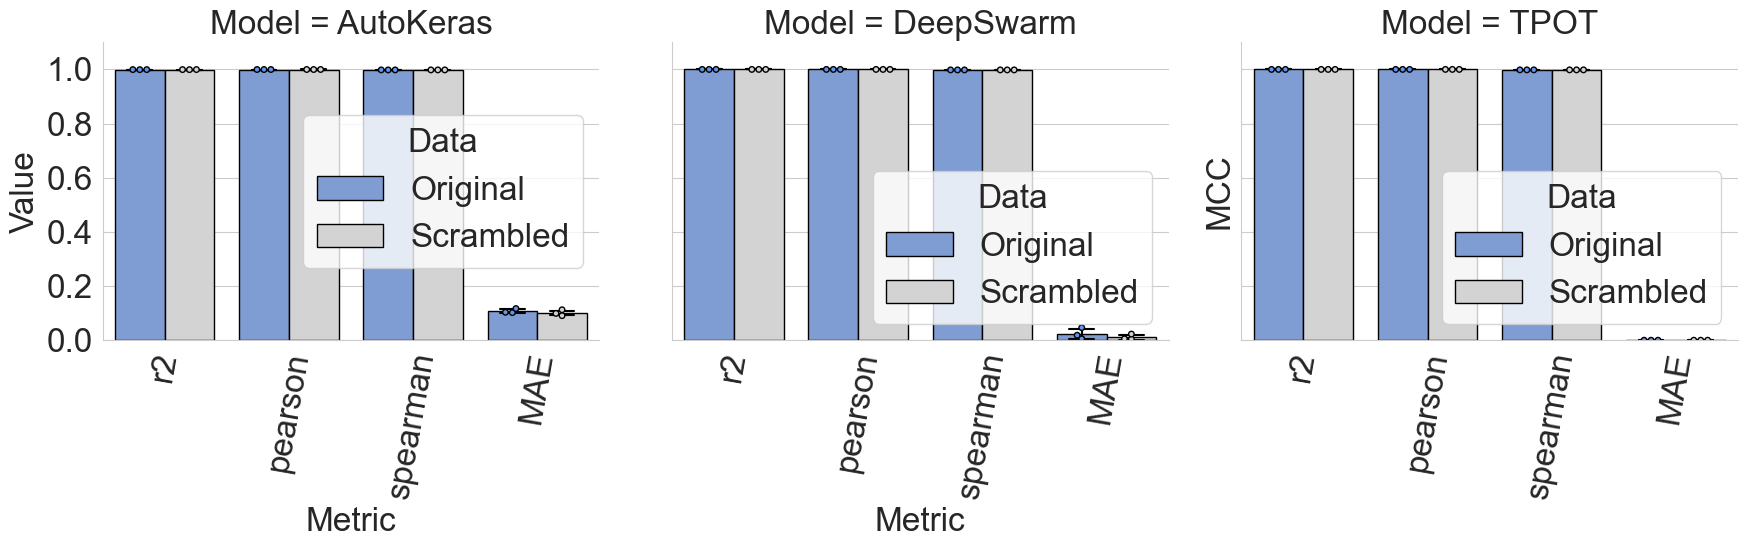

In [49]:
# load in synth NAs
data_path = '../exemplars/'
seq_type = 'large_synthetic_nucleic_acids/'

wholedf = pd.DataFrame()
for valtype in ['r2', 'pearson', 'spearman', 'MAE']:
    print(valtype)
    df = calc_regr_vals(data_path, seq_type, 'all ' + str(valtype))
    df['Metric'] = [str(valtype)] * len(df)
    wholedf = pd.concat([wholedf, df])
    print('\n')
plot_barplot_multiclass(wholedf, '../clean_figs/regression_large_synthetic_nucleic_acids.svg', 'MCC') 

# Design boxplots

In [50]:
# toeholds
df = pd.read_csv('../exemplars/toeholds/outputs/deepswarm/regression/design/sequences_all_methods.csv')
for starting in ['Random', 'Top 10%', 'Bottom 10%']:
    print(starting)
    orig = list(df[df['method'] == 'Original-'+starting]['preds'])
    mut = list(df[df['method'] == 'Mutated-'+starting]['preds'])
    storm = list(df[df['method'] == 'STORM-'+starting]['preds'])
    print('Comparing Mut to Orig')
    print(sp.ttest_ind(mut, orig))
    print('Comparing Storm to Orig')
    print(sp.ttest_ind(storm, orig))    
    print('Comparing Storm to Mut')
    print(sp.ttest_ind(storm, mut))    
    print('\n')
    

Random
Comparing Mut to Orig
Ttest_indResult(statistic=-0.7882861537754666, pvalue=0.4305298112092554)
Comparing Storm to Orig
Ttest_indResult(statistic=1.5781102119446357, pvalue=0.11760667445923881)
Comparing Storm to Mut
Ttest_indResult(statistic=1.3602726897261805, pvalue=0.17374441275095598)


Top 10%
Comparing Mut to Orig
Ttest_indResult(statistic=-6.607876139362855, pvalue=3.903577184425301e-11)
Comparing Storm to Orig
Ttest_indResult(statistic=0.7626491124526924, pvalue=0.4474157581457675)
Comparing Storm to Mut
Ttest_indResult(statistic=1.8199296089004544, pvalue=0.06877047111372864)


Bottom 10%
Comparing Mut to Orig
Ttest_indResult(statistic=7.43850927707381, pvalue=1.020294878651833e-13)
Comparing Storm to Orig
Ttest_indResult(statistic=4.80544441553466, pvalue=5.27106244019729e-06)
Comparing Storm to Mut
Ttest_indResult(statistic=0.10986042675964196, pvalue=0.9125201224137506)




In [51]:
# rbs
df = pd.read_csv('../exemplars/rbs/outputs/deepswarm/binary_classification/design/sequences_all_methods.csv')
for starting in ['Random', 'Top 10%', 'Bottom 10%']:
    print(starting)
    orig = list(df[df['method'] == 'Original-'+starting]['preds'])
    mut = list(df[df['method'] == 'Mutated-'+starting]['preds'])
    storm = list(df[df['method'] == 'STORM-'+starting]['preds'])
    print('Comparing Mut to Orig')
    print(sp.ttest_ind(mut, orig))
    print('Comparing Storm to Orig')
    print(sp.ttest_ind(storm, orig))    
    print('Comparing Storm to Mut')
    print(sp.ttest_ind(storm, mut))    
    print('\n')
    

Random
Comparing Mut to Orig
Ttest_indResult(statistic=0.293483620249052, pvalue=0.7691640130246107)
Comparing Storm to Orig
Ttest_indResult(statistic=5.27910911361159, pvalue=7.247674214455332e-07)
Comparing Storm to Mut
Ttest_indResult(statistic=5.3163747083384285, pvalue=1.1027613551061212e-07)


Top 10%
Comparing Mut to Orig
Ttest_indResult(statistic=-2.1114043223824575, pvalue=0.03478429939532561)
Comparing Storm to Orig
Ttest_indResult(statistic=0.42371139593079904, pvalue=0.6726598310086838)
Comparing Storm to Mut
Ttest_indResult(statistic=0.6359357952640767, pvalue=0.5248462520211785)


Bottom 10%
Comparing Mut to Orig
Ttest_indResult(statistic=0.8507726502919939, pvalue=0.3949341056376545)
Comparing Storm to Orig
Ttest_indResult(statistic=-0.24629391594596214, pvalue=0.8059448850376021)
Comparing Storm to Mut
Ttest_indResult(statistic=-0.33438633800168005, pvalue=0.7381015250657768)




In [52]:
# peptides
df = pd.read_csv('../exemplars/peptides/outputs/deepswarm/regression/design/sequences_all_methods.csv')
for starting in ['Random', 'Top 10%', 'Bottom 10%']:
    print(starting)
    orig = list(df[df['method'] == 'Original-'+starting]['preds'])
    mut = list(df[df['method'] == 'Mutated-'+starting]['preds'])
    storm = list(df[df['method'] == 'STORM-'+starting]['preds'])
    print('Comparing Mut to Orig')
    print(sp.ttest_ind(mut, orig))
    print('Comparing Storm to Orig')
    print(sp.ttest_ind(storm, orig))    
    print('Comparing Storm to Mut')
    print(sp.ttest_ind(storm, mut))    
    print('\n')
    

Random
Comparing Mut to Orig
Ttest_indResult(statistic=0.533173000825822, pvalue=0.5939169312736394)
Comparing Storm to Orig
Ttest_indResult(statistic=1.8880149556794585, pvalue=0.06183820470166683)
Comparing Storm to Mut
Ttest_indResult(statistic=1.7562243000620368, pvalue=0.0790581498807246)


Top 10%
Comparing Mut to Orig
Ttest_indResult(statistic=-3.4961424711229907, pvalue=0.0004725728351057726)
Comparing Storm to Orig
Ttest_indResult(statistic=-1.9284681833202053, pvalue=0.05654998019004167)
Comparing Storm to Mut
Ttest_indResult(statistic=-1.1861320885363245, pvalue=0.2355775471160278)


Bottom 10%
Comparing Mut to Orig
Ttest_indResult(statistic=2.324076694977696, pvalue=0.020126601729946812)
Comparing Storm to Orig
Ttest_indResult(statistic=1.4125255702539998, pvalue=0.16080971388810011)
Comparing Storm to Mut
Ttest_indResult(statistic=0.8183995094110816, pvalue=0.41313421979894305)




In [53]:
# glycans
df = pd.read_csv('../exemplars/glycans_immunogenic/outputs/deepswarm/binary_classification/design/sequences_all_methods.csv')
for starting in ['Class0.0', 'Class1.0']:
    print(starting)
    orig = list(df[df['method'] == 'Original-'+starting]['preds'])
    mut = list(df[df['method'] == 'Mutated-'+starting]['preds'])
    storm = list(df[df['method'] == 'STORM-'+starting]['preds'])
    print('Comparing Mut to Orig')
    print(sp.ttest_ind(mut, orig))
    print('Comparing Storm to Orig')
    print(sp.ttest_ind(storm, orig))    
    print('Comparing Storm to Mut')
    print(sp.ttest_ind(storm, mut))    
    print('\n')
    

Class0.0
Comparing Mut to Orig
Ttest_indResult(statistic=-0.20659154577752678, pvalue=0.836329370466487)
Comparing Storm to Orig
Ttest_indResult(statistic=1.0273874486123677, pvalue=0.3066447492289228)
Comparing Storm to Mut
Ttest_indResult(statistic=1.0386212180759185, pvalue=0.2989839651491296)


Class1.0
Comparing Mut to Orig
Ttest_indResult(statistic=-0.36198407745681777, pvalue=0.7173648491037232)
Comparing Storm to Orig
Ttest_indResult(statistic=0.6329701106715142, pvalue=0.5281559959598077)
Comparing Storm to Mut
Ttest_indResult(statistic=0.6491654000956006, pvalue=0.516233268532188)




# Calculate glycan accuracy 

In [54]:
import sklearn.metrics
glycpreds = pd.read_csv('../exemplars/glycans_immunogenic/outputs/tpot/binary_classification/compiled_results_tpot_classification.csv')
true = list(glycpreds['True'])
preds = list(glycpreds['Preds'])
print('Accuracy: %.3f' % sklearn.metrics.accuracy_score(true, preds))

Accuracy: 0.927
